# My idea: 

### is to create a supervised learning model for stroke risk prediction that’s usable by the <strong>general public</strong> is both practical and impactful. 

# Get Data

In [2]:
# Importing necessary libraries for classification tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv") # Load the dataset

# Checking for duplicates in the dataset
duplicate_count = df.duplicated().sum()
print("Number of duplicates:", duplicate_count)


# Show the first 10 rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)

# geting the data

Number of duplicates: 0
First 10 rows of the dataset:


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not 
13) *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
# after viewing the data, we can see that there are some columns that are not useful for our analysis, such as 'ID', becuase it is just an identifier and does not provide any useful information for our analysis.
# Dropping the 'ID' column
df.drop(columns=['id'], inplace=True)


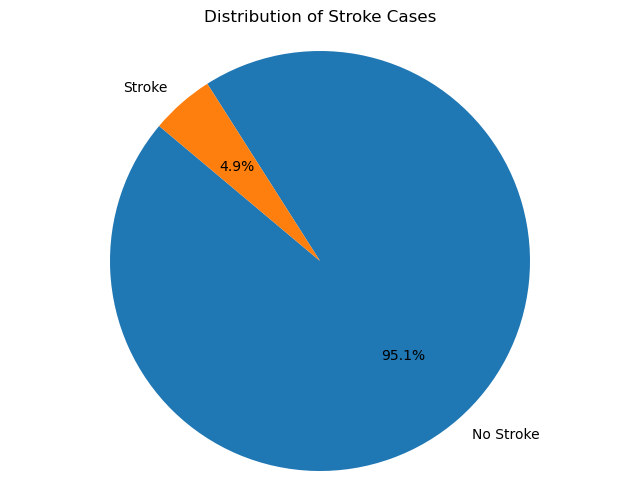

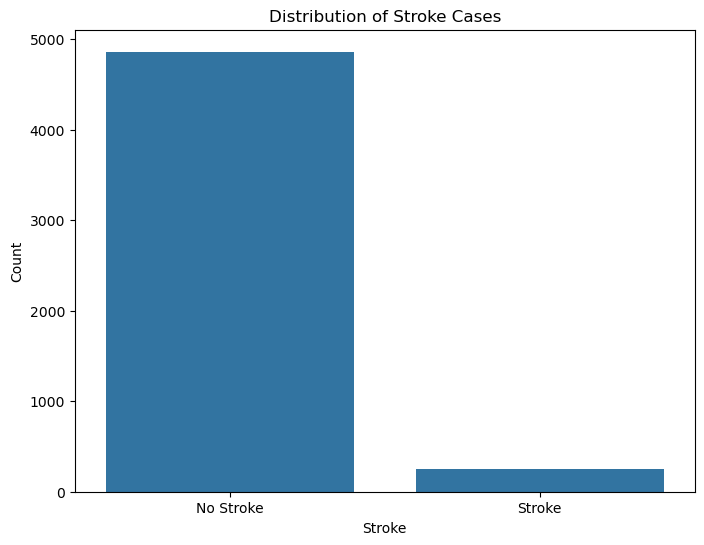

In [5]:
# exploring the target variable 'stroke'
# Checking the distribution of the target variable 'stroke' using pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['stroke'].value_counts(), labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stroke Cases')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()
# Checking the distribution of the target variable 'stroke' using bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()

# we can see that the dataset is imbalanced, with a majority of cases being 'No Stroke' and a minority being 'Stroke'.
# This imbalance can affect the performance of our machine learning models, so we will need to address it later in the analysis.

In [6]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


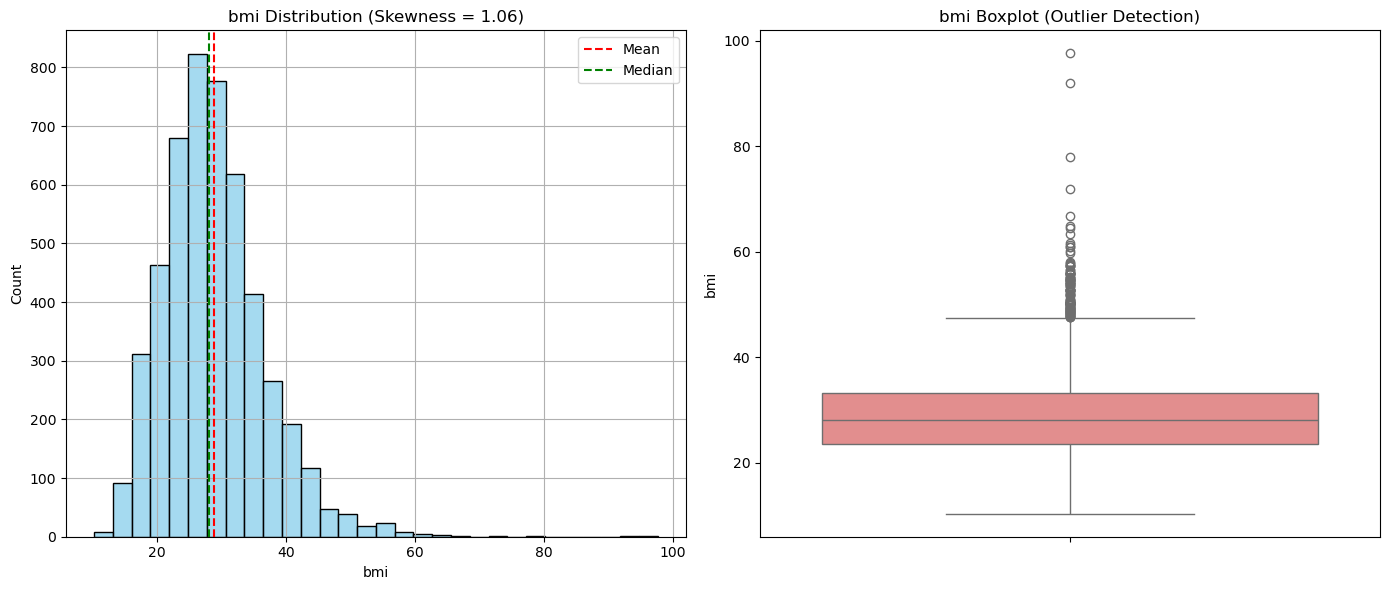

Skewness of 'bmi': 1.06


In [7]:
# NaN in bmi in bmi column
# Filling NaN values in 'bmi' column with the mean, median, or mode
# explore the bmi column to see which method is more appropriate
# Visualize bmi distribution and detect skewness and outliers

# Calculate skewness
bmi_skewness = df['bmi'].skew()

# Plot histogram with boxplot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
#this is to check the distribution of bmi and detect skewness and outliers
sns.histplot(df['bmi'], bins=30, ax=axes[0], color='skyblue')
axes[0].axvline(df['bmi'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['bmi'].median(), color='green', linestyle='--', label='Median')
axes[0].set_title(f'bmi Distribution (Skewness = {bmi_skewness:.2f})')
axes[0].set_xlabel('bmi')
axes[0].legend()
axes[0].grid(True)

# Boxplot for outlier detection
sns.boxplot(y=df['bmi'], ax=axes[1], color='lightcoral')
axes[1].set_title('bmi Boxplot (Outlier Detection)')
axes[1].set_ylabel('bmi')

plt.tight_layout()
plt.show()

print(f"Skewness of 'bmi': {bmi_skewness:.2f}")


# the distribution of bmi is slightly right-skewed, indicating that there are some higher values that are less common. 
# The mean is higher than the median, which is typical for right-skewed distributions. There are also some outliers present in the boxplot, which can affect the mean significantly.
# Hence, using the median to fill NaN values is more appropriate in this case, as it is less affected by outliers and provides a better central tendency measure for skewed distributions.


In [8]:
#Fill NaN values in 'bmi' column with the median

df = df.fillna({'bmi': df['bmi'].median()})

df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21  28.1     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75  28.1     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

In [9]:
# since my model is gooding to be use my the general public, 
# the user may not know their avrage blood pressure, hencce, converting it to diabetes  a yes or no question
# based on ADA the less than 100 is normal, 100-125 is prediabetes, and 126 or higher is diabetes
# to be safe, i will conider above 100 as diabetes
df['diabetes'] = np.where(df['avg_glucose_level'] >= 100, 'Yes', 'No')
# Dropping the 'avg_glucose_level' column as it is no longer needed
df.drop(columns=['avg_glucose_level'], inplace=True)

df.head(10)

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   
6    Male  74.0             1              1          Yes        Private   
7  Female  69.0             0              0           No        Private   
8  Female  59.0             0              0          Yes        Private   
9  Female  78.0             0              0          Yes        Private   

  Residence_type   bmi   smoking_status  stroke diabetes  
0          Urban  36.6  formerly smoked       1      Yes  
1          Rural  28.1     never smoked       1      Yes  
2          Rural  32.5     never smoked       1      Yes  
3          Urban  34.4           smokes       1      Yes  
4          Rural  24.0     never smoked       1      Yes  
5          Urban  29.0  formerly smoked       1      Yes  
6          Rural  27.4     never smoked       1       No  
7          Urban  22.8     never smoked       1       No  
8          Rural  28.1          Unknown       1       No  
9          Urban  24.2          Unknown       1       No

##### Exploring the categorical features 

In [10]:
# start of exploring the categorical features

low_significance = []

##### Gender

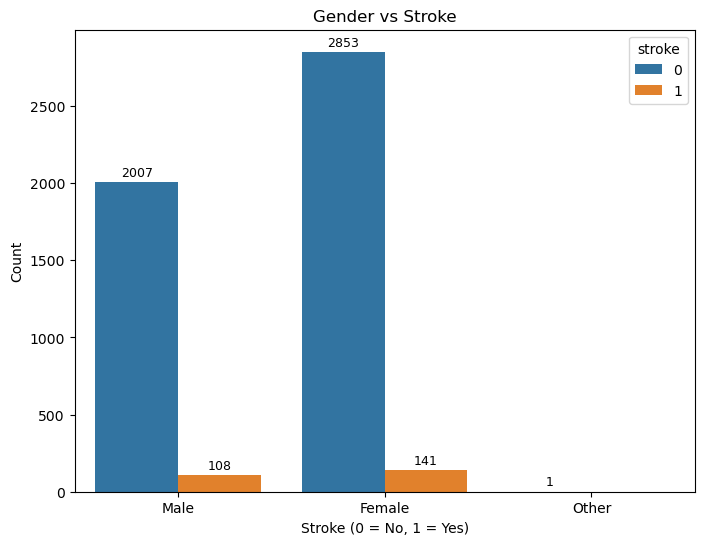

Cross-tabulation of gender and stroke:
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0


In [11]:
# explore the relationship between categorical features and the target variable
#exploring hypertension and gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='stroke', data=df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.title('Gender vs Stroke')
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel('Count')
plt.legend(title='stroke')
plt.show()

# showing the cross-tabulation of 'Hypertension' and 'stroke'
hypertension_counts = pd.crosstab(df['gender'], df['stroke'])
print("Cross-tabulation of gender and stroke:")
print(hypertension_counts)

In [12]:
# the graph show that there is a row call 'Other' in the Gender column
# which is is not under in any gender, so i should replace it with it the most common gender = 'female'
# replacing 'other' to female
df['gender'] = df['gender'].replace('Other', 'Female')


# base on the graph and the cross-tabulation, Stroke occurs slightly more in females than males, but the difference is not significant.
# it may not have a significant impact on the model, but it is still important

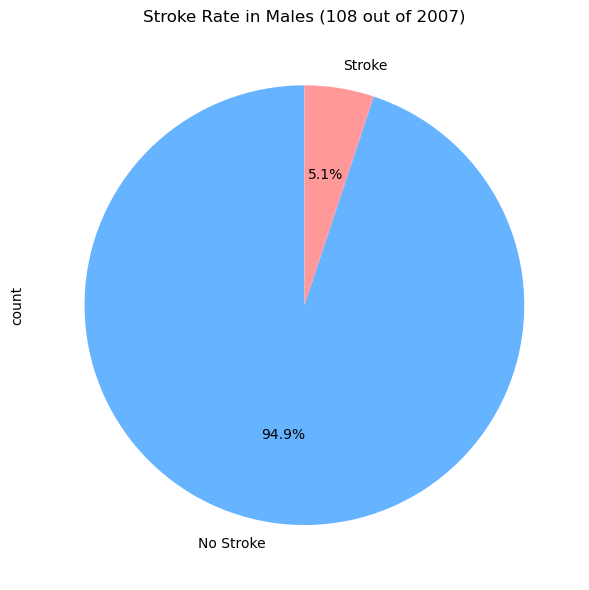

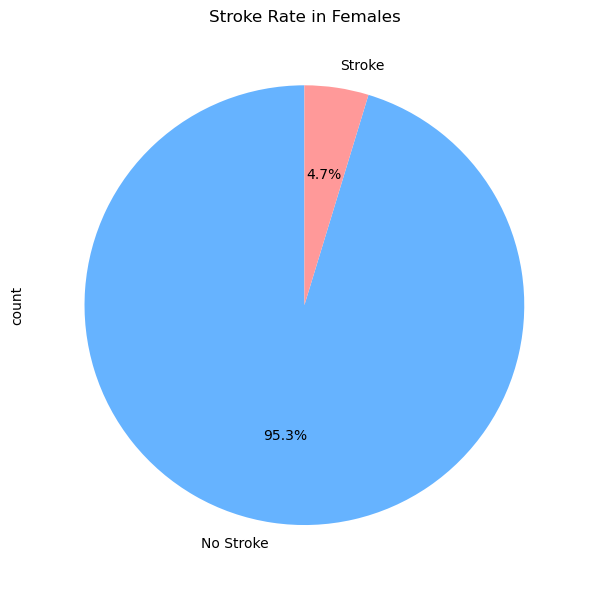

In [13]:
# a pie chart show the percentage of stroke rate in each gender

# a pie chart show the stroke rate in male , 108 out of 2007 
# Filter data for males
male_data = df[df['gender'] == 'Male']

# Calculate stroke counts for males
male_stroke_counts = male_data['stroke'].value_counts()

# Plot pie chart for stroke rate in males
plt.figure(figsize=(6, 6))
male_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Males (108 out of 2007)')
plt.tight_layout()
plt.show()

# Filter data for females
female_data = df[df['gender'] == 'Female']

# Calculate stroke counts for females
female_stroke_counts = female_data['stroke'].value_counts()

# Plot pie chart for stroke rate in females
plt.figure(figsize=(6, 6))
female_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Females')
plt.tight_layout()
plt.show()

# base on the stroke rate pie chart, the stroke rate is higher for male. which is higher by a very small percentage (0.4%)
# this may not have a significant impact on the model, but it is still important 

low_significance.append('Gender')


##### Hypertension

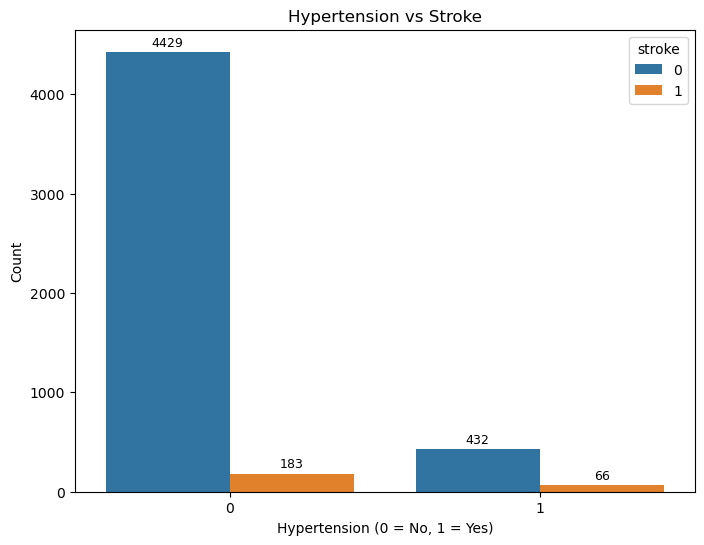

In [14]:
# exploring the hypertension feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Hypertension vs Stroke')
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel('Count' )
#show the count of each bar
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()


# base on the graph and the cross-tabulation, 
# people who do not have hypertension have a higer stroke count than those who have hypertension,
# which is the opposite of what I would expect,


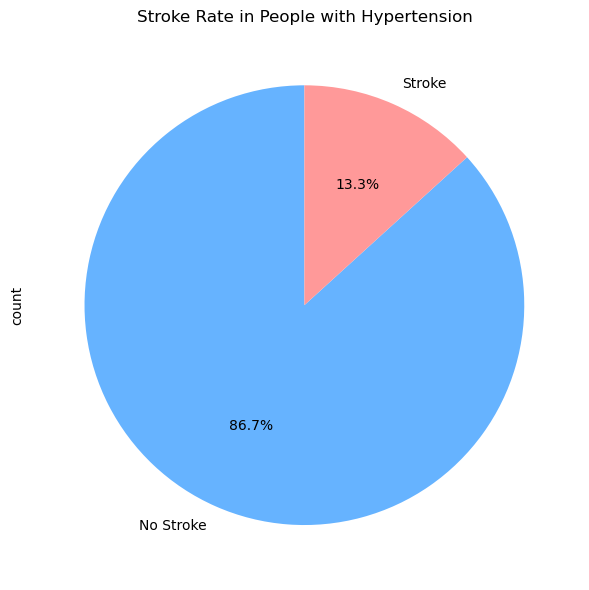

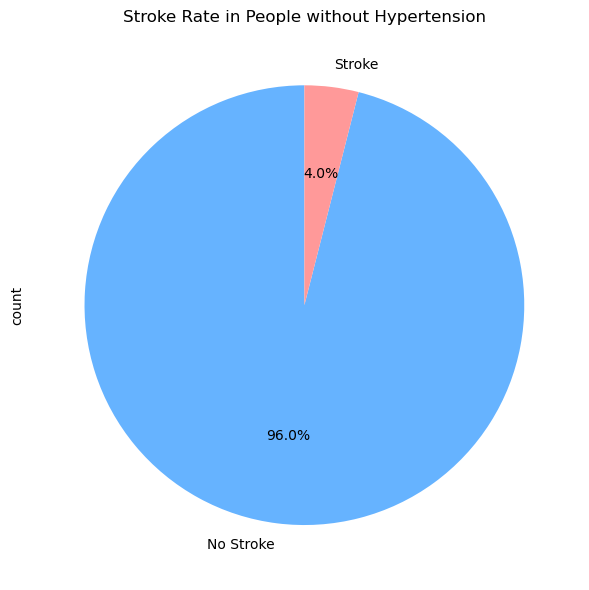

In [15]:
# pie chart show the stroke rate percentage in people with hypertension = 1 
plt.figure(figsize=(6, 6))
hypertension_stroke_counts = df[df['hypertension'] == 1]['stroke'].value_counts()
hypertension_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People with Hypertension')
plt.tight_layout()
plt.show()

#pie chart show the stroke rate percentage in people with hypertension = 0
plt.figure(figsize=(6, 6))
hypertension_stroke_counts = df[df['hypertension'] == 0]['stroke'].value_counts()
hypertension_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People without Hypertension')
plt.tight_layout()
plt.show()


# after checking the stroke rate percentage in people with and without hypertension,
# it proof me wrong, the pie chart shows that people with hypertension have a higher stroke rate than those without hypertension,
# the different is significant, with a stroke rate of 13.0% in people with hypertension and 4% in people without hypertension.
# this means that hypertension is a significant risk factor for stroke, and it should be included in the model as a feature.

##### heart disease

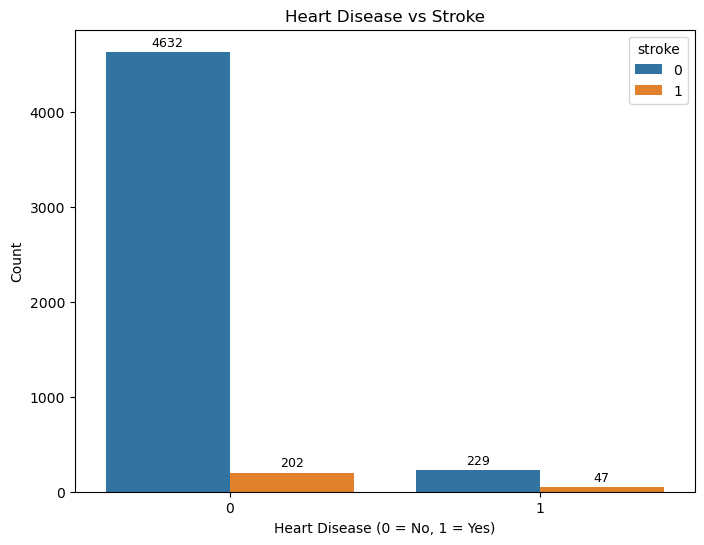

Cross-tabulation of heart_disease and stroke:
stroke            0    1
heart_disease           
0              4632  202
1               229   47


In [16]:

# exploring the heart_disease feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Heart Disease vs Stroke')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()

# cross-tabulation of 'heart_disease' and 'stroke'
heart_disease_counts = pd.crosstab(df['heart_disease'], df['stroke'])
print("Cross-tabulation of heart_disease and stroke:")
print(heart_disease_counts)

# bar chart show the there is higher number of people without heart disease who have stroke than those with heart diseas
# now use the pie chart to show the stroke rate percentage


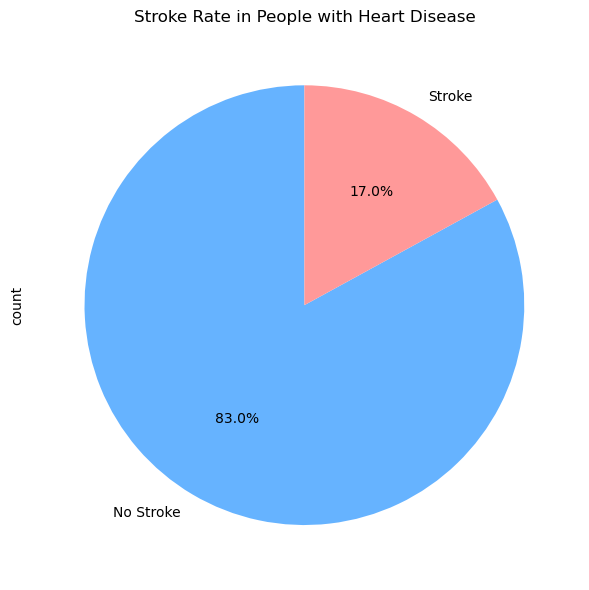

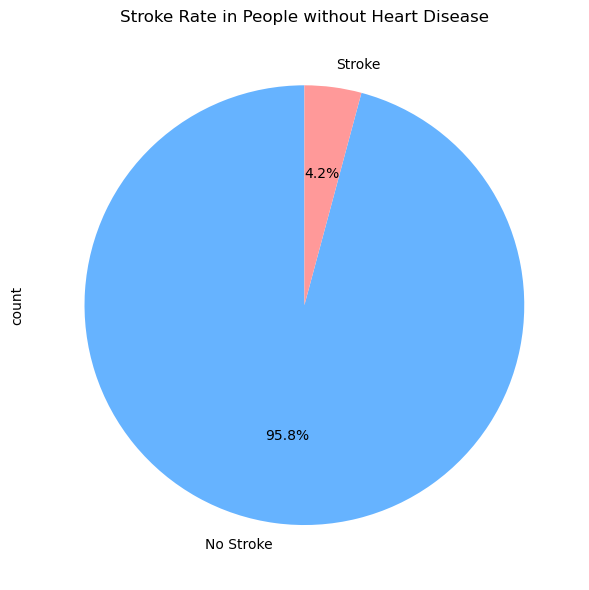

In [17]:
# stroke rate percentage in people with heart disease = 1
plt.figure(figsize=(6, 6))
heart_disease_stroke_counts = df[df['heart_disease'] == 1]['stroke'].value_counts()
heart_disease_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People with Heart Disease')
plt.tight_layout()
plt.show()

# stroke rate percentage in people without heart disease = 0
plt.figure(figsize=(6, 6))
heart_disease_stroke_counts = df[df['heart_disease'] == 0]['stroke'].value_counts()
heart_disease_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People without Heart Disease')
plt.tight_layout()
plt.show()

# after checking the stroke rate percentage in people with and without heart disease,
# it shows that people with heart disease have a higher stroke than those without heart disease,
# the different is significant, with a stroke rate of 17.0% in people with heart disease and 4.2% in people without heart disease.
# this means that heart disease is a significant risk factor for stroke, and it should be included in the model as a feature.

##### ever_married

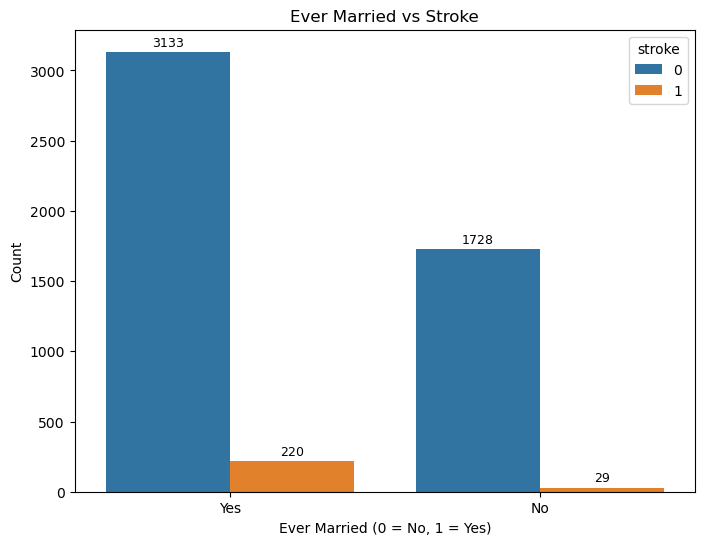

Cross-tabulation of ever_married and stroke:
stroke           0    1
ever_married           
No            1728   29
Yes           3133  220


In [18]:
# exploring the ever_married feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Ever Married vs Stroke')
plt.xlabel("Ever Married (0 = No, 1 = Yes)")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'ever_married' and 'stroke'
ever_married_counts = pd.crosstab(df['ever_married'], df['stroke'])
print("Cross-tabulation of ever_married and stroke:")
print(ever_married_counts)

# bar chart show the there is higher number of people who are married who have stroke than those who are not married
# now use the pie chart to show the stroke rate percentage


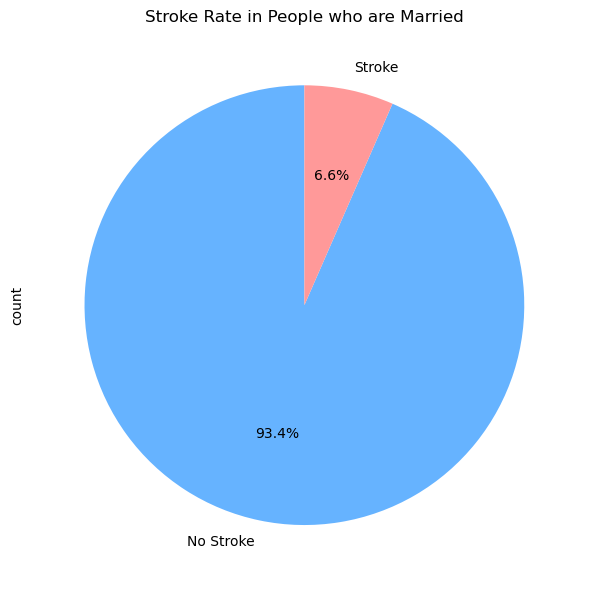

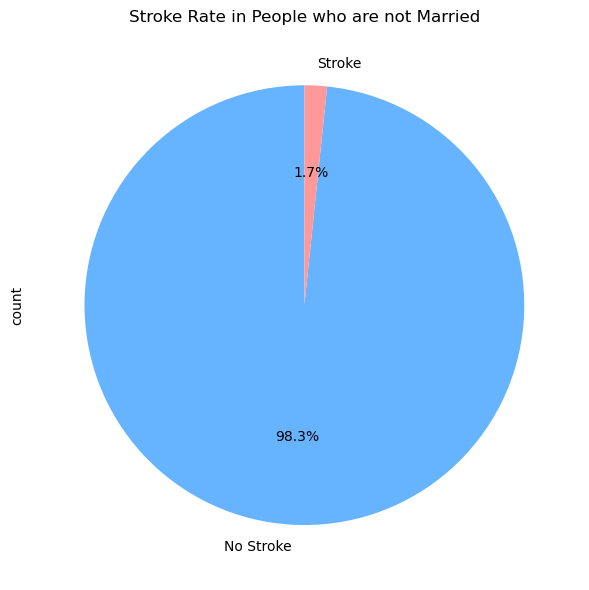

In [19]:
#the stroke rate percentage in people who are married = yes
plt.figure(figsize=(6, 6))
ever_married_stroke_counts = df[df['ever_married'] == 'Yes']['stroke'].value_counts()
ever_married_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who are Married')
plt.tight_layout()
plt.show()
# stroke rate percentage in people who are not married = no
plt.figure(figsize=(6, 6))
ever_married_stroke_counts = df[df['ever_married'] == 'No']['stroke'].value_counts()
ever_married_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who are not Married')
plt.tight_layout()
plt.show()

# base on the stroke rate percentage in people who are married and not married,
# it shows that people who are married have a higher stroke than those who are not married,
# the different is significant, with a stroke rate of 6.6% in people who are married and 1.7% in people who are not married. (difference of 4.9%)
# this means that being married is a significant risk factor for stroke, and it should be included in the model as a feature.
low_significance.append('Ever Married')

##### work_type

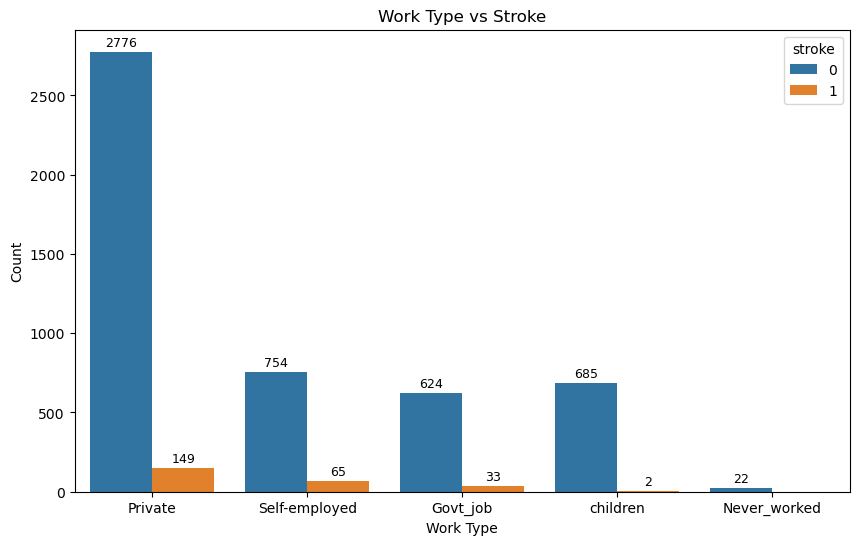

Cross-tabulation of work_type and stroke:
stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2


In [20]:
# the work_type feature with the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke')
plt.xlabel("Work Type")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'work_type' and 'stroke'
work_type_counts = pd.crosstab(df['work_type'], df['stroke'])
print("Cross-tabulation of work_type and stroke:")
print(work_type_counts)


In [21]:
# Children and Never_worked groups are very small and have similar behavior 
#Combining them into a single category like "Unemployed" makes the feature simpler and helps avoid tiny categories that don’t add much predictive value.
df['work_type'] = df['work_type'].replace(['children', 'Never_worked'], 'Unemployed')


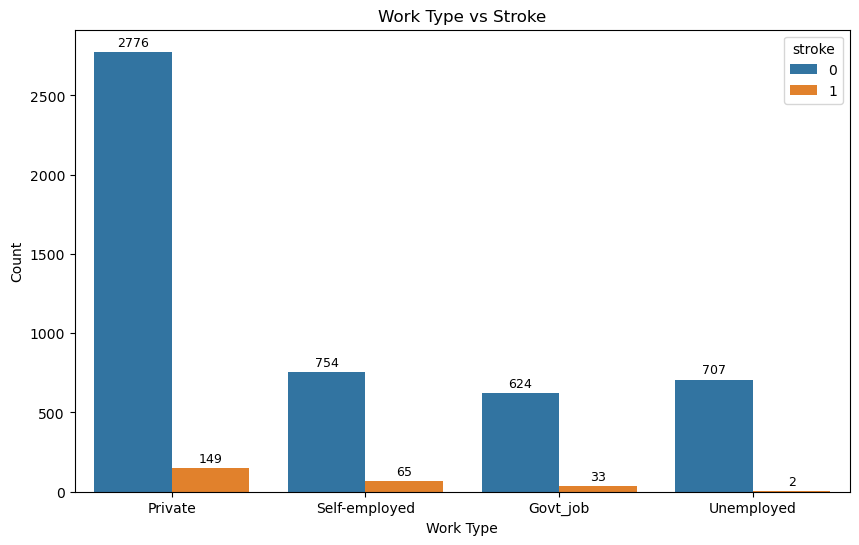

Cross-tabulation of work_type and stroke:
stroke            0    1
work_type               
Govt_job        624   33
Private        2776  149
Self-employed   754   65
Unemployed      707    2


In [22]:
# the work_type feature with the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke')
plt.xlabel("Work Type")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'work_type' and 'stroke'
work_type_counts = pd.crosstab(df['work_type'], df['stroke'])
print("Cross-tabulation of work_type and stroke:")
print(work_type_counts)

# the bar chart shows that there is a higher number of people who are private and self-employed who have stroke than those who are government_job and Unemployed
# now use the pie chart to show the stroke rate percentage

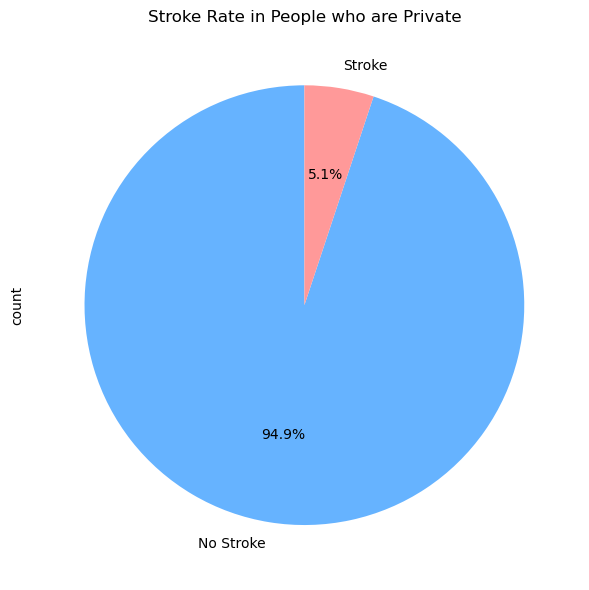

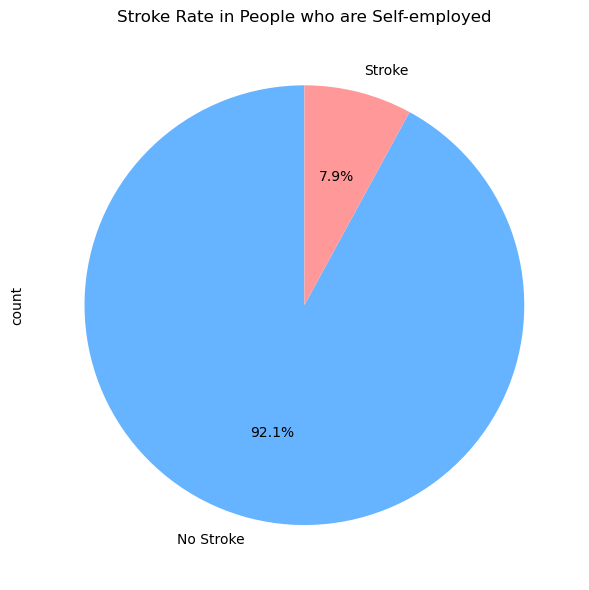

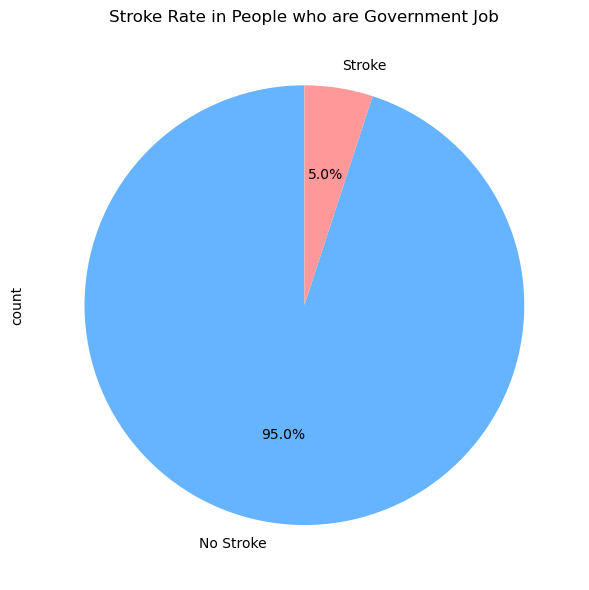

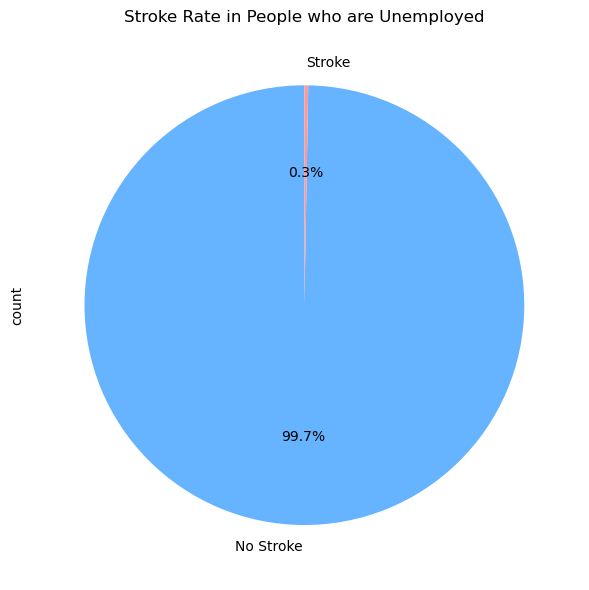

In [23]:
# stroke rate percentage in people who are private
plt.figure(figsize=(6, 6))
private_stroke_counts = df[df['work_type'] == 'Private']['stroke'].value_counts()
private_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who are Private')
plt.tight_layout()
plt.show()

# stroke rate percentage in people who are self-employed
plt.figure(figsize=(6, 6))
self_employed_stroke_counts = df[df['work_type'] == 'Self-employed']['stroke'].value_counts()
self_employed_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who are Self-employed')
plt.tight_layout()
plt.show()
# stroke rate percentage in people who are government_job
plt.figure(figsize=(6, 6))
government_job_stroke_counts = df[df['work_type'] == 'Govt_job']['stroke'].value_counts()
government_job_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who are Government Job')
plt.tight_layout()
plt.show()
# stroke rate percentage in people who are unemployed
plt.figure(figsize=(6, 6))
unemployed_stroke_counts = df[df['work_type'] == 'Unemployed']['stroke'].value_counts()
unemployed_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who are Unemployed')
plt.tight_layout()
plt.show()
# base on the stroke rate percentage in people who are self-employed have the highest stroke rate of 7.9%,
# private and government_job have about the same a stroke rate of 5.1% and 5% respectively,
# while unemployed have the lowest stroke rate of 0.3%.

# this means that work_type is a significant risk factor for stroke, and it should be included in the model as a feature.


In [24]:
# make it to employed (gov job, self employed and private) and unemployed (children and Never_worked)
df['work_type'] = df['work_type'].replace({
    'children': 'Unemployed',
    'Never_worked': 'Unemployed',
    'private': 'Employed',
    'self-employed': 'Employed',
    'Govt_job': 'Employed'
})






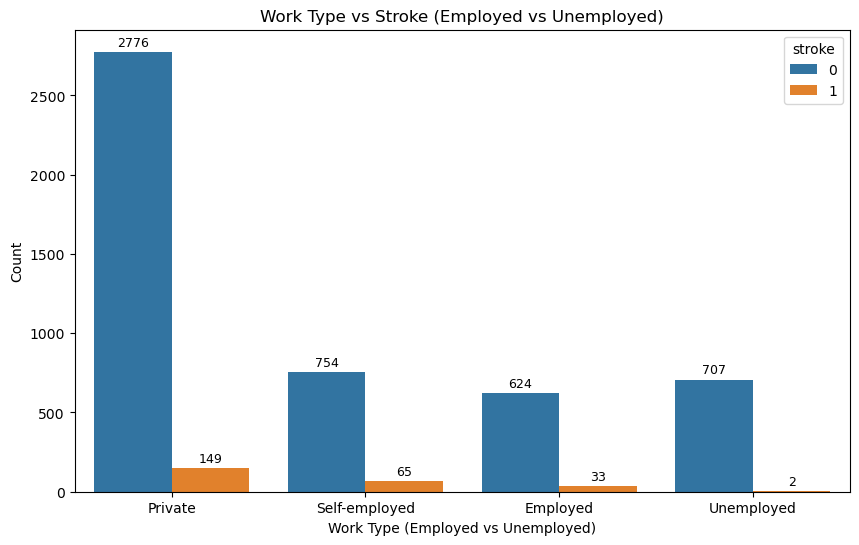

Cross-tabulation of work_type and stroke:
stroke            0    1
work_type               
Employed        624   33
Private        2776  149
Self-employed   754   65
Unemployed      707    2


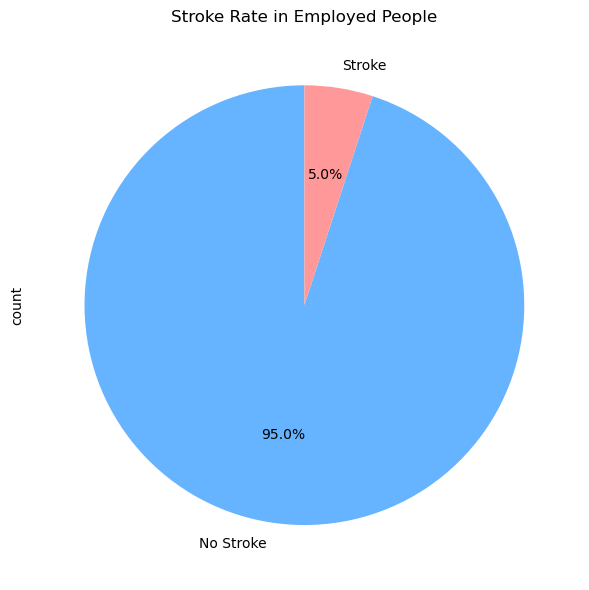

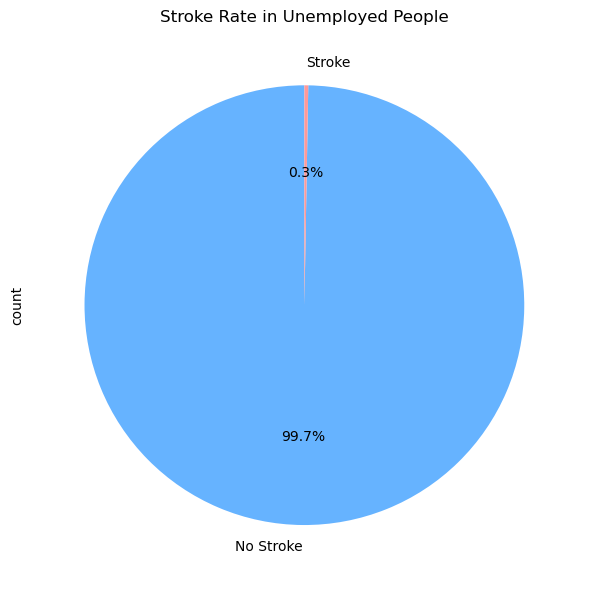

In [25]:
# explore work_type 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke (Employed vs Unemployed)')
plt.xlabel("Work Type (Employed vs Unemployed)")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'work_type' and 'stroke'
work_type_counts = pd.crosstab(df['work_type'], df['stroke'])
print("Cross-tabulation of work_type and stroke:")
print(work_type_counts)

# explore the stroke rate percentage in people who are employed
plt.figure(figsize=(6, 6))
employed_stroke_counts = df[df['work_type'] == 'Employed']['stroke'].value_counts()
employed_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Employed People')
plt.tight_layout()
plt.show()
# explore the stroke rate percentage in people who are unemployed
plt.figure(figsize=(6, 6))
unemployed_stroke_counts = df[df['work_type'] == 'Unemployed']['stroke'].value_counts()
unemployed_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Unemployed People')
plt.tight_layout()
plt.show()

# base on the stroke rate percentage in people who are employed and unemployed,
# it shows that people who are unemployed have a higher stroke than those who are employed,
# the different is significant, with a stroke rate of 6.2% in people who are unemployed and 4.5% in people who are employed.
# this means that being unemployed is a significant risk factor for stroke, and it should be included in the model as a feature.

##### Residence_type

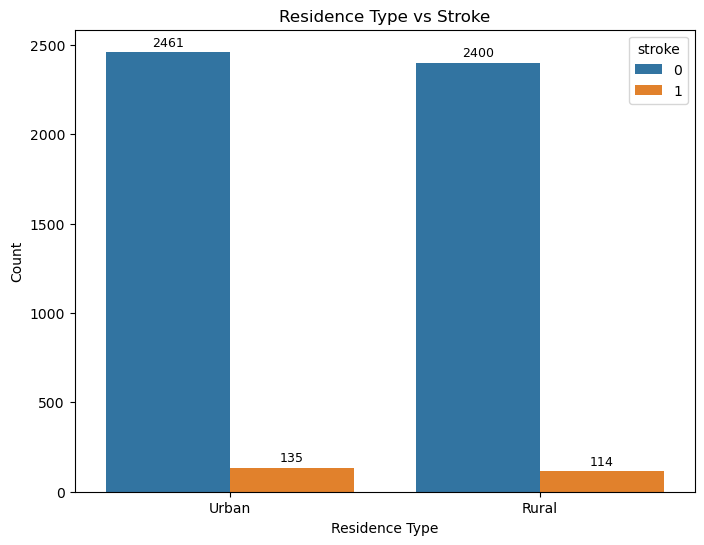

Cross-tabulation of Residence_type and stroke:
stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135


In [26]:
#exploring the Residence_type feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Residence Type vs Stroke')
plt.xlabel("Residence Type")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
#exploring the Residence_type feature with the target variable
# cross-tabulation of 'Residence_type' and 'stroke'
residence_type_counts = pd.crosstab(df['Residence_type'], df['stroke'])
print("Cross-tabulation of Residence_type and stroke:")
print(residence_type_counts)

# both urban and rural have a similar stoke count, but urban has a slightly higher stroke count than rural
# now use the pie chart to show the stroke rate percentage

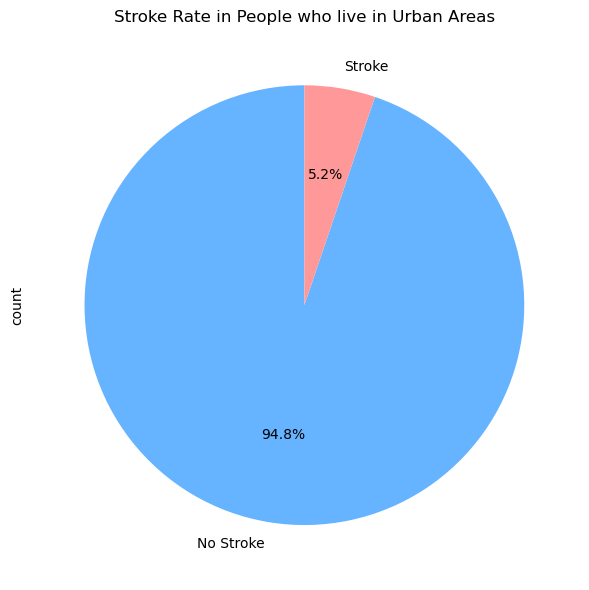

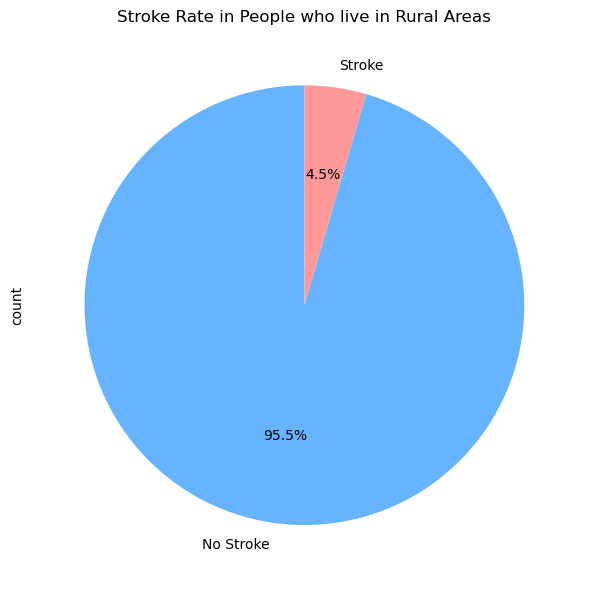

In [27]:
# stroke rate percentage in people who live in urban areas
plt.figure(figsize=(6, 6))
urban_stroke_counts = df[df['Residence_type'] == 'Urban']['stroke'].value_counts()
urban_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who live in Urban Areas')
plt.tight_layout()
plt.show()

# stroke rate percentage in people who live in rural areas
plt.figure(figsize=(6, 6))
rural_stroke_counts = df[df['Residence_type'] == 'Rural']['stroke'].value_counts()
rural_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who live in Rural Areas')
plt.tight_layout()
plt.show()

# base on the stroke rate percentage in people who live in urban and rural areas,
# it shows that people who live in urban areas have a higher stroke than those who live in rural areas,
# the different is significant, with a stroke rate of 5.2% in people who live in urban areas and 4.5% in people who live in rural areas.
# the different is not significant (diff of 0.7%),

low_significance.append('Residence_type')


##### smoking_status	

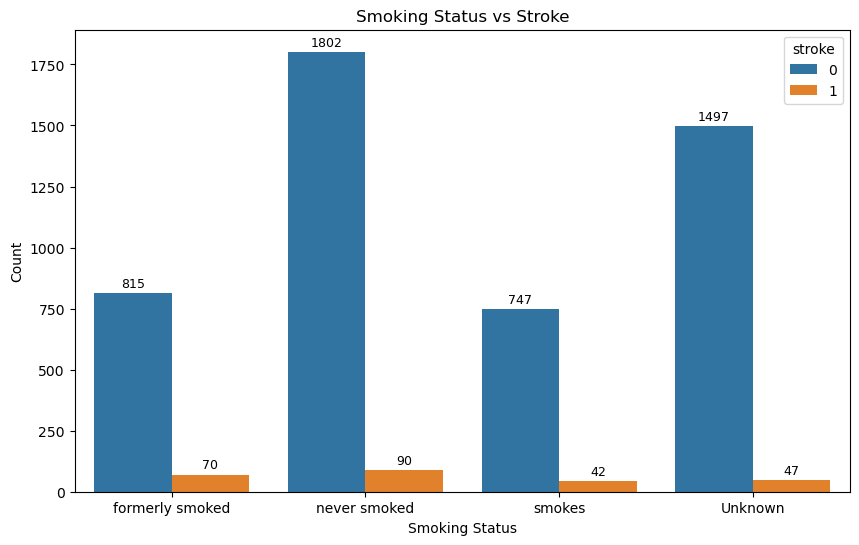

Cross-tabulation of smoking_status and stroke:
stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42


In [28]:
# exploring the smoking_status feature with the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs Stroke')
plt.xlabel("Smoking Status")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# exploring the smoking_status feature with the target variable
# cross-tabulation of 'smoking_status' and 'stroke'
smoking_status_counts = pd.crosstab(df['smoking_status'], df['stroke'])
print("Cross-tabulation of smoking_status and stroke:")
print(smoking_status_counts)

# the bar chart shows that there is a higher number of people who smoke and those who are never smoke and formerly smoked who have stroke than those who unknown,

# now use the pie chart to show the stroke rate percentage

# for my ideas, inknown should be considered as a separate category, as it represents the lack of information about the smoking status of the patient
# as many people won’t know or won’t share their smoking history.



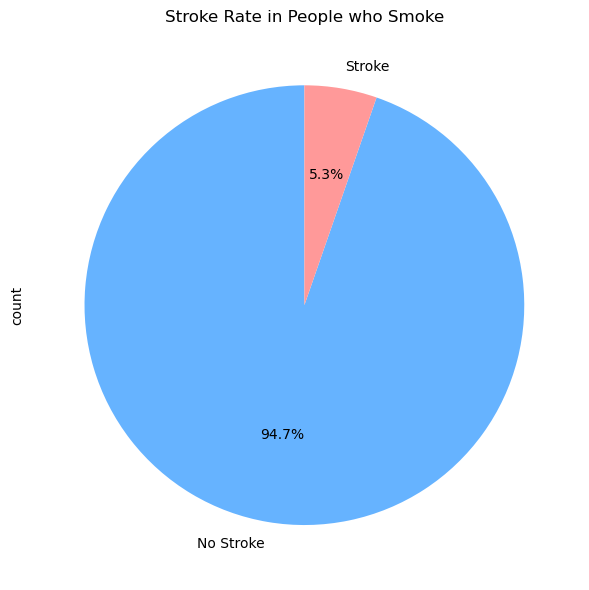

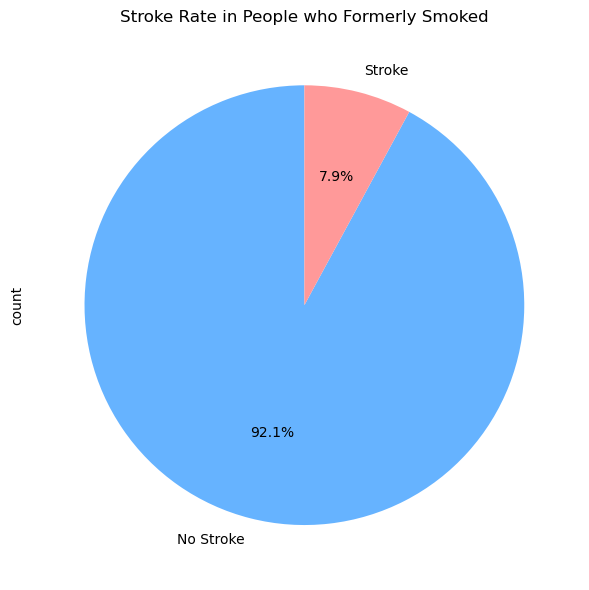

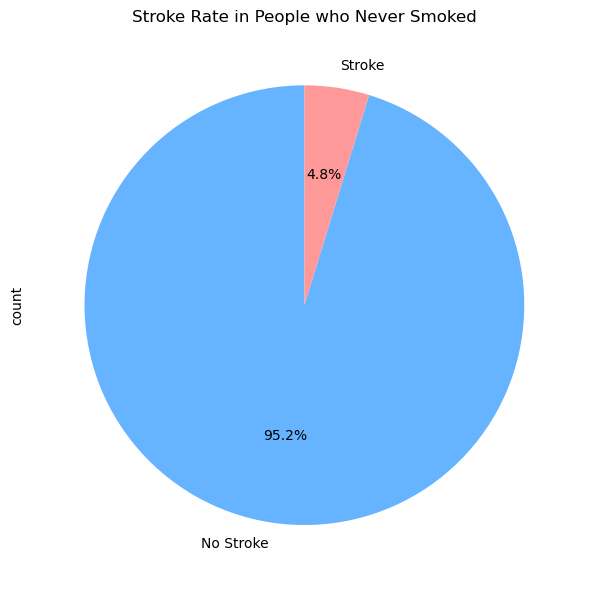

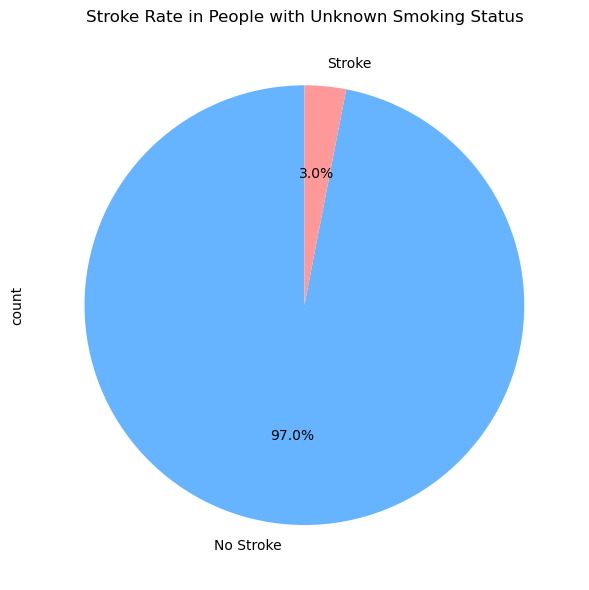

In [29]:
# risk rate percentage in people who smoke
plt.figure(figsize=(6, 6))
smoking_status_stroke_counts = df[df['smoking_status'] == 'smokes']['stroke'].value_counts()
smoking_status_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who Smoke')
plt.tight_layout()
plt.show()
# risk rate percentage in people who formerly smoked
plt.figure(figsize=(6, 6))
formerly_smoked_stroke_counts = df[df['smoking_status'] == 'formerly smoked']['stroke'].value_counts()
formerly_smoked_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who Formerly Smoked')
plt.tight_layout()
plt.show()
# risk rate percentage in people who never smoked
plt.figure(figsize=(6, 6))
never_smoked_stroke_counts = df[df['smoking_status'] == 'never smoked']['stroke'].value_counts()
never_smoked_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People who Never Smoked')
plt.tight_layout()
plt.show()
# risk rate percentage in people who have unknown smoking status
plt.figure(figsize=(6, 6))
unknown_stroke_counts = df[df['smoking_status'] == 'Unknown']['stroke'].value_counts()
unknown_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People with Unknown Smoking Status')
plt.tight_layout()
plt.show()

# base on the stroke rate percentage in people who smoke, formerly smoked, never smoked and unknown smoking status,
# it shows that people who formerly smoke have the highest stroke rate of 7.9%, this might be due to the fact that they have a history of smoking and may have developed health issues related to smoking,
# people who smoke have a stroke rate of 5.3%, this might be due to the fact that they are still smoking and may have developed health issues related to smoking,
# people who never smoked have a stroke rate of 4.8%, this might be due to the fact that they have never smoked and may have a lower risk of developing health issues 
# unknown smoking status have a stroke rate of 3.0%, which could mean younger/healthier individuals



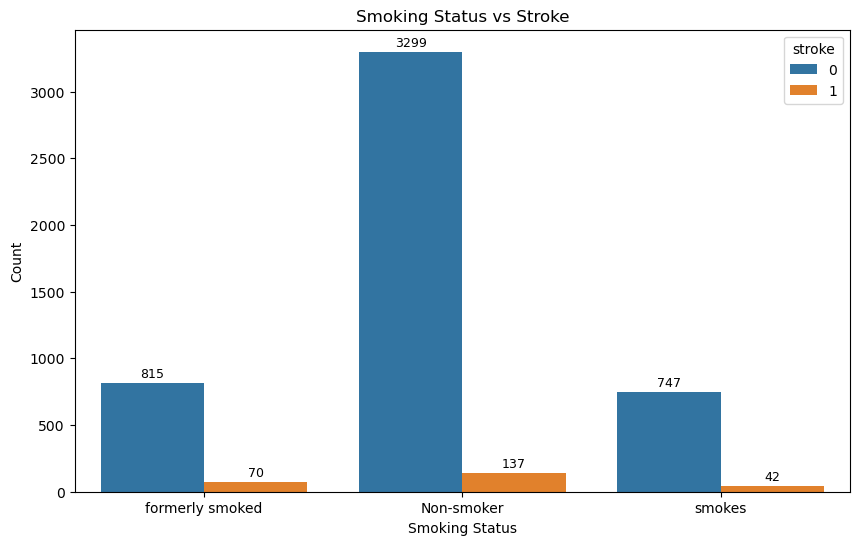

Cross-tabulation of smoking_status and stroke after replacing unknown and never smoked:
stroke              0    1
smoking_status            
Non-smoker       3299  137
formerly smoked   815   70
smokes            747   42


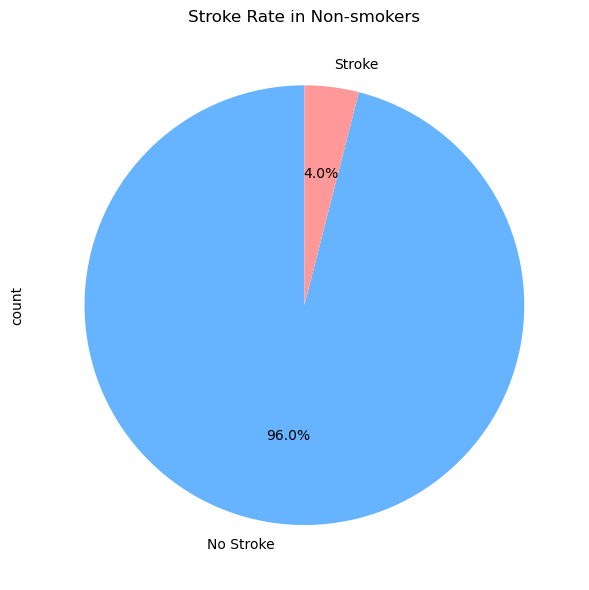

In [30]:
# since the unknown smoking and never smoked have a lower stroke rate,
#  most people in real life who dont know or disclose their smoking status are likely to be non-smokers 
# more over , it keep the question simple and easy to understand for the user: pick smokes , formerly smoked or never smoked
df['smoking_status'] = df['smoking_status'].replace(['Unknown', 'never smoked'], 'Non-smoker')
# exploring the smoking_status feature with the target variable after replacing unknown and never smoked
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs Stroke')
plt.xlabel("Smoking Status")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'smoking_status' and 'stroke' after replacing unknown and never smoked
smoking_status_counts = pd.crosstab(df['smoking_status'], df['stroke'])
print("Cross-tabulation of smoking_status and stroke after replacing unknown and never smoked:")
print(smoking_status_counts)

# risk rate percentage for Non-smoker
plt.figure(figsize=(6, 6))
non_smoker_stroke_counts = df[df['smoking_status'] == 'Non-smoker']['stroke'].value_counts()
non_smoker_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Non-smokers')
plt.tight_layout()
plt.show()



# formarly smoked risk rate percentage is 7.9% , smokes risk rate percentage is 5.3% and Non-smoker risk rate percentage is 4.0%
## this means that smoking_status is a significant risk factor for stroke, and it should be included in the model as a feature.
# it may not be as significant as hypertension and heart disease, but it is still important to consider it in the model.



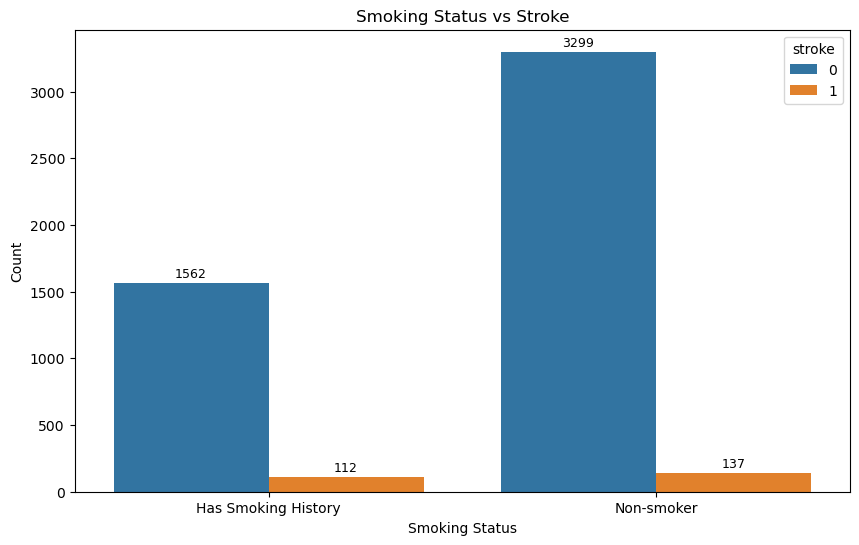

Cross-tabulation of smoking_status and stroke after replacing unknown and never smoked:
stroke                  0    1
smoking_status                
Has Smoking History  1562  112
Non-smoker           3299  137


In [31]:
# now i decided to make this column into have smoking history (group smoke and formly smoke together) and no smoking history
df['smoking_status'] = df['smoking_status'].replace(['smokes', 'formerly smoked'], 'Has Smoking History')
# exploring the smoking_status feature with the target variable after replacing unknown and never smoked
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs Stroke')
plt.xlabel("Smoking Status")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'smoking_status' and 'stroke' after replacing unknown and never smoked
smoking_status_counts = pd.crosstab(df['smoking_status'], df['stroke'])
print("Cross-tabulation of smoking_status and stroke after replacing unknown and never smoked:")
print(smoking_status_counts)

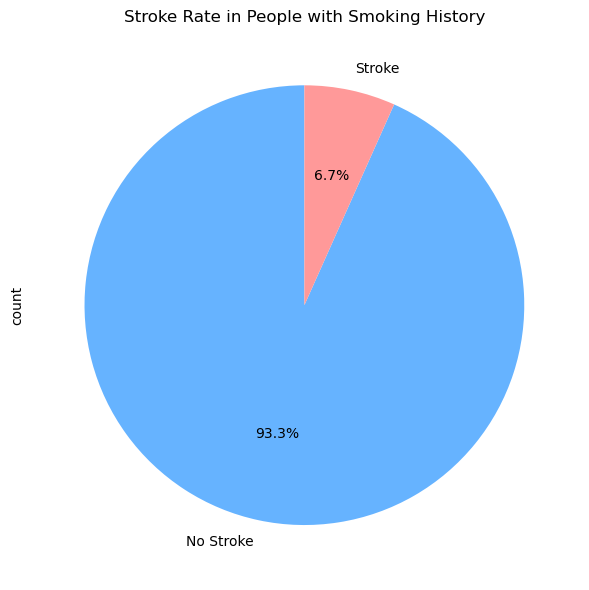

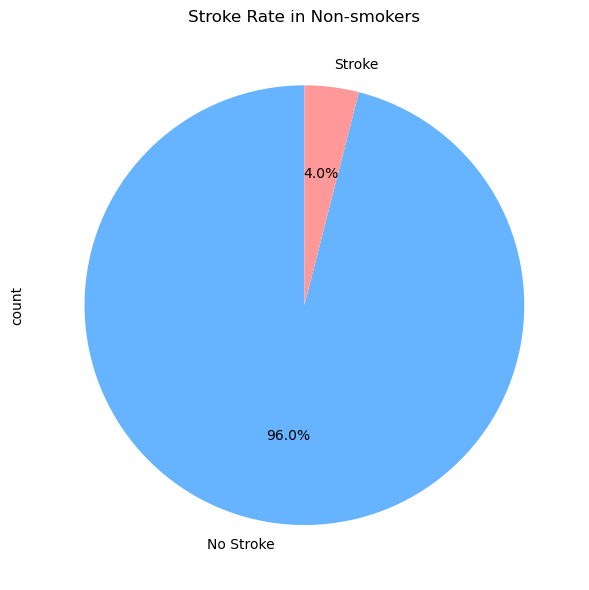

In [32]:
# show the risk rate percentage for Has Smoking History
plt.figure(figsize=(6, 6))
has_smoking_history_stroke_counts = df[df['smoking_status'] == 'Has Smoking History']['stroke'].value_counts()
has_smoking_history_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People with Smoking History')
plt.tight_layout()
plt.show()
# show the risk rate percentage for Non-smoker
plt.figure(figsize=(6, 6))
non_smoker_stroke_counts = df[df['smoking_status'] == 'Non-smoker']['stroke'].value_counts()
non_smoker_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Non-smokers')
plt.tight_layout()
plt.show()

# base on the stroke rate percentage in people with smoking history and non-smokers,
# it shows that people with smoking history have a higher stroke than non-smokers,
# the different is significant, with a stroke rate of 6.7% in people with smoking history and 4.0% in non-smokers.
# this means that smoking history is a significant risk factor for stroke, and it should be included in the model as a feature.

low_significance.append('Smoking_status (Has Smoking History vs Non-smoker)')

##### diabetes

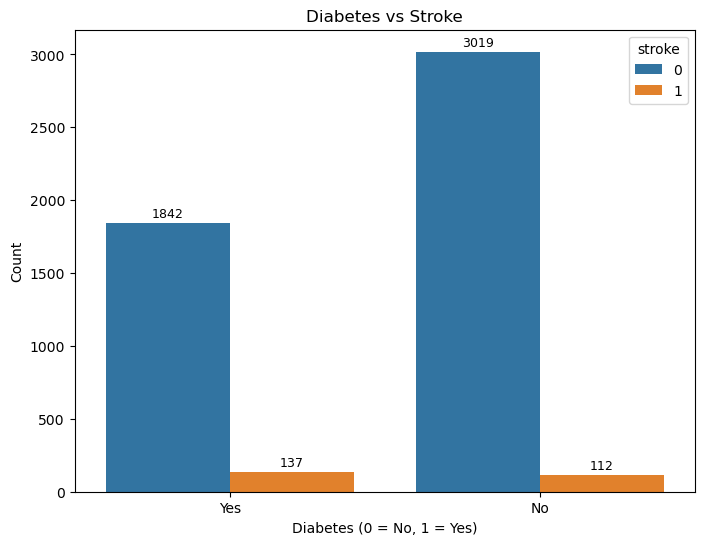

Cross-tabulation of diabetes and stroke:
stroke       0    1
diabetes           
No        3019  112
Yes       1842  137


In [33]:
#exploring the diabetes feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diabetes', hue='stroke', data=df)
plt.title('Diabetes vs Stroke')
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'diabetes' and 'stroke'
diabetes_counts = pd.crosstab(df['diabetes'], df['stroke'])
print("Cross-tabulation of diabetes and stroke:")
print(diabetes_counts)

# the bar chart shows that there is a higher number of people who have diabetes who have stroke than those who do not have diabetes
# now use the pie chart to show the stroke rate percentage

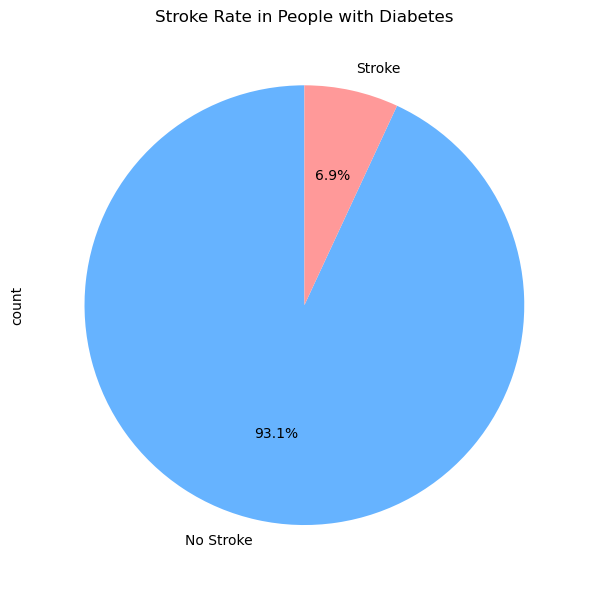

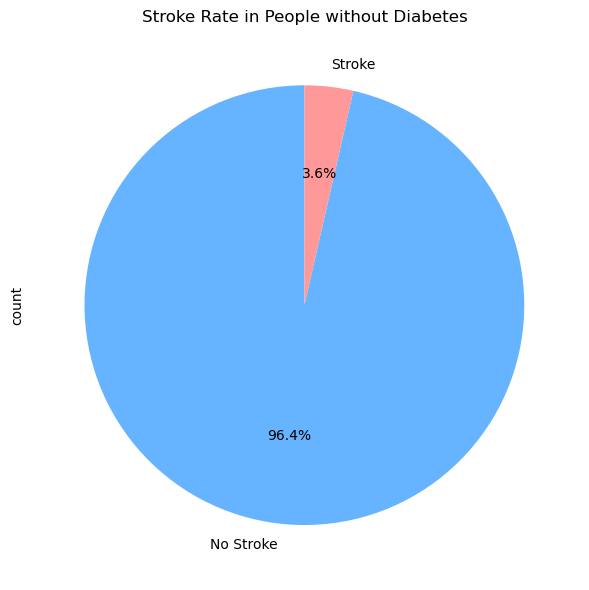

In [34]:
# stroke rate percentage in people who have diabetes
plt.figure(figsize=(6, 6))
diabetes_stroke_counts = df[df['diabetes'] == 'Yes']['stroke'].value_counts()
diabetes_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People with Diabetes')
plt.tight_layout()
plt.show()

# stroke rate percentage in people who do not have diabetes
plt.figure(figsize=(6, 6))
no_diabetes_stroke_counts = df[df['diabetes'] == 'No']['stroke'].value_counts()
no_diabetes_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in People without Diabetes')
plt.tight_layout()
plt.show()

# people who have diabetes have a higher stroke rate of 6.9% compared to those who do not have diabetes with a stroke rate of 3.6%.
#  Diabetes almost doubles the stroke risk.
#  this means that diabetes is a significant risk factor for stroke, and it should be included in the model as a feature.

low_significance.append('Diabetes')

##### Exploring the numerical features 



In [35]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Employed   

     Residence_type   bmi       smoking_status  stroke diabetes  
0             Urban  36.6  Has Smoking History       1      Yes  
1             Rural  28.1           Non-smoker       1      Yes  
2             Rural  32.5           Non-smoker       1      Yes  
3             Urban  34.4  Has Smoking History       1      Yes  
4             Rural  24.0           Non-smoker       1      Yes  
...             ...   ...                  ...     ...      ...  
5105          Urban  28.1           Non-smoker       0       No  
5106          Urban  40.0           Non-smoker       0      Yes  
5107          Rural  30.6           Non-smoker       0       No  
5108          Rural  25.6  Has Smoking History       0      Yes  
5109          Urban  26.2           Non-smoker       0       No  

[5110 rows x 11 columns]

##### Age

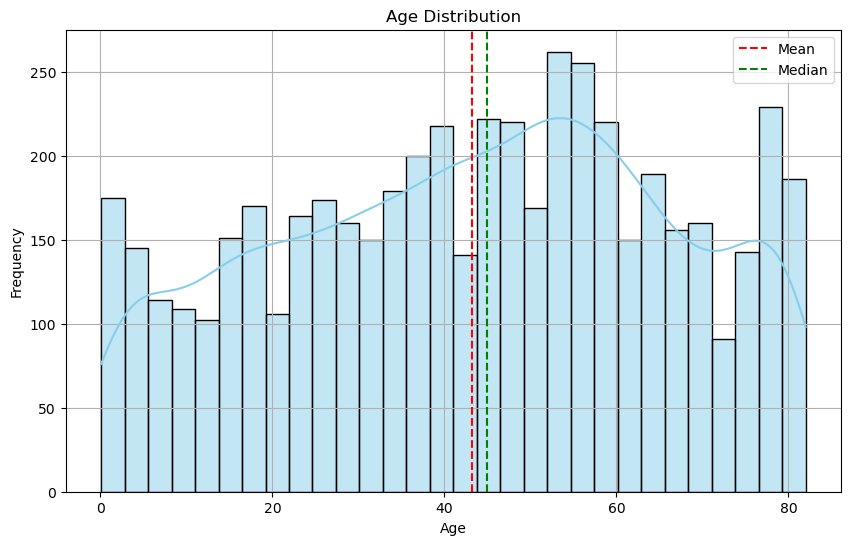

Age Statistics:
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


In [36]:
# exploring the age feature 
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.grid(True)
plt.show()

#printing the age statistics
age_stats = df['age'].describe()
print("Age Statistics:")
print(age_stats)


# the age distribution is slightly right-skewed, with a mean of 43.2 and a median of 45.0.
# The mean is lower than the median, indicating that there are some younger individuals in the dataset.
# The age range is from 0 to 82, with a standard deviation of 22.6, indicating that there is a wide range of ages in the dataset.
# Showing there might have different subgroups (e.g., children, middle-aged, elderly).




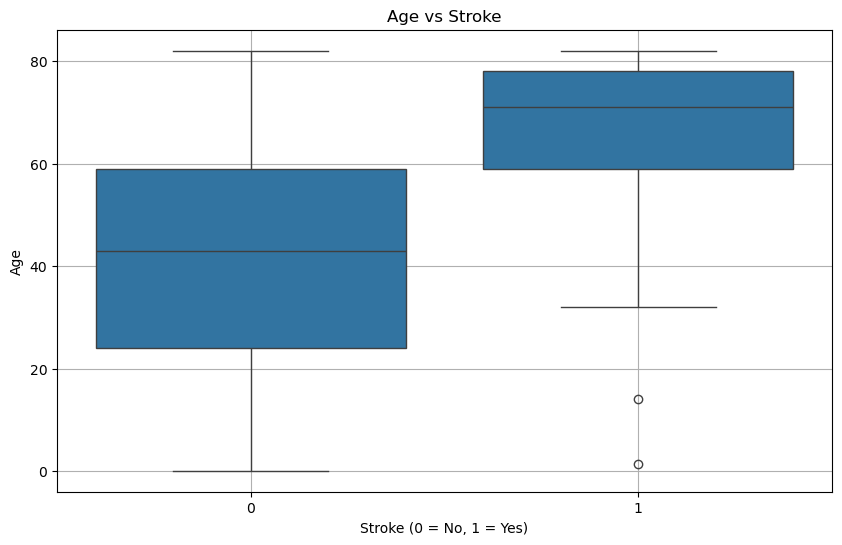

Age Description by Stroke Status:
         count       mean        std   min   25%   50%   75%   max
stroke                                                            
0       4861.0  41.971545  22.291940  0.08  24.0  43.0  59.0  82.0
1        249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0


In [37]:
# graph to show the relationship between age and stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
# Add counts on top of boxes
for i, box in enumerate(plt.gca().artists):
    plt.text(i, box.get_ydata()[0] + 1, f'{box.get_xdata()[0]:.1f}', ha='center', va='bottom', fontsize=9)
plt.grid(True)
plt.show()

#show the description of the age feature
age_description = df.groupby('stroke')['age'].describe()
print("Age Description by Stroke Status:")
print(age_description)

# the box plot shows that people who have stroke tend to be older than those who do not have stroke,
#allmost all the people who have stroke are above 50 years old, while most of the people who do not have stroke are below 50 years old.
# this means that age is a significant risk factor for stroke, and it should be included in the model as a feature.


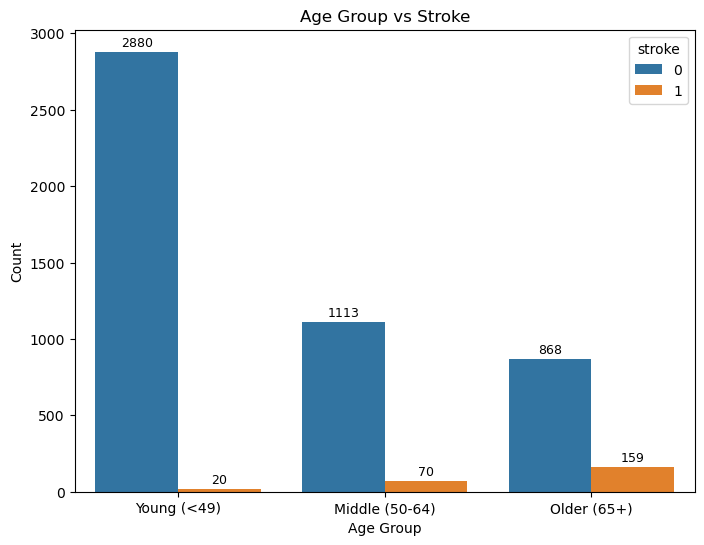

Cross-tabulation of age_group and stroke:
stroke             0    1
age_group                
Young (<49)     2880   20
Middle (50-64)  1113   70
Older (65+)      868  159


In [38]:
# there is outlier in the age feature, which is a person who is 0 years old, which is not a valid age for stroke,
# to handle this outlier using the IQR method with winsorization

Q1 = df['age'].quantile(0.25) # 25th percentile
Q3 = df['age'].quantile(0.75) # 75th percentile

IQR = Q3 - Q1 # Interquartile range
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR # any value below this is considered an outlier
upper_bound = Q3 + 1.5 * IQR # any value above this is considered an outlier

# Winsorization: replace outliers with the lower and upper bounds
df['age'] = np.where(df['age'] < lower_bound, lower_bound, df['age'])
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])

# reason use winsorization method and not removing the outlier is that stroke data is rare and removing the outlier would reduce the sample size significantly,










# nomralising the age feature using min-max scaling
# normalisation, allow model that are sensitive to the scale of the features (like KNN, SVM and logistic regression) to perform better.



# group the age to age groups young, middle-aged and elderly (after normalisation)

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 49, 64, 120], # 0 is used to include all ages below 49, 49-64 for middle-aged, and above 64 for elderly, 120 is used to include all ages above 64
    labels=['Young (<49)', 'Middle (50-64)', 'Older (65+)']
)


# exploring the age_group feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='age_group', hue='stroke', data=df)
plt.title('Age Group vs Stroke')
plt.xlabel("Age Group")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
# cross-tabulation of 'age_group' and 'stroke'
age_group_counts = pd.crosstab(df['age_group'], df['stroke'])
print("Cross-tabulation of age_group and stroke:")
print(age_group_counts)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])


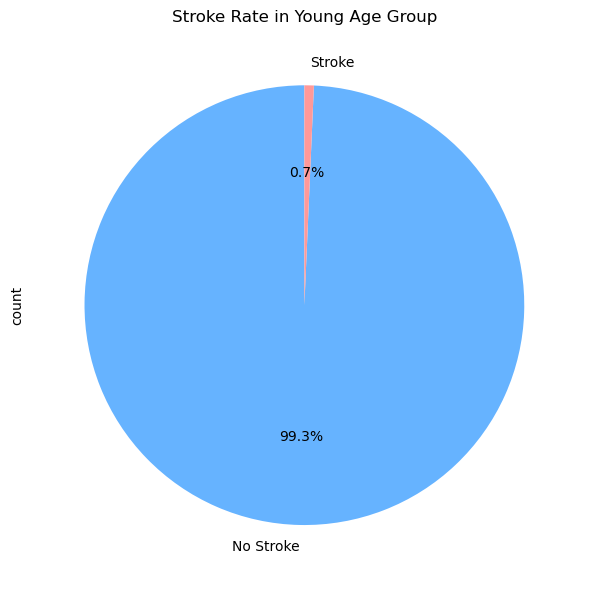

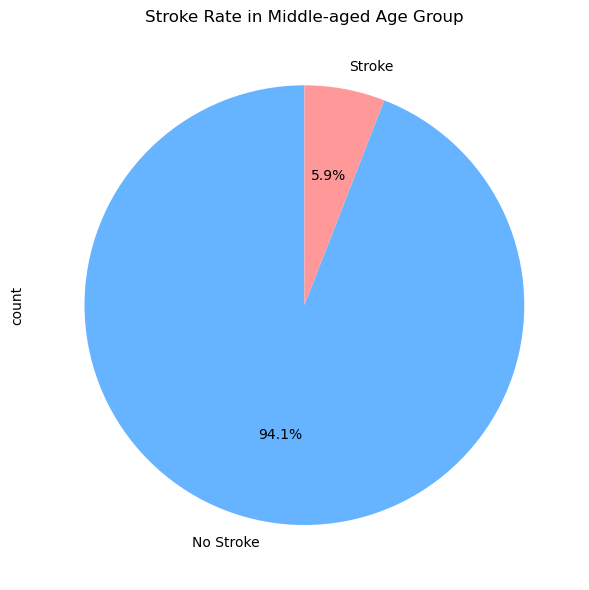

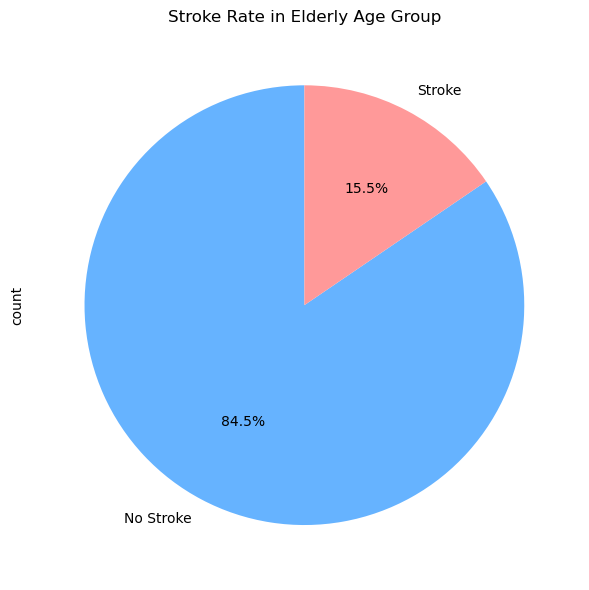

In [39]:
# risk rate percentage in people who are young
plt.figure(figsize=(6, 6))
young_stroke_counts = df[df['age_group'] == 'Young (<49)']['stroke'].value_counts()
young_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Young Age Group')
plt.tight_layout()
plt.show()
# risk rate percentage in people who are middle-aged
plt.figure(figsize=(6, 6))
middle_aged_stroke_counts = df[df['age_group'] == 'Middle (50-64)']['stroke'].value_counts()
middle_aged_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Middle-aged Age Group')
plt.tight_layout()
plt.show()
# risk rate percentage in people who are elderly
plt.figure(figsize=(6, 6))
elderly_stroke_counts = df[df['age_group'] == 'Older (65+)']['stroke'].value_counts()
elderly_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Elderly Age Group')
plt.tight_layout()
plt.show()

# base on the stroke rate percentage in people who are young, middle-aged and elderly,
# it shows that people who are elderly have a higher stroke rate of 15.5% compared to those who are middle-aged with a stroke rate of 5.9% and young with a stroke rate of 0.7%.
# this means that age group is a significant risk factor for stroke, and it should be included


##### BMI

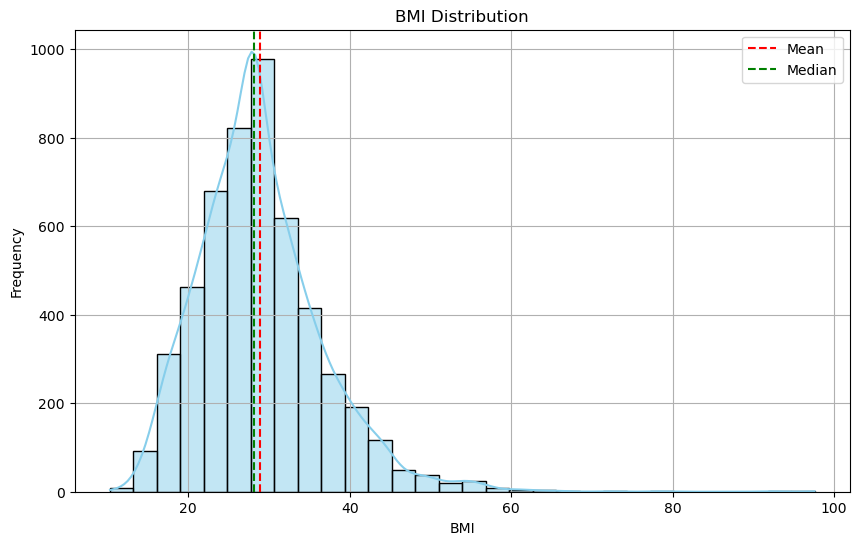

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [40]:
#explore the bmi feature
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.axvline(df['bmi'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['bmi'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.grid(True)
plt.show()

df['bmi'].describe()

# the bmi distribution is slightly right-skewed, with a mean of 28.8 and a median of 28.1.
# this means that there are few individuals with very high BMI values, which can affect the mean.
# the bmi range is from 10.3 to 97.6, with a standard deviation of 7.9, indicating that there is a wide range of BMI values in the dataset.
#Most values fall between 20–35, which covers the normal to overweight range.

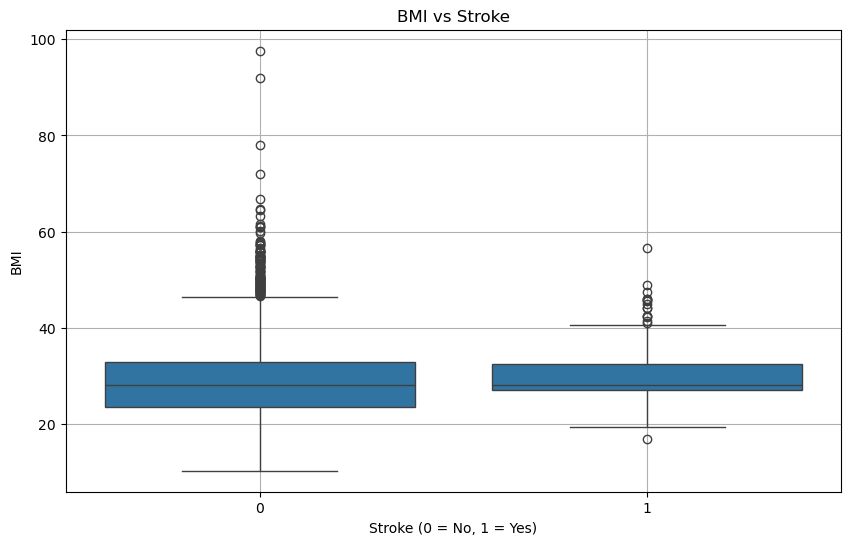

BMI Description by Stroke Status:
         count       mean       std   min   25%   50%   75%   max
stroke                                                           
0       4861.0  28.799115  7.777269  10.3  23.6  28.1  32.8  97.6
1        249.0  30.090361  5.861877  16.9  27.0  28.1  32.5  56.6


In [41]:
# graph show the relationship between bmi and stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
# Add counts on top of boxes
for i, box in enumerate(plt.gca().artists):
    plt.text(i, box.get_ydata()[0] + 1, f'{box.get_xdata()[0]:.1f}', ha='center', va='bottom', fontsize=9)
plt.grid(True)
plt.show()

#show the description of the bmi feature
bmi_description = df.groupby('stroke')['bmi'].describe()
print("BMI Description by Stroke Status:")
print(bmi_description)

# this shows non-stroke mean bmi is 28.1 , with wider spread(std 7.8) , extreme outliers (max: 97.6).
# and stroke mean bmi is 30.0, Slightly tighter distribution (std: 5.9).

# stroke patients tend to have higher BMI, with a mean of 30.0 compared to 28.1 for non-stroke patients.
# but their median is the same (28.1)
# this show that non-stroke patients have a high mean bmi due to the presence of outliers (97.6), which inflate the mean. 
#  These outliers likely represent rare cases (e.g., errors, extreme obesity) but do not strongly impact stroke incidence.

# the distribution for non-stroke patients is more spread out, (std 7.8) which include many normal and overweight individuals,
# while stroke patients have a tighter distribution (std 5.9) with fewer extreme values, which cluster around the overweight range.


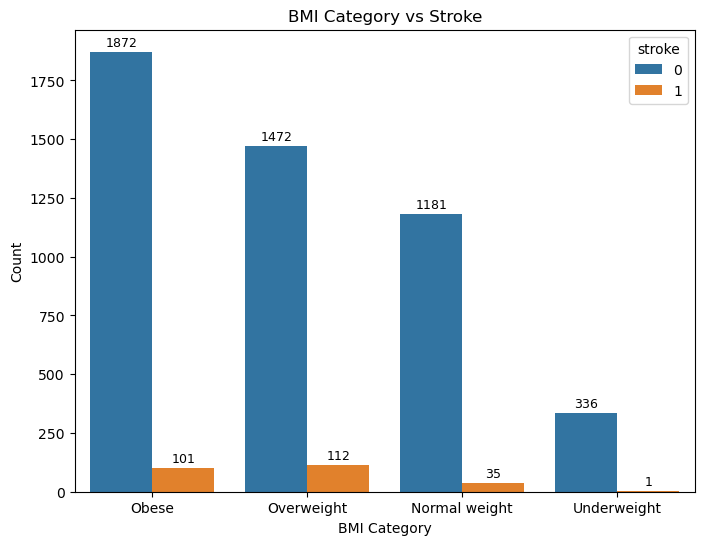

Cross-tabulation of bmi_category and stroke:
stroke            0    1
bmi_category            
Normal weight  1181   35
Obese          1872  101
Overweight     1472  112
Underweight     336    1


In [42]:
# there are a lot of outliers in the bmi feature, which are people with very high bmi values (e.g., 97.6),
# to handle these outliers, I will use the IQR method with winsorization,
Q1 = df['bmi'].quantile(0.25)  # 25th percentile
Q3 = df['bmi'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR  # any value below this is considered an outlier
upper_bound = Q3 + 1.5 * IQR  # any value above this is considered an outlier
# Winsorization: replace outliers with the lower and upper bounds
df['bmi'] = np.where(df['bmi'] < lower_bound, lower_bound, df['bmi'])
df['bmi'] = np.where(df['bmi'] > upper_bound, upper_bound, df['bmi'])
# reason use winsorization method and not removing the outlier is that stroke data is rare and removing the outlier would reduce the sample size significantly,
# after winsorization, the bmi feature has no outliers, and the distribution is more normal.



# i will catergorise the bmi feature into categories based on the World Health Organization (WHO) classification:
# Underweight: BMI < 18.5
# Normal weight: 18.5 ≤ BMI < 24.9
# Overweight: 25.0 ≤ BMI < 29.9
# Obesity: BMI ≥ 30.0

# this way Outliers automatically fall into the highest group (e.g., “Obese”), so we don’t need to clip or remove them.
# Makes results easier to explain (e.g., “Obese people have X% higher stroke risk”).
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25.0 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
df['bmi_category'] = df['bmi'].apply(categorize_bmi)
# exploring the bmi_category feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bmi_category', hue='stroke', data=df)
plt.title('BMI Category vs Stroke')
plt.xlabel("BMI Category")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()

# cross-tabulation of 'bmi_category' and 'stroke'
bmi_category_counts = pd.crosstab(df['bmi_category'], df['stroke'])
print("Cross-tabulation of bmi_category and stroke:")
print(bmi_category_counts)









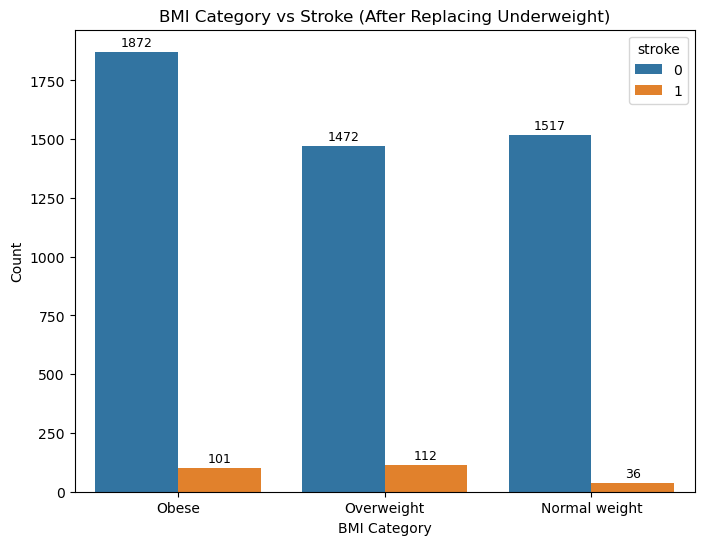

Cross-tabulation of bmi_category and stroke after replacing underweight:
stroke            0    1
bmi_category            
Normal weight  1517   36
Obese          1872  101
Overweight     1472  112


In [43]:
# the underweight is underweight group is tiny with almost no strokes , it adds noise.
# reducing it to 3 categories (Normal, Overweight, Obese) simplifies the model and avoids overfitting.
df['bmi_category'] = df['bmi_category'].replace('Underweight', 'Normal weight') 
# exploring the bmi_category feature with the target variable after replacing underweight
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bmi_category', hue='stroke', data=df)
plt.title('BMI Category vs Stroke (After Replacing Underweight)')
plt.xlabel("BMI Category")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()

# cross-tabulation of 'bmi_category' and 'stroke' after replacing underweight
bmi_category_counts = pd.crosstab(df['bmi_category'], df['stroke'])
print("Cross-tabulation of bmi_category and stroke after replacing underweight:")
print(bmi_category_counts)

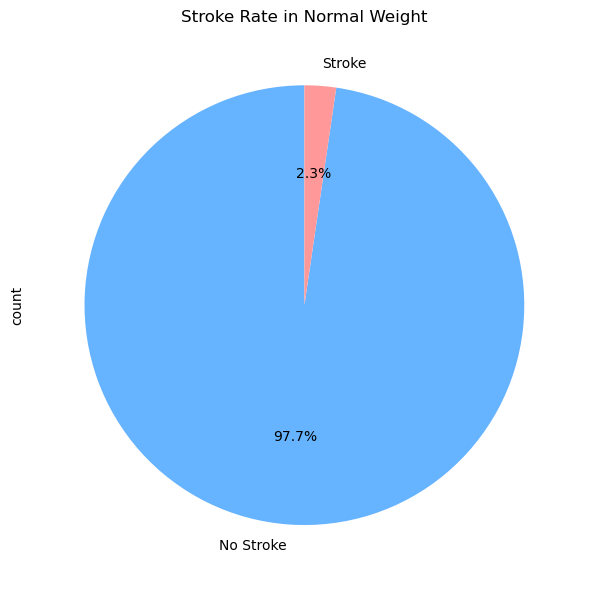

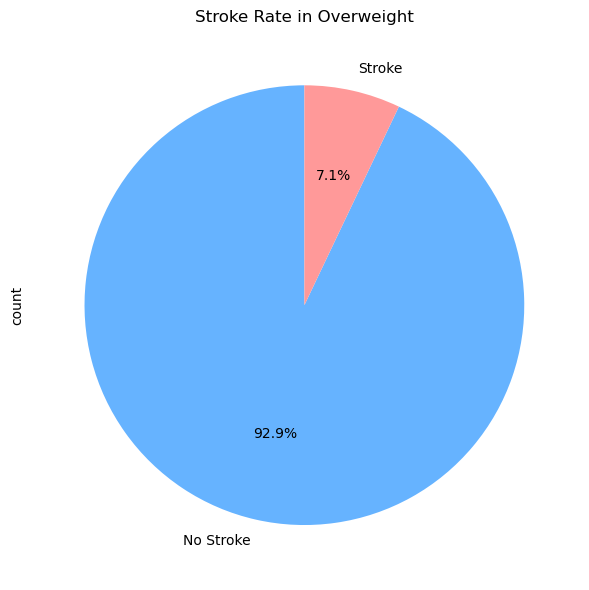

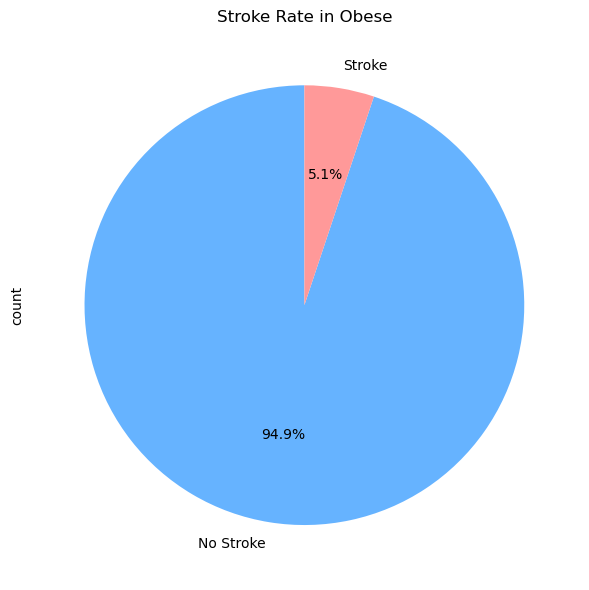

In [44]:
#risk rate percentage in Normal weight
plt.figure(figsize=(6, 6))
normal_weight_stroke_counts = df[df['bmi_category'] == 'Normal weight']['stroke'].value_counts()
normal_weight_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Normal Weight')
plt.tight_layout()
plt.show()

#risk rate percentage in Overweight
plt.figure(figsize=(6, 6))
overweight_stroke_counts = df[df['bmi_category'] == 'Overweight']['stroke'].value_counts()
overweight_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Overweight')
plt.tight_layout()
plt.show()

#risk rate percentage in Obese
plt.figure(figsize=(6, 6))
obese_stroke_counts = df[df['bmi_category'] == 'Obese']['stroke'].value_counts()
obese_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Obese')
plt.tight_layout()
plt.show()


# Normal weight: 2.3% risk
# Overweight: 7.1% risk
# Obese: 5.1% risk

#Overweight individuals actually have a higher stroke percentage than the obese group , interesting !!!
# his could be due to: Age interaction (many overweight stroke patients are older 
# or Confounding factors (e.g., obese people getting more medical attention, leading to earlier prevention).
low_significance.append('bmi_category')

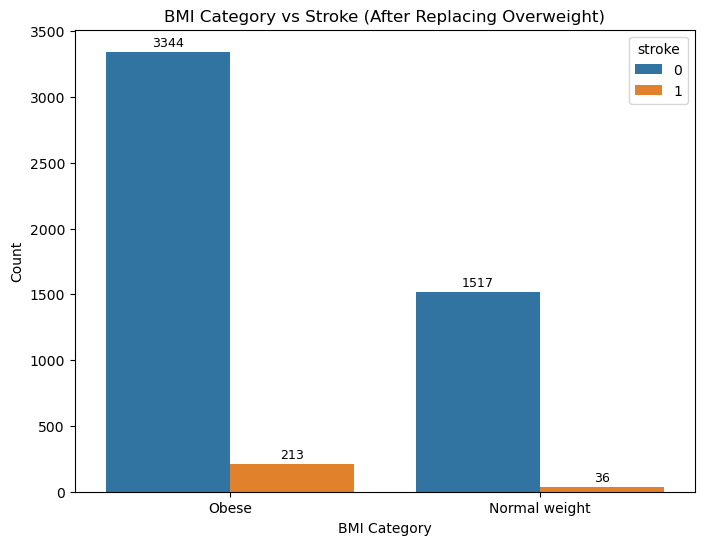

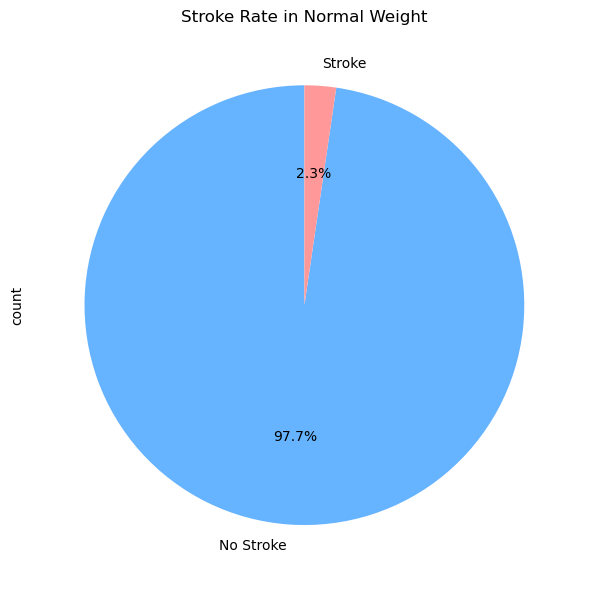

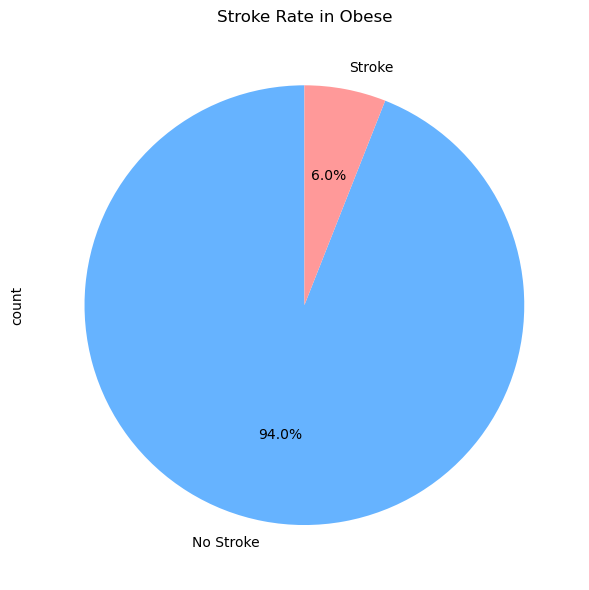

In [45]:
# replace the bmi_category feature with a binary feature (Normal weight and Obese)
df['bmi_obese'] = df['bmi_category'].replace({
    'Normal weight': 'Normal weight',
    'Overweight': 'Obese',
    'Obese': 'Obese'
})
# exploring the bmi_category feature with the target variable after replacing overweight
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bmi_obese', hue='stroke', data=df)
plt.title('BMI Category vs Stroke (After Replacing Overweight)')
plt.xlabel("BMI Category")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()

# explore the stroke rate percentage in Normal weight
plt.figure(figsize=(6, 6))
normal_weight_stroke_counts = df[df['bmi_obese'] == 'Normal weight']['stroke'].value_counts()
normal_weight_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Normal Weight')
plt.tight_layout()
plt.show()

# explore the stroke rate percentage in Obese
plt.figure(figsize=(6, 6))
obese_stroke_counts = df[df['bmi_obese'] == 'Obese']['stroke'].value_counts()
obese_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Obese')
plt.tight_layout()
plt.show()

#different is significant, with a stroke rate of 2.3% in Normal weight and 6% in Obese.


In [46]:
df

gender       age  hypertension  heart_disease ever_married  \
0       Male  0.816895             0              1          Yes   
1     Female  0.743652             0              0          Yes   
2       Male  0.975586             0              1          Yes   
3     Female  0.597168             0              0          Yes   
4     Female  0.963379             1              0          Yes   
...      ...       ...           ...            ...          ...   
5105  Female  0.975586             1              0          Yes   
5106  Female  0.987793             0              0          Yes   
5107  Female  0.426270             0              0          Yes   
5108    Male  0.621582             0              0          Yes   
5109  Female  0.536133             0              0          Yes   

          work_type Residence_type   bmi       smoking_status  stroke  \
0           Private          Urban  36.6  Has Smoking History       1   
1     Self-employed          Rural  28.1           Non-smoker       1   
2           Private          Rural  32.5           Non-smoker       1   
3           Private          Urban  34.4  Has Smoking History       1   
4     Self-employed          Rural  24.0           Non-smoker       1   
...             ...            ...   ...                  ...     ...   
5105        Private          Urban  28.1           Non-smoker       0   
5106  Self-employed          Urban  40.0           Non-smoker       0   
5107  Self-employed          Rural  30.6           Non-smoker       0   
5108        Private          Rural  25.6  Has Smoking History       0   
5109       Employed          Urban  26.2           Non-smoker       0   

     diabetes       age_group   bmi_category      bmi_obese  
0         Yes     Older (65+)          Obese          Obese  
1         Yes  Middle (50-64)     Overweight          Obese  
2         Yes     Older (65+)          Obese          Obese  
3         Yes     Young (<49)          Obese          Obese  
4         Yes     Older (65+)  Normal weight  Normal weight  
...       ...             ...            ...            ...  
5105       No     Older (65+)     Overweight          Obese  
5106      Yes     Older (65+)          Obese          Obese  
5107       No     Young (<49)          Obese          Obese  
5108      Yes  Middle (50-64)     Overweight          Obese  
5109       No     Young (<49)     Overweight          Obese  

[5110 rows x 14 columns]

In [47]:
print("Low significance features:", low_significance)

Low significance features: ['Gender', 'Ever Married', 'Residence_type', 'Smoking_status (Has Smoking History vs Non-smoker)', 'Diabetes', 'bmi_category']


In [48]:
# save the the data 
df.to_csv('cleaned_dataset.csv', index=False)



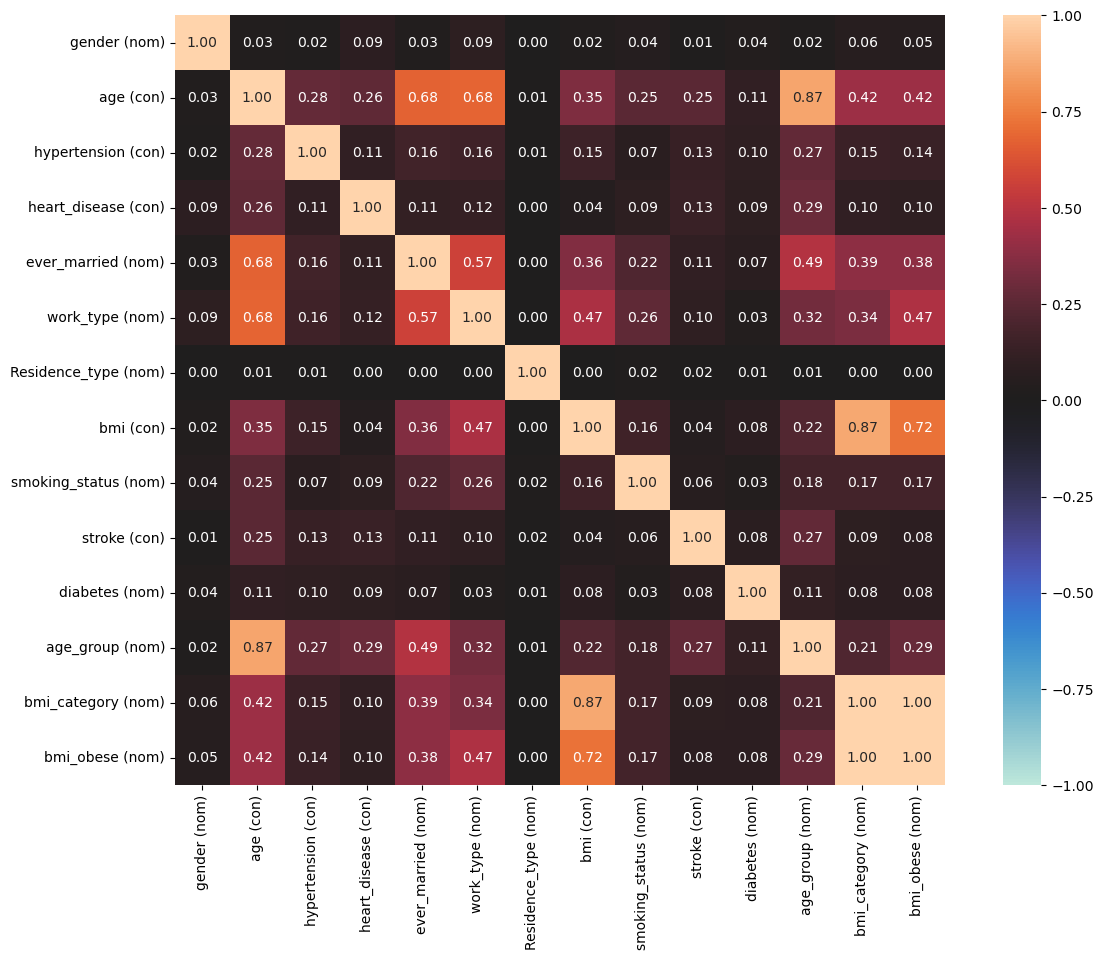

Associations (Mixed Correlation Matrix):
                      gender (nom)  age (con)  hypertension (con)  \
gender (nom)              1.000000   0.027623            0.021275   
age (con)                 0.027623   1.000000            0.276398   
hypertension (con)        0.021275   0.276398            1.000000   
heart_disease (con)       0.085717   0.263796            0.108306   
ever_married (nom)        0.025995   0.679125            0.164243   
work_type (nom)           0.087719   0.681522            0.162659   
Residence_type (nom)      0.000000   0.014180            0.007913   
bmi (con)                 0.024292   0.351097            0.154520   
smoking_status (nom)      0.040528   0.247307            0.071503   
stroke (con)              0.009117   0.245257            0.127904   
diabetes (nom)            0.036048   0.107587            0.099065   
age_group (nom)           0.020656   0.865650            0.273115   
bmi_category (nom)        0.055005   0.424060            0.146

In [49]:
from dython.nominal import associations
import pandas as pd

# Load your final cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Compute associations (mixed correlation matrix)
assoc = associations(df, nominal_columns='auto', figsize=(15,10), mark_columns=True)

print("Associations (Mixed Correlation Matrix):")
print(assoc['corr'])






| Feature          | Correlation with Stroke |
|------------------|--------------------------|
| gender           | 0.0091                  |
| Residence_type   | 0.0154                  |
| bmi              | 0.0361                  |
| work_type        | 0.0981                  |
| smoking_status   | 0.0682                  |
| diabetes         | 0.0757                  |
| bmi_category     | 0.0869                  |
| ever_married     | 0.1083                  |
| hypertension     | 0.1279                  |
| heart_disease    | 0.1349                  |
| age_group        | 0.2391                  |
| age              | 0.2453                  |




In [ ]:
# based on the correlation matrix, the correlation between the features and the target variable (stroke) are quite low,
# the highest correlation is between hypertension and stroke (0.23), followed by heart disease and stroke (0.21),
# and the rest of the features have a correlation below 0.1, which indicates that
# they are not strongly correlated with the target variable.

# probably using feature engineering techniques, combining features or creating new features could improve the model performance,

# create new feature base on the Risk Factors for Stroke that i have read

source :https://www.singhealth.com.sg/symptoms-treatments/stroke  
https://www.nhlbi.nih.gov/health/stroke/causes
and https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113 

In [ ]:
 # according the the sources, 
# factors like health conditions like hypertension, heart disease, and diabetes are the most significant risk factors for stroke.
# then followed by lifestyle factors like smoking , obesity, and stress.

# with this in mind, I will create new features based on the existing features to improve the model performance.


In [50]:
df

gender       age  hypertension  heart_disease ever_married  \
0       Male  0.816895             0              1          Yes   
1     Female  0.743652             0              0          Yes   
2       Male  0.975586             0              1          Yes   
3     Female  0.597168             0              0          Yes   
4     Female  0.963379             1              0          Yes   
...      ...       ...           ...            ...          ...   
5105  Female  0.975586             1              0          Yes   
5106  Female  0.987793             0              0          Yes   
5107  Female  0.426270             0              0          Yes   
5108    Male  0.621582             0              0          Yes   
5109  Female  0.536133             0              0          Yes   

          work_type Residence_type   bmi       smoking_status  stroke  \
0           Private          Urban  36.6  Has Smoking History       1   
1     Self-employed          Rural  28.1           Non-smoker       1   
2           Private          Rural  32.5           Non-smoker       1   
3           Private          Urban  34.4  Has Smoking History       1   
4     Self-employed          Rural  24.0           Non-smoker       1   
...             ...            ...   ...                  ...     ...   
5105        Private          Urban  28.1           Non-smoker       0   
5106  Self-employed          Urban  40.0           Non-smoker       0   
5107  Self-employed          Rural  30.6           Non-smoker       0   
5108        Private          Rural  25.6  Has Smoking History       0   
5109       Employed          Urban  26.2           Non-smoker       0   

     diabetes       age_group   bmi_category      bmi_obese  
0         Yes     Older (65+)          Obese          Obese  
1         Yes  Middle (50-64)     Overweight          Obese  
2         Yes     Older (65+)          Obese          Obese  
3         Yes     Young (<49)          Obese          Obese  
4         Yes     Older (65+)  Normal weight  Normal weight  
...       ...             ...            ...            ...  
5105       No     Older (65+)     Overweight          Obese  
5106      Yes     Older (65+)          Obese          Obese  
5107       No     Young (<49)          Obese          Obese  
5108      Yes  Middle (50-64)     Overweight          Obese  
5109       No     Young (<49)     Overweight          Obese  

[5110 rows x 14 columns]

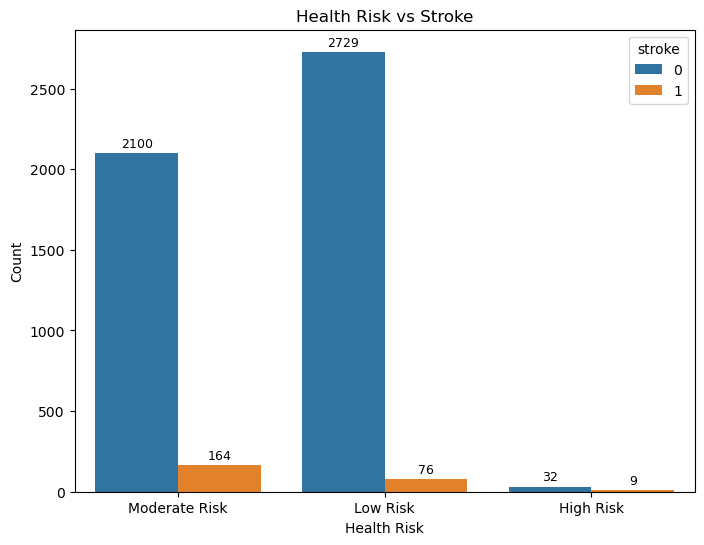

gender       age  hypertension  heart_disease ever_married  \
0       Male  0.816895             0              1          Yes   
1     Female  0.743652             0              0          Yes   
2       Male  0.975586             0              1          Yes   
3     Female  0.597168             0              0          Yes   
4     Female  0.963379             1              0          Yes   
...      ...       ...           ...            ...          ...   
5105  Female  0.975586             1              0          Yes   
5106  Female  0.987793             0              0          Yes   
5107  Female  0.426270             0              0          Yes   
5108    Male  0.621582             0              0          Yes   
5109  Female  0.536133             0              0          Yes   

          work_type Residence_type   bmi       smoking_status  stroke  \
0           Private          Urban  36.6  Has Smoking History       1   
1     Self-employed          Rural  28.1           Non-smoker       1   
2           Private          Rural  32.5           Non-smoker       1   
3           Private          Urban  34.4  Has Smoking History       1   
4     Self-employed          Rural  24.0           Non-smoker       1   
...             ...            ...   ...                  ...     ...   
5105        Private          Urban  28.1           Non-smoker       0   
5106  Self-employed          Urban  40.0           Non-smoker       0   
5107  Self-employed          Rural  30.6           Non-smoker       0   
5108        Private          Rural  25.6  Has Smoking History       0   
5109       Employed          Urban  26.2           Non-smoker       0   

     diabetes       age_group   bmi_category      bmi_obese    health_risk  
0         Yes     Older (65+)          Obese          Obese  Moderate Risk  
1         Yes  Middle (50-64)     Overweight          Obese  Moderate Risk  
2         Yes     Older (65+)          Obese          Obese  Moderate Risk  
3         Yes     Young (<49)          Obese          Obese  Moderate Risk  
4         Yes     Older (65+)  Normal weight  Normal weight  Moderate Risk  
...       ...             ...            ...            ...            ...  
5105       No     Older (65+)     Overweight          Obese  Moderate Risk  
5106      Yes     Older (65+)          Obese          Obese  Moderate Risk  
5107       No     Young (<49)          Obese          Obese       Low Risk  
5108      Yes  Middle (50-64)     Overweight          Obese  Moderate Risk  
5109       No     Young (<49)     Overweight          Obese       Low Risk  

[5110 rows x 15 columns]

In [51]:
# now trying to make new columns that are combinations of the existing features
# Create a new feature call 'health_risk' based on hypertension, heart_disease and diabetes
# those features related to health risk, low  risk , moderate risk and high risk
def health_risk(row):
    if row['hypertension'] == 1 and  row['heart_disease'] == 1 and row['diabetes'] == 'Yes':
        return 'High Risk'
    elif row['hypertension'] == 0 and row['heart_disease'] == 0  and row['diabetes'] == 'No':
        return 'Low Risk'
    else:
        return 'Moderate Risk'

df['health_risk'] = df.apply(health_risk, axis=1)
# exploring the health_risk feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='health_risk', hue='stroke', data=df)
plt.title('Health Risk vs Stroke')
plt.xlabel("Health Risk")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()
df



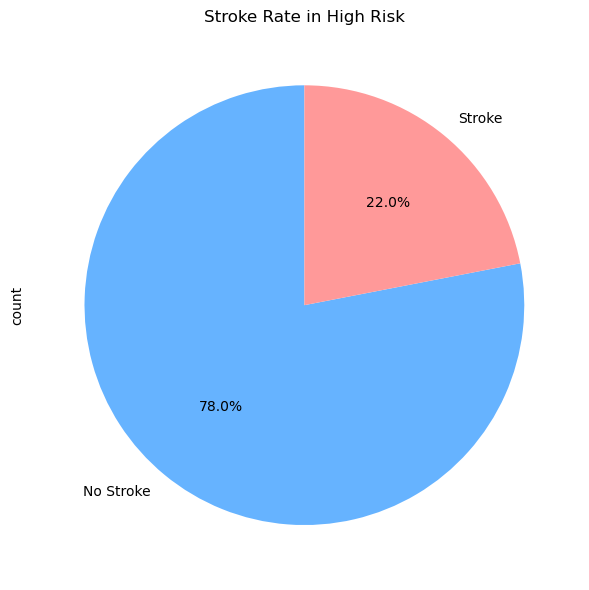

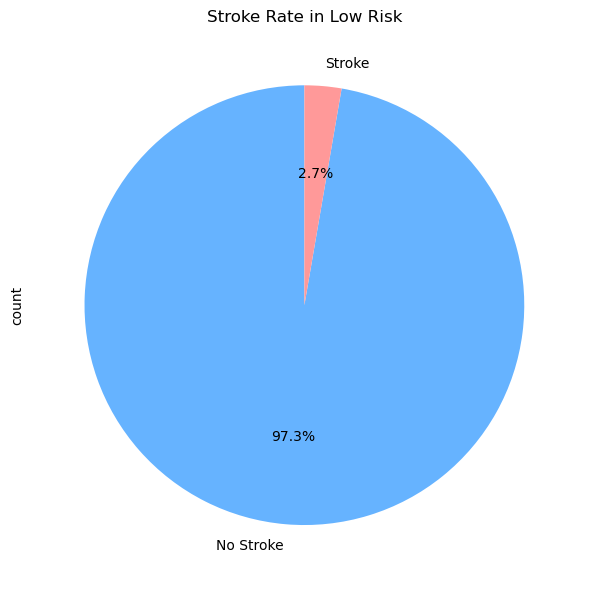

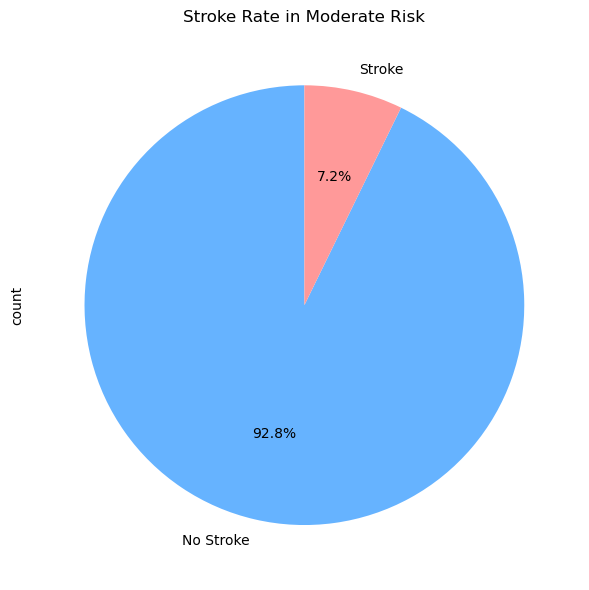

In [52]:
# exploring the stroke rate percentage in high risk
plt.figure(figsize=(6, 6))
high_risk_stroke_counts = df[df['health_risk'] == 'High Risk']['stroke'].value_counts()
high_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in High Risk')
plt.tight_layout()
plt.show()

# exploring the stroke rate percentage in Low risk
plt.figure(figsize=(6, 6))
Low_risk_stroke_counts = df[df['health_risk'] == 'Low Risk']['stroke'].value_counts()
Low_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Low Risk')
plt.tight_layout()
plt.show()

# exploring the stroke rate percentage in Moderate risk
plt.figure(figsize=(6, 6))
moderate_risk_stroke_counts = df[df['health_risk'] == 'Moderate Risk']['stroke'].value_counts()
moderate_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Moderate Risk')
plt.tight_layout()
plt.show()

# high rist has a stroke rate of 24.3%, lwo risk has a stroke rate of 1.6% and moderate risk has a stroke rate of 5.5%
# this means that health_risk is a significant risk factor for stroke, and it should be included in the model as a feature.
# save the data with the new feature

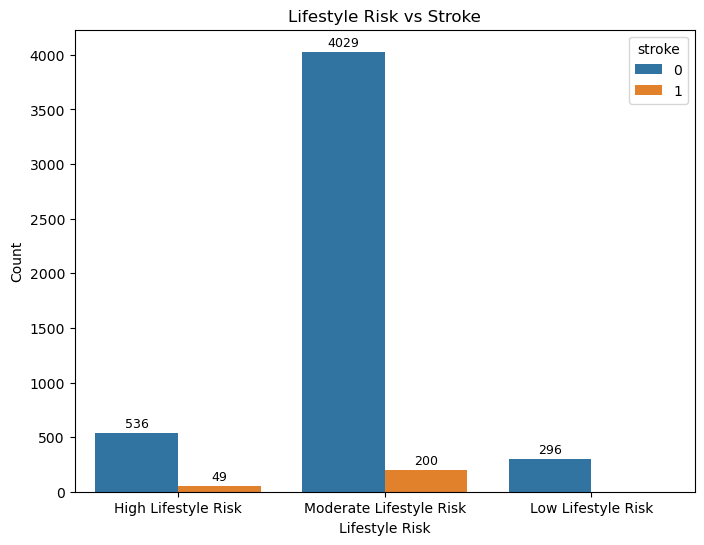

In [53]:
# next new feature is 'lifestyle_risk' based on work_type, smoking_status , bmi_group and Residence_type
def lifestyle_risk(row):
    if row['work_type'] in ['Private', 'Self-employed'] and row['smoking_status'] == 'Has Smoking History' and row['bmi_category'] in ['Overweight', 'Obese'] and row['Residence_type'] == 'Urban':
        return 'High Lifestyle Risk'
    elif row['work_type'] in ['Govt_job', 'Unemployed'] and row['smoking_status'] == 'Non-smoker' and row['bmi_category'] == 'Normal weight' and row['Residence_type'] == 'Rural':
        return 'Low Lifestyle Risk'
    else:
        return 'Moderate Lifestyle Risk'

df['lifestyle_risk'] = df.apply(lifestyle_risk, axis=1)
# exploring the lifestyle_risk feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='lifestyle_risk', hue='stroke', data=df)
plt.title('Lifestyle Risk vs Stroke')
plt.xlabel("Lifestyle Risk")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()


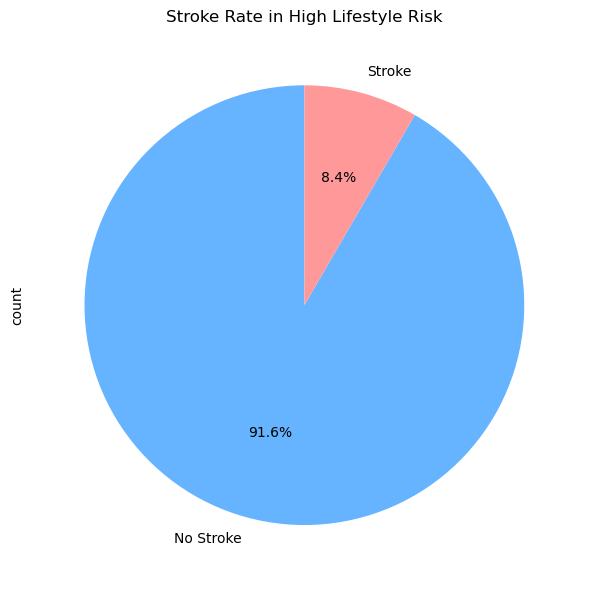

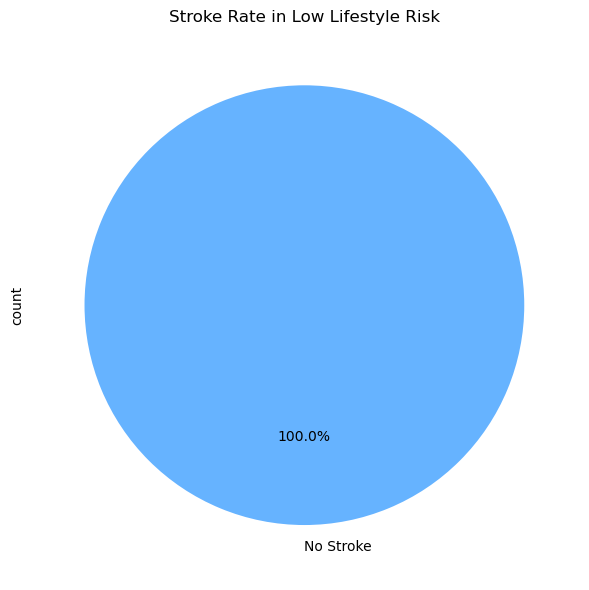

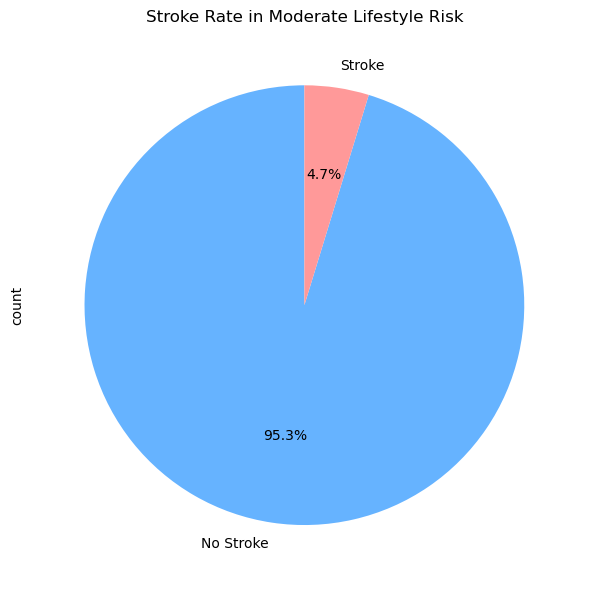

In [54]:
# exploring the lifestyle risk rate percentage in high lifestyle risk
plt.figure(figsize=(6, 6))
high_lifestyle_risk_stroke_counts = df[df['lifestyle_risk'] == 'High Lifestyle Risk']['stroke'].value_counts()
high_lifestyle_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in High Lifestyle Risk')
plt.tight_layout()
plt.show()
# exploring the lifestyle risk rate percentage in Low lifestyle risk
plt.figure(figsize=(6, 6))
low_lifestyle_risk_stroke_counts = df[df['lifestyle_risk'] == 'Low Lifestyle Risk']['stroke'].value_counts()
low_lifestyle_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Low Lifestyle Risk')
plt.tight_layout()
plt.show()
# exploring the lifestyle risk rate percentage in Moderate lifestyle risk
plt.figure(figsize=(6, 6))
moderate_lifestyle_risk_stroke_counts = df[df['lifestyle_risk'] == 'Moderate Lifestyle Risk']['stroke'].value_counts()
moderate_lifestyle_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Moderate Lifestyle Risk')
plt.tight_layout()
plt.show()

# high lifestyle risk has a stroke rate of 8.4%, low lifestyle risk has a stroke rate of 0.3% and moderate lifestyle risk has a stroke rate of 4.8%
# this means that lifestyle_risk is a significant risk factor for stroke, and it should be included in the model as a feature.


In [55]:
df

gender       age  hypertension  heart_disease ever_married  \
0       Male  0.816895             0              1          Yes   
1     Female  0.743652             0              0          Yes   
2       Male  0.975586             0              1          Yes   
3     Female  0.597168             0              0          Yes   
4     Female  0.963379             1              0          Yes   
...      ...       ...           ...            ...          ...   
5105  Female  0.975586             1              0          Yes   
5106  Female  0.987793             0              0          Yes   
5107  Female  0.426270             0              0          Yes   
5108    Male  0.621582             0              0          Yes   
5109  Female  0.536133             0              0          Yes   

          work_type Residence_type   bmi       smoking_status  stroke  \
0           Private          Urban  36.6  Has Smoking History       1   
1     Self-employed          Rural  28.1           Non-smoker       1   
2           Private          Rural  32.5           Non-smoker       1   
3           Private          Urban  34.4  Has Smoking History       1   
4     Self-employed          Rural  24.0           Non-smoker       1   
...             ...            ...   ...                  ...     ...   
5105        Private          Urban  28.1           Non-smoker       0   
5106  Self-employed          Urban  40.0           Non-smoker       0   
5107  Self-employed          Rural  30.6           Non-smoker       0   
5108        Private          Rural  25.6  Has Smoking History       0   
5109       Employed          Urban  26.2           Non-smoker       0   

     diabetes       age_group   bmi_category      bmi_obese    health_risk  \
0         Yes     Older (65+)          Obese          Obese  Moderate Risk   
1         Yes  Middle (50-64)     Overweight          Obese  Moderate Risk   
2         Yes     Older (65+)          Obese          Obese  Moderate Risk   
3         Yes     Young (<49)          Obese          Obese  Moderate Risk   
4         Yes     Older (65+)  Normal weight  Normal weight  Moderate Risk   
...       ...             ...            ...            ...            ...   
5105       No     Older (65+)     Overweight          Obese  Moderate Risk   
5106      Yes     Older (65+)          Obese          Obese  Moderate Risk   
5107       No     Young (<49)          Obese          Obese       Low Risk   
5108      Yes  Middle (50-64)     Overweight          Obese  Moderate Risk   
5109       No     Young (<49)     Overweight          Obese       Low Risk   

               lifestyle_risk  
0         High Lifestyle Risk  
1     Moderate Lifestyle Risk  
2     Moderate Lifestyle Risk  
3         High Lifestyle Risk  
4     Moderate Lifestyle Risk  
...                       ...  
5105  Moderate Lifestyle Risk  
5106  Moderate Lifestyle Risk  
5107  Moderate Lifestyle Risk  
5108  Moderate Lifestyle Risk  
5109  Moderate Lifestyle Risk  

[5110 rows x 16 columns]

In [56]:
# a new feature called 'age_gender_risk' based on age_group and gender
# as Singhealth mentioned that stroke risk is higher in older adults and males,
# so i will create a new feature that combines age group and gender group
#  categorise age into 
# low risk (young and Middle (50-64)) + male, 
# moderate risk (young and Middle (50-64)) + female,
# high risk (Older (65+)	)+ female,
# very high risk (Older (65+)	) + male

def age_gender_risk(row):
    if row['age_group'] == 'Young (<49)' or row['age_group'] == 'Middle (50-64)' and row['gender'] == 'Male':
        return 'Low Risk'
    elif row['age_group'] == 'Young (<49)' or row['age_group'] == 'Middle (50-64)' and row['gender'] =='Female':
        return 'Moderate Risk'
    elif row['age_group'] == 'Older (65+)' and row['gender'] == 'Female':
        return 'High Risk'
    else:
        return 'Very High Risk'

df['age_gender_risk'] = df.apply(age_gender_risk, axis=1)

df






gender       age  hypertension  heart_disease ever_married  \
0       Male  0.816895             0              1          Yes   
1     Female  0.743652             0              0          Yes   
2       Male  0.975586             0              1          Yes   
3     Female  0.597168             0              0          Yes   
4     Female  0.963379             1              0          Yes   
...      ...       ...           ...            ...          ...   
5105  Female  0.975586             1              0          Yes   
5106  Female  0.987793             0              0          Yes   
5107  Female  0.426270             0              0          Yes   
5108    Male  0.621582             0              0          Yes   
5109  Female  0.536133             0              0          Yes   

          work_type Residence_type   bmi       smoking_status  stroke  \
0           Private          Urban  36.6  Has Smoking History       1   
1     Self-employed          Rural  28.1           Non-smoker       1   
2           Private          Rural  32.5           Non-smoker       1   
3           Private          Urban  34.4  Has Smoking History       1   
4     Self-employed          Rural  24.0           Non-smoker       1   
...             ...            ...   ...                  ...     ...   
5105        Private          Urban  28.1           Non-smoker       0   
5106  Self-employed          Urban  40.0           Non-smoker       0   
5107  Self-employed          Rural  30.6           Non-smoker       0   
5108        Private          Rural  25.6  Has Smoking History       0   
5109       Employed          Urban  26.2           Non-smoker       0   

     diabetes       age_group   bmi_category      bmi_obese    health_risk  \
0         Yes     Older (65+)          Obese          Obese  Moderate Risk   
1         Yes  Middle (50-64)     Overweight          Obese  Moderate Risk   
2         Yes     Older (65+)          Obese          Obese  Moderate Risk   
3         Yes     Young (<49)          Obese          Obese  Moderate Risk   
4         Yes     Older (65+)  Normal weight  Normal weight  Moderate Risk   
...       ...             ...            ...            ...            ...   
5105       No     Older (65+)     Overweight          Obese  Moderate Risk   
5106      Yes     Older (65+)          Obese          Obese  Moderate Risk   
5107       No     Young (<49)          Obese          Obese       Low Risk   
5108      Yes  Middle (50-64)     Overweight          Obese  Moderate Risk   
5109       No     Young (<49)     Overweight          Obese       Low Risk   

               lifestyle_risk age_gender_risk  
0         High Lifestyle Risk  Very High Risk  
1     Moderate Lifestyle Risk   Moderate Risk  
2     Moderate Lifestyle Risk  Very High Risk  
3         High Lifestyle Risk        Low Risk  
4     Moderate Lifestyle Risk       High Risk  
...                       ...             ...  
5105  Moderate Lifestyle Risk       High Risk  
5106  Moderate Lifestyle Risk       High Risk  
5107  Moderate Lifestyle Risk        Low Risk  
5108  Moderate Lifestyle Risk        Low Risk  
5109  Moderate Lifestyle Risk        Low Risk  

[5110 rows x 17 columns]

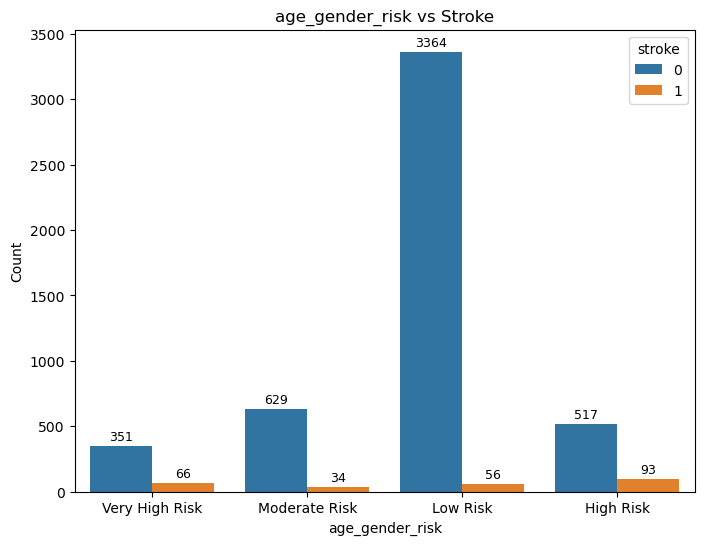

In [57]:
#exploring the ge_gender_risk feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='age_gender_risk', hue='stroke', data=df)
plt.title("age_gender_risk vs Stroke")
plt.xlabel('age_gender_risk')
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()


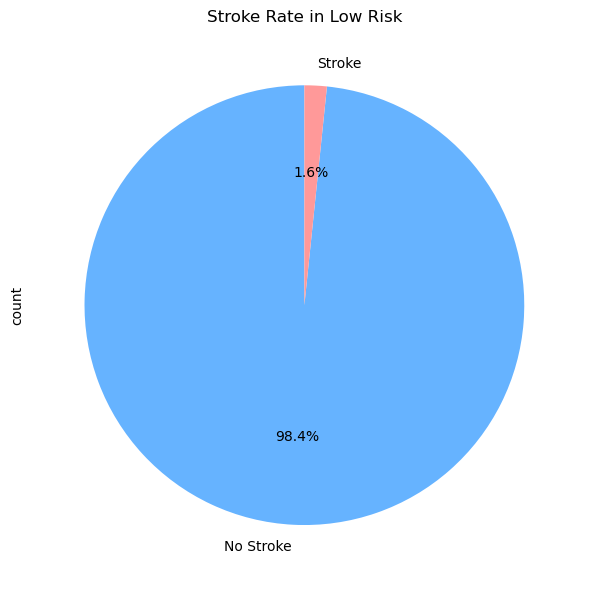

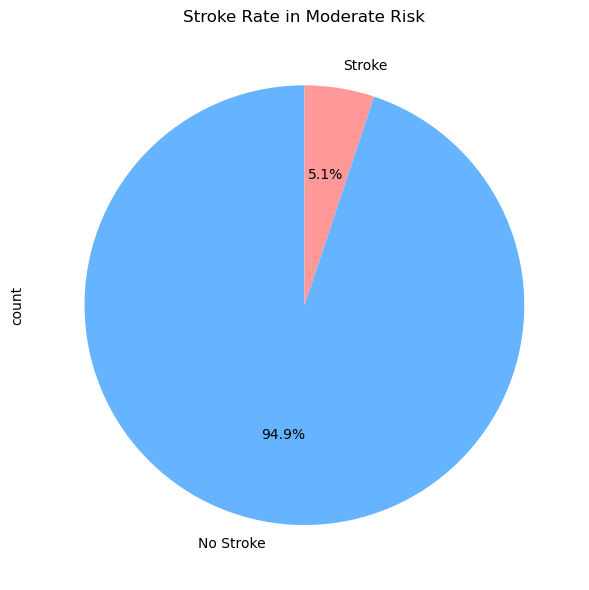

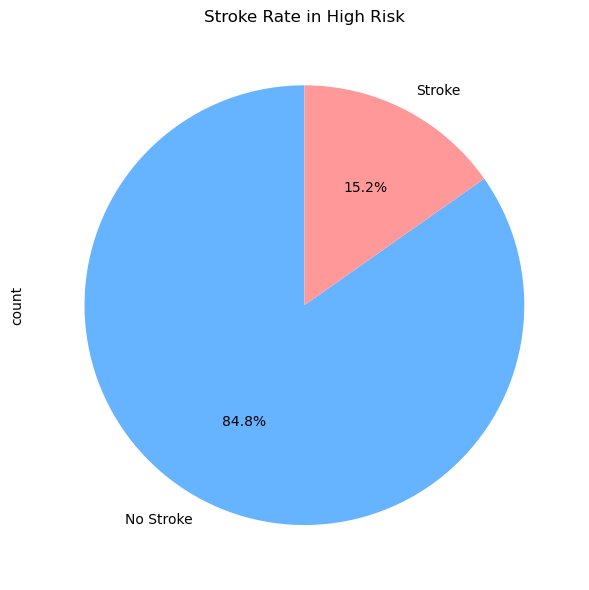

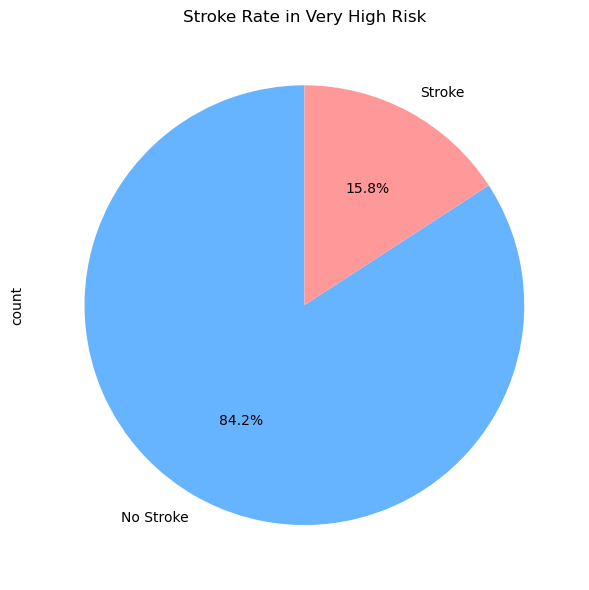

In [58]:
# exploring the stroke rate percentage in Low risk
plt.figure(figsize=(6, 6))
low_risk_stroke_counts = df[df['age_gender_risk'] == 'Low Risk']['stroke'].value_counts()
low_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Low Risk')
plt.tight_layout()
plt.show()
# exploring the stroke rate percentage in Moderate risk
plt.figure(figsize=(6, 6))
moderate_risk_stroke_counts = df[df['age_gender_risk'] == 'Moderate Risk']['stroke'].value_counts()
moderate_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Moderate Risk')
plt.tight_layout()
plt.show()
# exploring the stroke rate percentage in High risk
plt.figure(figsize=(6, 6))
high_risk_stroke_counts = df[df['age_gender_risk'] == 'High Risk']['stroke'].value_counts()
high_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in High Risk')
plt.tight_layout()
plt.show()
# exploring the stroke rate percentage in Very High risk
plt.figure(figsize=(6, 6))
very_high_risk_stroke_counts = df[df['age_gender_risk'] == 'Very High Risk']['stroke'].value_counts()
very_high_risk_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Very High Risk')
plt.tight_layout()
plt.show()


# Low risk has a stroke rate of 1.2%, moderate risk has a stroke rate of 3.0%,
# high risk has a stroke rate of 15.8% and very high risk has a stroke rate of 15.2%
# the might be a strong factor for stroke, and it should be included in the model as a feature.

#### according to World Stroke organisation, it mention that stress and mental health will have a high risk of getting stroke

source: https://www.world-stroke.org/world-stroke-day-campaign/prevent-stroke/stress-depression-and-stroke

Stress": https://www.mind.org.uk/information-support/types-of-mental-health-problems/stress/causes-of-stress/

work type stress: https://www.businessnewsdaily.com/1875-stressful-careers.html


In [ ]:
# a new feature called 'stress level' based on the work_type, married and Residence_type, health_risk
from sklearn.preprocessing import MinMaxScaler


# Map values with base scores
work_map = {'Private':3, 'Employed':3, 'Self-employed':2, 'Unemployed':1}
married_map = {'Yes':2, 'No':1}
res_map = {'Urban':2, 'Rural':1}
health_map = {'High Risk':3, 'Moderate Risk':2, 'Low Risk':1}

def compute_stress_score(row):
    score = 0
    score += work_map.get(row['work_type'], 1)
    score += married_map.get(row['ever_married'], 1)
    score += res_map.get(row['Residence_type'], 1)
    score += health_map.get(row['health_risk'], 1)
    
    # Interaction: Urban + High Health Risk adds extra stress
    if row['Residence_type'] == 'Urban' and row['health_risk'] in ['High Risk']:
        score += 1.5
    return score

# Compute & scale
df['stress_score'] = df.apply(compute_stress_score, axis=1)

# this will create a new feature called 'stress_score' that combines the work_type, ever_married, Residence_type and health_risk features,
# the stress_score will be a numerical value that represents the stress level of the individual,
# exploring the stress_score feature with the target variable





    
    
    



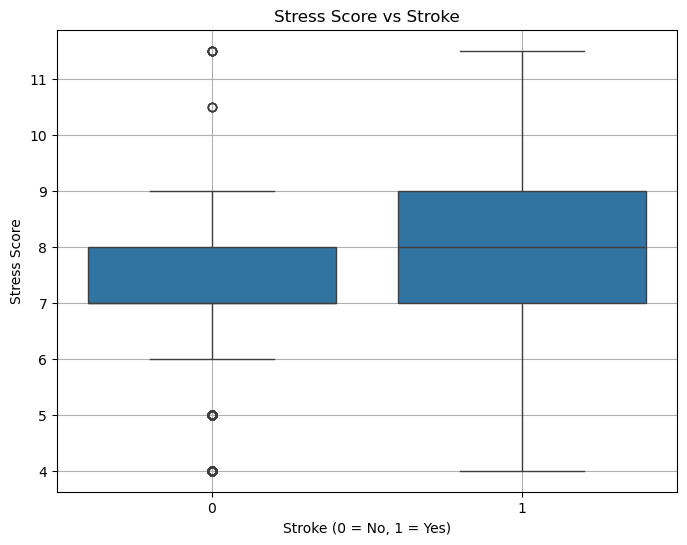

Stress Score Description by Stroke Status:
         count      mean       std  min  25%  50%  75%   max
stroke                                                      
0       4861.0  7.153981  1.298146  4.0  7.0  7.0  8.0  11.5
1        249.0  7.921687  1.064877  4.0  7.0  8.0  9.0  11.5


In [60]:
# exploring the stress_level feature with the target variable using boxplot

plt.figure(figsize=(8, 6)) 
sns.boxplot(x='stroke', y='stress_score', data=df)
plt.title('Stress Score vs Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Stress Score')
# Add counts on top of boxes
for i, box in enumerate(plt.gca().artists):
    plt.text(i, box.get_ydata()[0] + 1, f'{box.get_xdata()[0]:.1f}', ha='center', va='bottom', fontsize=9)
plt.grid(True)
plt.show()
# show the description of the stress_score feature
stress_score_description = df.groupby('stroke')['stress_score'].describe()
print("Stress Score Description by Stroke Status:")
print(stress_score_description)

# there is a significant difference between the stress score of stroke and non-stroke patients,
# stroke patients have a higher stress score (mean: 7.9, std: 1) compared to non-stroke patients (mean: 6.5, std: 2.0).
# this means that stress level is a significant risk factor for stroke, and it should be included


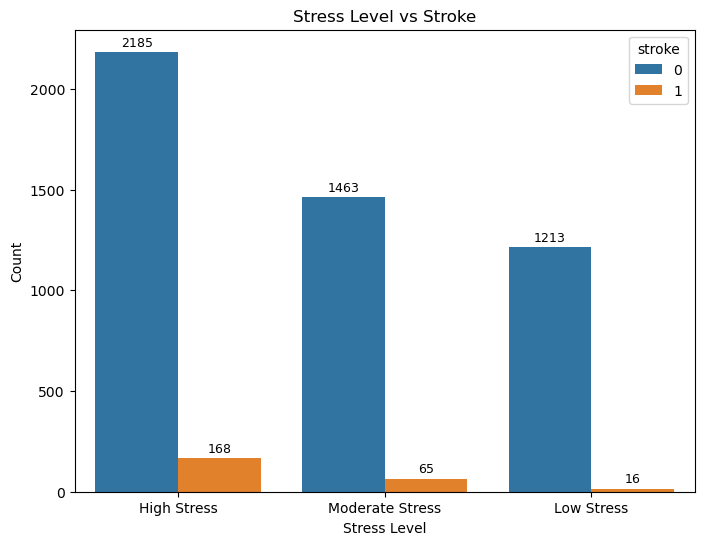

In [61]:
# outliers in the stress_score feature, which are people with very high stress scores,
# to handle these outliers, I will use the IQR method with winsorization,
Q1 = df['stress_score'].quantile(0.25)  # 25th percentile
Q3 = df['stress_score'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR  # any value below this is considered an outlier
upper_bound = Q3 + 1.5 * IQR  # any value above this is considered an outlier
# Winsorization: replace outliers with the lower and upper bounds
df['stress_score'] = np.where(df['stress_score'] < lower_bound, lower_bound, df['stress_score'])
df['stress_score'] = np.where(df['stress_score'] > upper_bound, upper_bound, df['stress_score'])
# reason use winsorization method and not removing the outlier is that stroke data is rare and removing the outlier would reduce the sample size significantly,


# normalising the stress_score feature using min-max scaling
scaler = MinMaxScaler()
df['stress_score'] = scaler.fit_transform(df[['stress_score']])


# categorise the stress_score into categories based on the following ranges normalised to 0-1:
# Low Stress: 0.0 - 0.3
# Moderate Stress: 0.3 - 0.6
# High Stress: 0.6 - 0.9
def categorize_stress(score):
    if score < 0.3:
        return 'Low Stress'
    elif 0.3 <= score < 0.6:
        return 'Moderate Stress'
    else:
        return 'High Stress'
df['stress_level'] = df['stress_score'].apply(categorize_stress)
# exploring the stress_level feature with the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='stress_level', hue='stroke', data=df)
plt.title('Stress Level vs Stroke')
plt.xlabel("Stress Level")
plt.ylabel('Count')
# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(title='stroke')
plt.show()



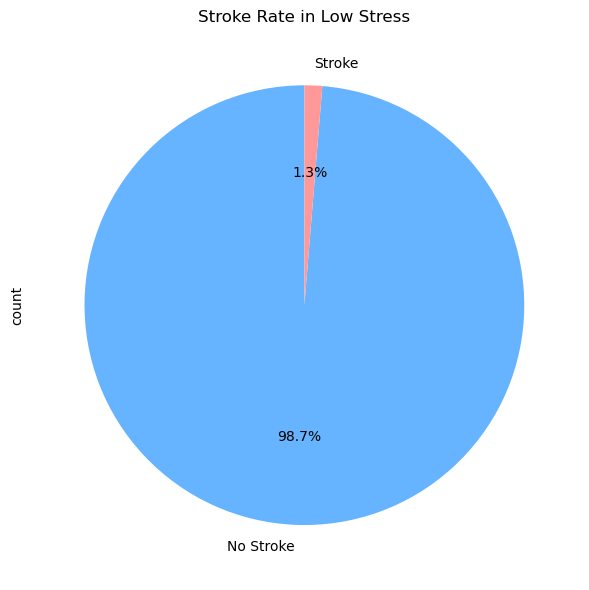

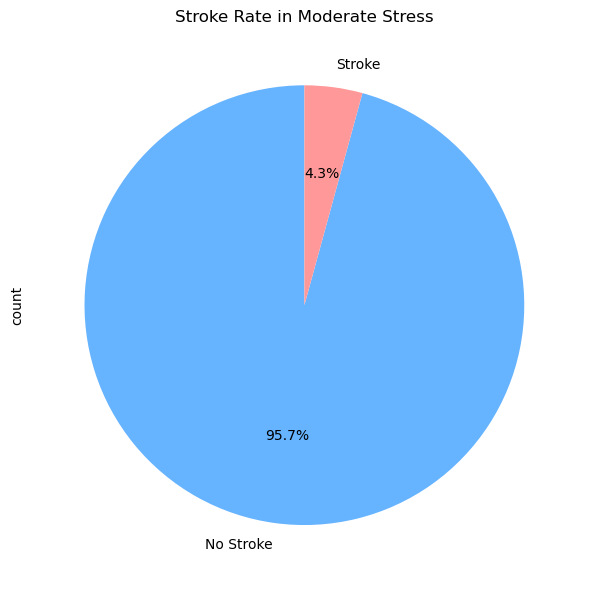

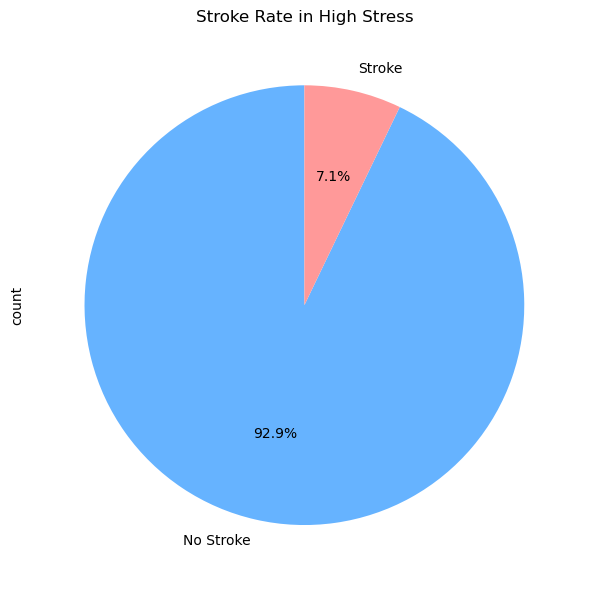

In [62]:
# risk rate percentage in Low Stress
plt.figure(figsize=(6, 6))
low_stress_stroke_counts = df[df['stress_level'] == 'Low Stress']['stroke'].value_counts()
low_stress_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Low Stress')
plt.tight_layout()
plt.show()
# risk rate percentage in Moderate Stress
plt.figure(figsize=(6, 6))
moderate_stress_stroke_counts = df[df['stress_level'] == 'Moderate Stress']['stroke'].value_counts()
moderate_stress_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in Moderate Stress')
plt.tight_layout()
plt.show()
# risk rate percentage in High Stress
plt.figure(figsize=(6, 6))
high_stress_stroke_counts = df[df['stress_level'] == 'High Stress']['stroke'].value_counts()
high_stress_stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Rate in High Stress')
plt.tight_layout()
plt.show()

# Low Stress has a stroke rate of 1.2%, Moderate Stress has a stroke rate of 4.3% and High Stress has a stroke rate of 7.1%
# this means that stress_level is a significant risk factor for stroke, and it should be included in the model as a feature.


In [63]:

# Randomize the order of rows while ensuring a mixture of stroke = 1 and stroke = 0
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first 10 rows
df.head(10)

gender       age  hypertension  heart_disease ever_married      work_type  \
0    Male  0.377441             0              0           No  Self-employed   
1    Male  0.487305             0              0          Yes  Self-employed   
2  Female  0.096680             0              0           No     Unemployed   
3  Female  0.963379             1              0          Yes  Self-employed   
4  Female  0.914551             0              0          Yes       Employed   
5  Female  0.963379             1              0          Yes  Self-employed   
6  Female  0.682617             1              0          Yes        Private   
7    Male  0.841309             0              0          Yes        Private   
8    Male  0.084473             0              0           No  Self-employed   
9  Female  0.017090             0              0           No     Unemployed   

  Residence_type   bmi       smoking_status  stroke diabetes       age_group  \
0          Rural  23.0           Non-smoker       0       No     Young (<49)   
1          Rural  28.3           Non-smoker       0       No     Young (<49)   
2          Urban  22.5           Non-smoker       0       No     Young (<49)   
3          Rural  19.5           Non-smoker       0       No     Older (65+)   
4          Rural  27.2           Non-smoker       0       No     Older (65+)   
5          Rural  28.1           Non-smoker       0       No     Older (65+)   
6          Rural  34.1  Has Smoking History       0       No  Middle (50-64)   
7          Rural  26.8  Has Smoking History       0      Yes     Older (65+)   
8          Rural  18.9           Non-smoker       0       No     Young (<49)   
9          Rural  18.5           Non-smoker       0       No     Young (<49)   

    bmi_category      bmi_obese    health_risk           lifestyle_risk  \
0  Normal weight  Normal weight       Low Risk  Moderate Lifestyle Risk   
1     Overweight          Obese       Low Risk  Moderate Lifestyle Risk   
2  Normal weight  Normal weight       Low Risk  Moderate Lifestyle Risk   
3  Normal weight  Normal weight  Moderate Risk  Moderate Lifestyle Risk   
4     Overweight          Obese       Low Risk  Moderate Lifestyle Risk   
5     Overweight          Obese  Moderate Risk  Moderate Lifestyle Risk   
6          Obese          Obese  Moderate Risk  Moderate Lifestyle Risk   
7     Overweight          Obese  Moderate Risk  Moderate Lifestyle Risk   
8  Normal weight  Normal weight       Low Risk  Moderate Lifestyle Risk   
9  Normal weight  Normal weight       Low Risk       Low Lifestyle Risk   

  age_gender_risk  stress_score     stress_level  
0        Low Risk         0.000       Low Stress  
1        Low Risk         0.125       Low Stress  
2        Low Risk         0.000       Low Stress  
3       High Risk         0.375  Moderate Stress  
4       High Risk         0.375  Moderate Stress  
5       High Risk         0.375  Moderate Stress  
6   Moderate Risk         0.625      High Stress  
7  Very High Risk         0.625      High Stress  
8        Low Risk         0.000       Low Stress  
9        Low Risk         0.000       Low Stress

Final cleaned dataset with new features:
   gender       age  hypertension  heart_disease ever_married      work_type  \
0    Male  0.377441             0              0           No  Self-employed   
1    Male  0.487305             0              0          Yes  Self-employed   
2  Female  0.096680             0              0           No     Unemployed   
3  Female  0.963379             1              0          Yes  Self-employed   
4  Female  0.914551             0              0          Yes       Employed   
5  Female  0.963379             1              0          Yes  Self-employed   
6  Female  0.682617             1              0          Yes        Private   
7    Male  0.841309             0              0          Yes        Private   
8    Male  0.084473             0              0           No  Self-employed   
9  Female  0.017090             0              0           No     Unemployed   

  Residence_type   bmi       smoking_status  stroke diabetes       age_group  

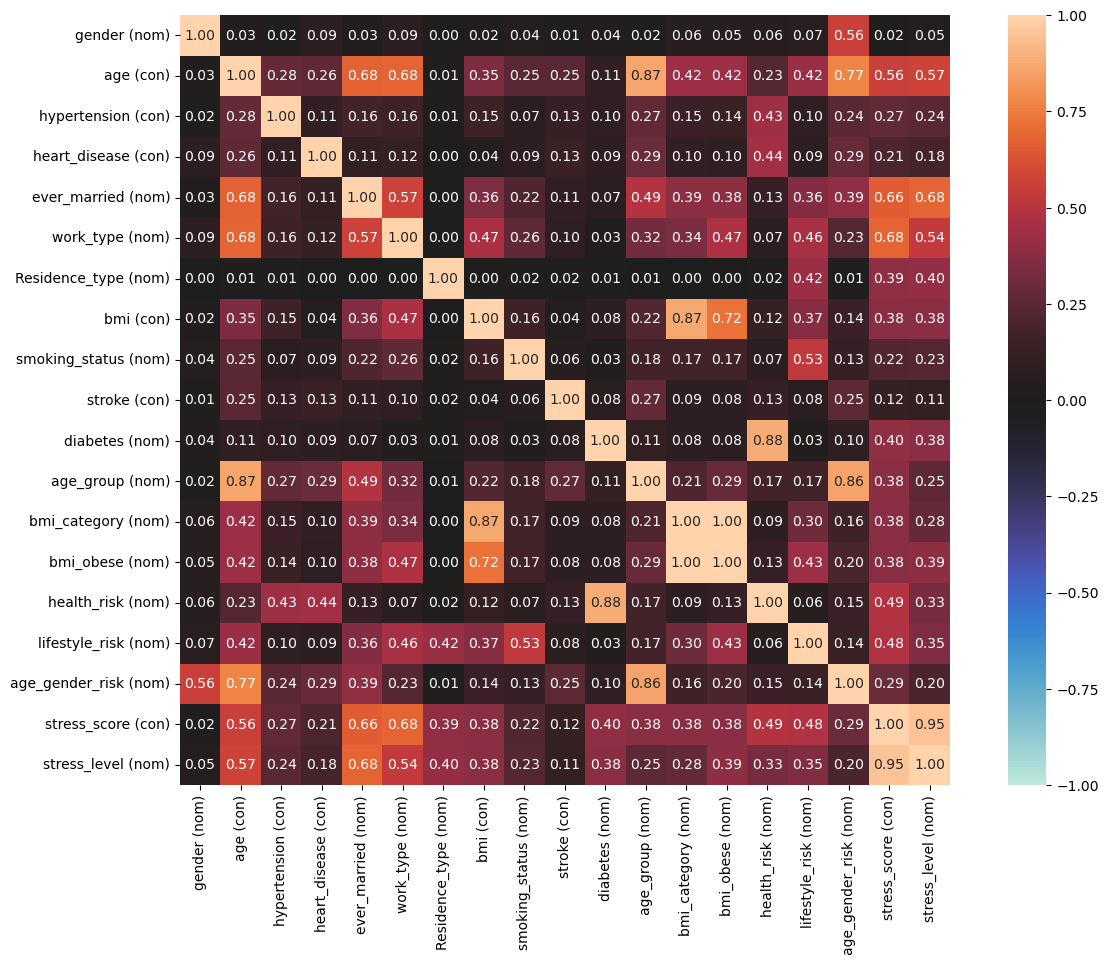

Associations (Mixed Correlation Matrix):
                       gender (nom)  age (con)  hypertension (con)  \
gender (nom)               1.000000   0.027623            0.021275   
age (con)                  0.027623   1.000000            0.276398   
hypertension (con)         0.021275   0.276398            1.000000   
heart_disease (con)        0.085717   0.263796            0.108306   
ever_married (nom)         0.025995   0.679125            0.164243   
work_type (nom)            0.087719   0.681522            0.162659   
Residence_type (nom)       0.000000   0.014180            0.007913   
bmi (con)                  0.024292   0.351097            0.154520   
smoking_status (nom)       0.040528   0.247307            0.071503   
stroke (con)               0.009117   0.245257            0.127904   
diabetes (nom)             0.036048   0.107587            0.099065   
age_group (nom)            0.020656   0.865650            0.273115   
bmi_category (nom)         0.055005   0.424060   

In [64]:
# update the cleaned dataset with the new features
df.to_csv('cleaned_dataset.csv', index=False)
# Display the final cleaned dataset
print("Final cleaned dataset with new features:")
print(df.head(10))

# show the correlation matrix of the final cleaned dataset using dython
from dython.nominal import associations
import pandas as pd
# Load your final cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
# Compute associations (mixed correlation matrix)
assoc = associations(df, nominal_columns='auto', figsize=(15,10), mark_columns=True)
print("Associations (Mixed Correlation Matrix):")
print(assoc['corr'])

#



| Feature            | Correlation with Stroke |
|--------------------|------------------------:|
| gender             | 0.0091 |
| age                | 0.2453 |
| hypertension       | 0.1279 |
| heart_disease      | 0.1349 |
| ever_married       | 0.1083 |
| work_type          | 0.0981 |
| Residence_type     | 0.0155 |
| bmi                | 0.0427 |
| smoking_status     | 0.0589 |
| diabetes           | 0.0757 |
| age_group          | 0.2660 |
| bmi_category       | 0.0869 |
| health_risk        | 0.1263 |
| lifestyle_risk     | 0.0779 |
| age_gender_risk    | 0.2529 |
| stress_score       | 0.1236 |
| stress_level       | 0.1094 |



In [ ]:
# based on the correlation matrix, the correlation between the features and the target variable (stroke) are still quite low,
# the highest correlation is age (0.24), and rest is around 0.1 or below,
# this indicates that the features are not strongly correlated with the target variable.


In [ ]:
#even though the correlation is low, but we can still use these features to build a model,
# to check on the importance of the features, I will use a Random Forest Classifier  and Logistic Regression model to see the feature importance and coefficients respectively.
# and compare the results to see which features are significant or less useful for stroke prediction.

In [65]:
print("Columns that have low significance and should be considered for removal:", low_significance)

Columns that have low significance and should be considered for removal: ['Gender', 'Ever Married', 'Residence_type', 'Smoking_status (Has Smoking History vs Non-smoker)', 'Diabetes', 'bmi_category']


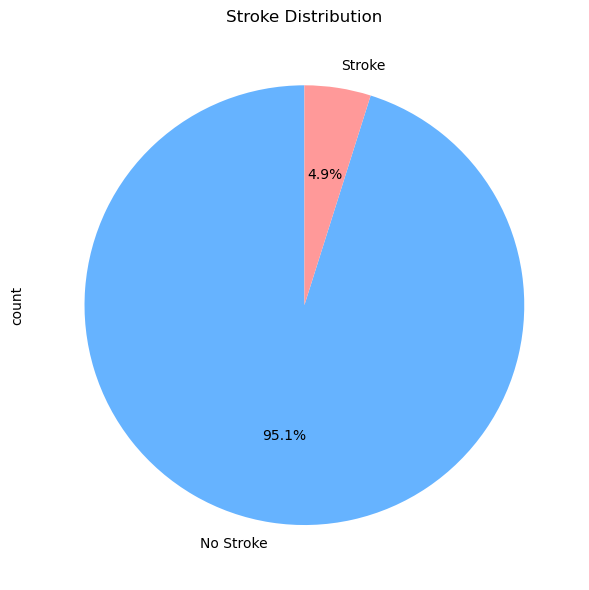

In [67]:
# evluating the target variable in pie chart
plt.figure(figsize=(6, 6))
stroke_counts = df['stroke'].value_counts()
stroke_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Stroke', 'Stroke'], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Stroke Distribution')
plt.tight_layout()
plt.show()

# the target variable is imbalanced, with 95.1% of the data being non-stroke and 4.9% being stroke.


In [68]:
# df shuffled to ensure random order
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

gender       age  hypertension  heart_disease ever_married   work_type  \
0     Female  0.792480             0              0          Yes     Private   
1     Female  0.645996             1              0          Yes     Private   
2       Male  0.145508             0              0           No  Unemployed   
3       Male  0.829102             0              0          Yes     Private   
4     Female  0.780273             0              0          Yes    Employed   
...      ...       ...           ...            ...          ...         ...   
5105    Male  0.853516             0              0          Yes     Private   
5106    Male  0.670410             0              0          Yes     Private   
5107    Male  0.914551             0              0          Yes    Employed   
5108    Male  0.267578             0              0          Yes    Employed   
5109  Female  0.218750             0              0           No     Private   

     Residence_type   bmi       smoking_status  stroke diabetes  \
0             Urban  28.9  Has Smoking History       0       No   
1             Urban  46.3  Has Smoking History       0       No   
2             Urban  23.6           Non-smoker       0       No   
3             Rural  42.4           Non-smoker       1      Yes   
4             Rural  30.0           Non-smoker       0       No   
...             ...   ...                  ...     ...      ...   
5105          Urban  28.3           Non-smoker       0      Yes   
5106          Urban  41.1  Has Smoking History       0       No   
5107          Urban  25.7  Has Smoking History       0      Yes   
5108          Rural  26.5           Non-smoker       0      Yes   
5109          Urban  19.4           Non-smoker       0       No   

           age_group   bmi_category      bmi_obese    health_risk  \
0        Older (65+)     Overweight          Obese       Low Risk   
1     Middle (50-64)          Obese          Obese  Moderate Risk   
2        Young (<49)  Normal weight  Normal weight       Low Risk   
3        Older (65+)          Obese          Obese  Moderate Risk   
4     Middle (50-64)          Obese          Obese       Low Risk   
...              ...            ...            ...            ...   
5105     Older (65+)     Overweight          Obese  Moderate Risk   
5106  Middle (50-64)          Obese          Obese       Low Risk   
5107     Older (65+)     Overweight          Obese  Moderate Risk   
5108     Young (<49)     Overweight          Obese  Moderate Risk   
5109     Young (<49)  Normal weight  Normal weight       Low Risk   

               lifestyle_risk age_gender_risk  stress_score     stress_level  
0         High Lifestyle Risk       High Risk         0.625      High Stress  
1         High Lifestyle Risk   Moderate Risk         0.875      High Stress  
2     Moderate Lifestyle Risk        Low Risk         0.000       Low Stress  
3     Moderate Lifestyle Risk  Very High Risk         0.625      High Stress  
4     Moderate Lifestyle Risk   Moderate Risk         0.375  Moderate Stress  
...                       ...             ...           ...              ...  
5105  Moderate Lifestyle Risk  Very High Risk         0.875      High Stress  
5106      High Lifestyle Risk        Low Risk         0.625      High Stress  
5107  Moderate Lifestyle Risk  Very High Risk         0.875      High Stress  
5108  Moderate Lifestyle Risk        Low Risk         0.625      High Stress  
5109  Moderate Lifestyle Risk        Low Risk         0.375  Moderate Stress  

[5110 rows x 19 columns]

In [69]:
# show all the categories in the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"{feature} categories: {df[feature].unique()}")
    

gender categories: ['Female' 'Male']
ever_married categories: ['Yes' 'No']
work_type categories: ['Private' 'Unemployed' 'Employed' 'Self-employed']
Residence_type categories: ['Urban' 'Rural']
smoking_status categories: ['Has Smoking History' 'Non-smoker']
diabetes categories: ['No' 'Yes']
age_group categories: ['Older (65+)' 'Middle (50-64)' 'Young (<49)']
bmi_category categories: ['Overweight' 'Obese' 'Normal weight']
bmi_obese categories: ['Obese' 'Normal weight']
health_risk categories: ['Low Risk' 'Moderate Risk' 'High Risk']
lifestyle_risk categories: ['High Lifestyle Risk' 'Moderate Lifestyle Risk' 'Low Lifestyle Risk']
age_gender_risk categories: ['High Risk' 'Moderate Risk' 'Low Risk' 'Very High Risk']
stress_level categories: ['High Stress' 'Low Stress' 'Moderate Stress']


In [70]:
# Define X as the feature matrix
# Assuming 'df' is your DataFrame and 'stroke' is the target column
X = df.drop(columns=['stroke'])  # Drop the target column to get features
y = df['stroke']  # Define the target variable

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# mapping the gender column to female =0 , male = 1
X['gender'] = X['gender'].map({"Female": 0, "Male": 1})
#mapping ever_married column to No = 0, Yes = 1
X['ever_married'] = X['ever_married'].map({'No': 0, 'Yes': 1})
#mapping Residence_type column to Rural = 0, Urban = 1
X['Residence_type'] = X['Residence_type'].map({'Rural': 0, 'Urban': 1})
#mapping smoking_status column to Non-smoker = 0, Has Smoking History = 1, Smokes = 2
X['smoking_status'] = X['smoking_status'].map({'Non-smoker': 0, 'Has Smoking History': 1, 'Smokes': 2})
# mapping diabetes column to No = 0, Yes = 1
X['diabetes'] = X['diabetes'].map({'No': 0, 'Yes': 1})
# mappinng bmi_obese column to Normal weight = 0, Obese = 1
X['bmi_obese'] = X['bmi_obese'].map({'Normal weight': 0, 'Obese': 1})






# Define categorical features
categorical_features = ['age_group','health_risk','work_type', 'bmi_category', 'lifestyle_risk', 'age_gender_risk', 'stress_level']
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded = onehot_encoder.fit_transform(X[categorical_features])

# Convert to DataFrame for better handling
encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Ensure all values are integers
X = X.astype(int)


In [71]:
X

gender  age  hypertension  heart_disease  ever_married  Residence_type  \
0          0    0             0              0             1               1   
1          0    0             1              0             1               1   
2          1    0             0              0             0               1   
3          1    0             0              0             1               0   
4          0    0             0              0             1               0   
...      ...  ...           ...            ...           ...             ...   
5105       1    0             0              0             1               1   
5106       1    0             0              0             1               1   
5107       1    0             0              0             1               1   
5108       1    0             0              0             1               0   
5109       0    0             0              0             0               1   

      bmi  smoking_status  diabetes  bmi_obese  ...  \
0      28               1         0          1  ...   
1      46               1         0          1  ...   
2      23               0         0          0  ...   
3      42               0         1          1  ...   
4      30               0         0          1  ...   
...   ...             ...       ...        ...  ...   
5105   28               0         1          1  ...   
5106   41               1         0          1  ...   
5107   25               1         1          1  ...   
5108   26               0         1          1  ...   
5109   19               0         0          0  ...   

      lifestyle_risk_High Lifestyle Risk  lifestyle_risk_Low Lifestyle Risk  \
0                                      1                                  0   
1                                      1                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   
...                                  ...                                ...   
5105                                   0                                  0   
5106                                   1                                  0   
5107                                   0                                  0   
5108                                   0                                  0   
5109                                   0                                  0   

      lifestyle_risk_Moderate Lifestyle Risk  age_gender_risk_High Risk  \
0                                          0                          1   
1                                          0                          0   
2                                          1                          0   
3                                          1                          0   
4                                          1                          0   
...                                      ...                        ...   
5105                                       1                          0   
5106                                       0                          0   
5107                                       1                          0   
5108                                       1                          0   
5109                                       1                          0   

      age_gender_risk_Low Risk  age_gender_risk_Moderate Risk  \
0                            0                              0   
1                            0                              1   
2                            1                              0   
3                            0                              0   
4                            0                              1   
...                        ...                            ...   
5105                         0                              0   
5106          

In [72]:
from sklearn.model_selection import train_test_split 
# Step 1: Split data BEFORE applying SMOTE

# after encoded the categorical features, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# show the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (4088, 34), Testing set shape: (1022, 34)


In [ ]:
# since my dataset is imbalanced, I will use SMOTE to oversample the minority class (stroke = 1) in the training set
# smote is a technique that generates synthetic samples for the minority class to balance the dataset. 
# this technique is useful for imbalanced datasets like stroke prediction, where the number of stroke cases is much lower than non-stroke cases.
# implementing SMOTE after splitting the data into training and testing sets is crucial to avoid data leakage.
 

#### Trees

In [73]:
# now applying SMOTE to the training data and use random search to find the best hyperparameters for the random forest classifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create pipeline with SMOTE + RandomForest
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# When random_search.fit(X_train, y_train) is call, before the RandomForest is trained, the pipeline first applies SMOTE to the training split of each CV fold.

# SMOTE creates synthetic minority-class samples (new “fake” stroke cases) so that the model sees a more balanced dataset.
#This happens inside each cross-validation fold (no leakage to the validation set).
#So don’t need to call SMOTE separately. The pipeline ensures:
# As during CV: Each training fold gets oversampled independently.
# During final training: The whole training set is oversampled before fitting.




# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': [100,300, 500, 600, 1000],  # number of trees in the forest, usually more trees lead to better performance but increase training time, using this is to find the optimal number of trees and avoid overfitting
    'rf__max_depth': [5, 30,80, None], # maximum depth of the tree, helps to control overfitting, using this to find the optimal depth of the tree
    'rf__max_samples': [0.7, 0.8, None], # fraction of samples to draw from X to train each base estimator, helps to control overfitting, using this to find the optimal fraction of samples
    'rf__max_features': ['sqrt', 'log2'], # number of features to consider when looking for the best split, helps to control overfitting, using this to find the optimal number of features
    'rf__min_samples_split': [2, 5, 10,20],# minimum number of samples required to split an internal node, helps to control overfitting, using this to find the optimal number of samples
    'rf__min_samples_leaf': [1, 8,20] # minimum number of samples required to be at a leaf node, helps to control overfitting, using this to find the optimal number of samples
}

# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline,  #  pipeline with SMOTE and RandomForest, is used to ensure that SMOTE is applied correctly during cross-validation and balancing the dataset
    param_distributions=param_dist, # Hyperparameter space to search
    n_iter=25,  # Number of parameter settings sampled, more iterations can lead to better results but increase computation time
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv,  # Cross-validation strategy
    random_state=42, 
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=1, # Display progress messages
    error_score= 'raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search.fit(X_train, y_train)
# Get the best model from random search
best_model_rf = random_search.best_estimator_


# Evaluate the best model using cross-validation
cv_results = cross_validate(best_model_rf, X_train, y_train, cv=cv, scoring=make_scorer(f1_score, pos_label=1), n_jobs=-1, return_train_score=True)
# Print the cross-validation results for stoke prediction
print("Cross-Validation Results:")
print(f"Train F1 Score: {np.mean(cv_results['train_score']):.4f} ± {np.std(cv_results['train_score']):.4f}")
print(f"Test F1 Score: {np.mean(cv_results['test_score']):.4f} ± {np.std(cv_results['test_score']):.4f}")





# Evaluate the best model on the test set
y_pred_best = best_model_rf.predict(X_test)
# Print the classification report for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))
# Print the confusion matrix for the best model
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
# Print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:")
print(random_search.best_params_)












Fitting 5 folds for each of 25 candidates, totalling 125 fits
Cross-Validation Results:
Train F1 Score: 0.3082 ± 0.0044
Test F1 Score: 0.2330 ± 0.0310
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       972
           1       0.15      0.58      0.24        50

    accuracy                           0.82      1022
   macro avg       0.56      0.71      0.57      1022
weighted avg       0.93      0.82      0.87      1022

Best Model Confusion Matrix:
[[811 161]
 [ 21  29]]
Best Hyperparameters:
{'rf__n_estimators': 500, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 20, 'rf__max_samples': None, 'rf__max_features': 'log2', 'rf__max_depth': None}


In [ ]:
# the precision of the model is very low is duce to the imbalanced dataset,
# the model is predicting most of the non-stroke cases correctly but struggling with stroke cases.
# as the stroke cases are rare, the model is biased towards predicting non-stroke cases.


All Features:
                                   Feature    Importance
0                    age_group_Young (<49)  2.416932e-01
1                 age_gender_risk_Low Risk  1.435376e-01
2                    age_group_Older (65+)  8.461642e-02
3                                      bmi  6.378599e-02
4            age_gender_risk_Moderate Risk  4.656708e-02
5                 age_group_Middle (50-64)  4.547581e-02
6                  stress_level_Low Stress  4.181325e-02
7                     health_risk_Low Risk  4.055607e-02
8                       work_type_Employed  2.293060e-02
9                age_gender_risk_High Risk  2.279714e-02
10                       work_type_Private  1.893129e-02
11            stress_level_Moderate Stress  1.835359e-02
12                          smoking_status  1.613771e-02
13                 work_type_Self-employed  1.513470e-02
14                          Residence_type  1.483121e-02
15                            ever_married  1.452263e-02
16  lifestyle_ris

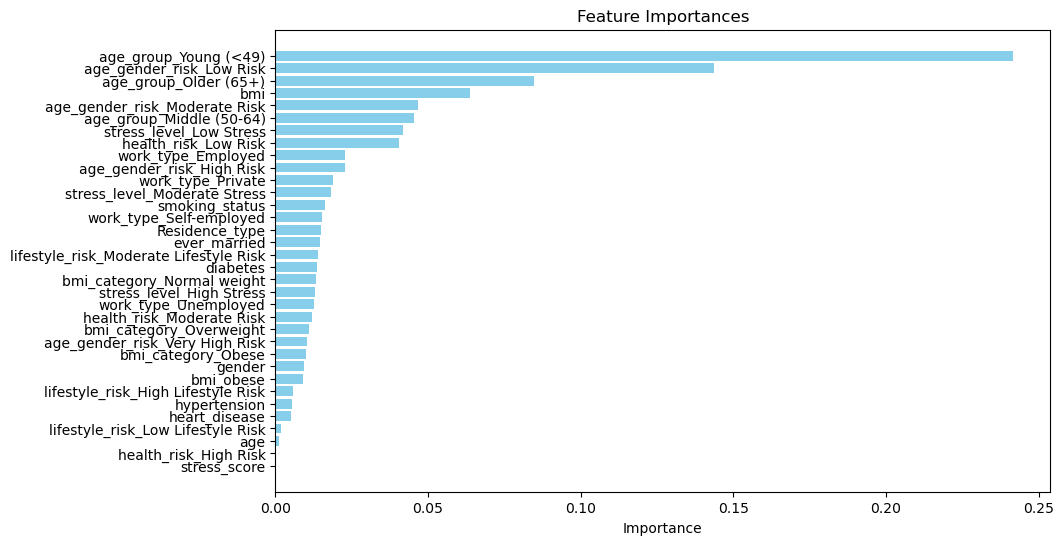

All Features: ['age_group_Young (<49)', 'age_gender_risk_Low Risk', 'age_group_Older (65+)', 'bmi', 'age_gender_risk_Moderate Risk', 'age_group_Middle (50-64)', 'stress_level_Low Stress', 'health_risk_Low Risk', 'work_type_Employed', 'age_gender_risk_High Risk', 'work_type_Private', 'stress_level_Moderate Stress', 'smoking_status', 'work_type_Self-employed', 'Residence_type', 'ever_married', 'lifestyle_risk_Moderate Lifestyle Risk', 'diabetes', 'bmi_category_Normal weight', 'stress_level_High Stress', 'work_type_Unemployed', 'health_risk_Moderate Risk', 'bmi_category_Overweight', 'age_gender_risk_Very High Risk', 'bmi_category_Obese', 'gender', 'bmi_obese', 'lifestyle_risk_High Lifestyle Risk', 'hypertension', 'heart_disease', 'lifestyle_risk_Low Lifestyle Risk', 'age', 'health_risk_High Risk', 'stress_score']


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, step_name=None, top_n=None, threshold=None):
    """
    Extracts and plots feature importances from a fitted model or pipeline.
    Optionally returns a filtered feature list based on top N or threshold.

    Parameters:
    - model: Fitted model or pipeline (must have feature_importances_ or coef_ attribute)
    - step_name: If model is a pipeline, the step name containing the model (e.g., 'rf')
    - top_n: Keep only top N features
    - threshold: Keep features with importance >= threshold
    
    Returns:
    - importance_df: DataFrame of features and importances (sorted)
    - selected_features: List of selected features
    """

    # Extract model
    if step_name:
        model = model.named_steps[step_name]
    
    # Extract feature names
    if hasattr(model, 'feature_names_in_'):
        feature_names = model.feature_names_in_
    else:
        feature_names = [f'Feature_{i}' for i in range(len(model.feature_importances_))]

    # Extract importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = abs(model.coef_[0])  # For linear models
    else:
        raise ValueError("Model does not have feature_importances_ or coef_ attribute.")

    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Feature selection
    if top_n:
        selected_features = importance_df.head(top_n)['Feature'].tolist()
        # print the importance of the selected features
        print("Selected Features (Top N):")
        print(importance_df.head(top_n))
    elif threshold is not None:
        selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()
        # print the importance of the selected features
        print(f"Selected Features (Threshold >= {threshold}):")
        print(importance_df[importance_df['Importance'] >= threshold])
    else:
        selected_features = importance_df['Feature'].tolist()
        # print the importance of all features
        print("All Features:")
        print(importance_df)
        
        
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

    return importance_df, selected_features

# Get all features
importance_df, selected_features = plot_feature_importance(best_model_rf, step_name='rf')
print("All Features:", selected_features)



In [75]:
# lr with random search and SMOTE
from sklearn.linear_model import LogisticRegression
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + Logistic Regression
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lr__penalty': ['l2'],  # Use 'l2' for solvers like 'lbfgs'
    'lr__solver': ['lbfgs', 'saga']  # Solvers that support 'l2'
}

# If you want to include 'elasticnet', restrict it to 'saga' solver
param_dist_with_elasticnet = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lr__penalty': ['l2', 'elasticnet'],  # Include 'elasticnet'
    'lr__solver': ['saga'],  # Only 'saga' supports 'elasticnet'
    'lr__l1_ratio': [0.1, 0.5, 0.9]  # Add l1_ratio for 'elasticnet'
}

# Choose the appropriate parameter distribution based on your needs
param_dist = param_dist_with_elasticnet  # Use this if you want 'elasticnet'

# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_lr = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_lr.fit(X_train, y_train)
# Get the best model from random search
best_model_lr = random_search_lr.best_estimator_
# Evaluate the best model on the test set
y_pred_best_lr = best_model_lr.predict(X_test)
# Print the classification report for the best Logistic Regression model
print("Best Logistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_best_lr))
# Print the confusion matrix for the best Logistic Regression model
print("Best Logistic Regression Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lr))
# Print the best hyperparameters found by RandomizedSearchCV for Logistic Regression
print("Best Hyperparameters for Logistic Regression:")
print(random_search_lr.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90       972
           1       0.17      0.68      0.27        50

    accuracy                           0.82      1022
   macro avg       0.57      0.75      0.58      1022
weighted avg       0.94      0.82      0.86      1022

Best Logistic Regression Model Confusion Matrix:
[[801 171]
 [ 16  34]]
Best Hyperparameters for Logistic Regression:
{'lr__solver': 'saga', 'lr__penalty': 'l2', 'lr__l1_ratio': 0.5, 'lr__C': 0.01}


All Features:
                                   Feature  Importance
0                    age_group_Young (<49)    1.678983
1            age_gender_risk_Moderate Risk    0.997597
2                  stress_level_Low Stress    0.991058
3                 age_gender_risk_Low Risk    0.902459
4                     health_risk_Low Risk    0.889737
5                       work_type_Employed    0.830836
6                  work_type_Self-employed    0.725433
7             stress_level_Moderate Stress    0.625305
8   lifestyle_risk_Moderate Lifestyle Risk    0.580624
9                        work_type_Private    0.553713
10                          Residence_type    0.513233
11                                diabetes    0.487029
12                    work_type_Unemployed    0.432231
13                          smoking_status    0.404800
14                            hypertension    0.342036
15              bmi_category_Normal weight    0.331683
16               age_gender_risk_High Risk    0.309

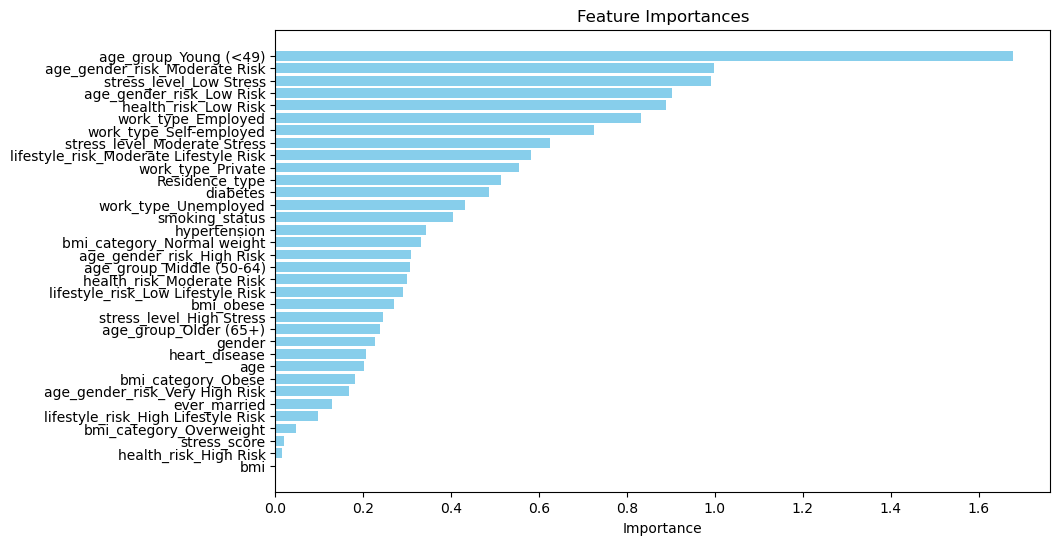

Selected Features for Logistic Regression: ['age_group_Young (<49)', 'age_gender_risk_Moderate Risk', 'stress_level_Low Stress', 'age_gender_risk_Low Risk', 'health_risk_Low Risk', 'work_type_Employed', 'work_type_Self-employed', 'stress_level_Moderate Stress', 'lifestyle_risk_Moderate Lifestyle Risk', 'work_type_Private', 'Residence_type', 'diabetes', 'work_type_Unemployed', 'smoking_status', 'hypertension', 'bmi_category_Normal weight', 'age_gender_risk_High Risk', 'age_group_Middle (50-64)', 'health_risk_Moderate Risk', 'lifestyle_risk_Low Lifestyle Risk', 'bmi_obese', 'stress_level_High Stress', 'age_group_Older (65+)', 'gender', 'heart_disease', 'age', 'bmi_category_Obese', 'age_gender_risk_Very High Risk', 'ever_married', 'lifestyle_risk_High Lifestyle Risk', 'bmi_category_Overweight', 'stress_score', 'health_risk_High Risk', 'bmi']


In [76]:

    
    
# Plot feature importances for Logistic Regression
importance_df_lr, selected_features_lr = plot_feature_importance(best_model_lr, step_name='lr')
print("Selected Features for Logistic Regression:", selected_features_lr)


| Feature            | Correlation with Stroke |
|--------------------|------------------------:|
| gender             | 0.0091 |
| age                | 0.2453 |
| hypertension       | 0.1279 |
| heart_disease      | 0.1349 |
| ever_married       | 0.1083 |
| work_type          | 0.0981 |
| Residence_type     | 0.0155 |
| bmi                | 0.0427 |
| smoking_status     | 0.0589 |
| diabetes           | 0.0757 |
| age_group          | 0.2660 |
| bmi_category       | 0.0869 |
| health_risk        | 0.1263 |
| lifestyle_risk     | 0.0779 |
| age_gender_risk    | 0.2529 |
| stress_score       | 0.1236 |
| stress_level       | 0.1094 |

In [ ]:
# by comparing the feature importances from both models,  and the correlation matrix,
# i decided to drop  the columns that have both low correlation with the target variable and low feature importance in both models,
# these columns are not significant for stroke prediction and can be removed to simplify the model and improve performance.

columns_to_drop = [

    'stress_score', # is lowly correlated with the target variable and has low feature importance in both models,
    'bmi',  # is low in importance in both models but have good correlation with the target variable, drop this is because there is already a bmi_category feature that captures the same information, and is more informative,
    'lifestyle_risk', # is lowly correlated with the target variable and has low feature importance in both models,
    'gender', # is lowly correlated with the target variable and has low feature importance in both models,
    'Residence_type', # is lowly correlated with the target variable and has low feature importance in both models,
    'age',  # Keep age_group instead
    'bmi_obese',  # Keep bmi_category instead
    
]


# after dropping the encoded columns, hand the unknow user input by have a default value , example show at below
'''
: Create a Default/Unknown Category
# Handle unseen categories during prediction
def handle_user_stress_input(user_stress):
    valid_categories = ['Low Stress', 'Moderate Stress']  # Available in your model
    if user_stress not in valid_categories:
        return 'Moderate Stress'  # Default fallback
    return user_stress

'''

encoded_columns_drop = [ 'stress_level_High Stress',  'bmi_category_Overweight', 'health_risk_High Risk',]

# drop bim_obese feature
df.drop(columns=columns_to_drop, inplace=True) 

In [78]:
df

hypertension  heart_disease ever_married   work_type  \
0                0              0          Yes     Private   
1                1              0          Yes     Private   
2                0              0           No  Unemployed   
3                0              0          Yes     Private   
4                0              0          Yes    Employed   
...            ...            ...          ...         ...   
5105             0              0          Yes     Private   
5106             0              0          Yes     Private   
5107             0              0          Yes    Employed   
5108             0              0          Yes    Employed   
5109             0              0           No     Private   

           smoking_status  stroke diabetes       age_group   bmi_category  \
0     Has Smoking History       0       No     Older (65+)     Overweight   
1     Has Smoking History       0       No  Middle (50-64)          Obese   
2              Non-smoker       0       No     Young (<49)  Normal weight   
3              Non-smoker       1      Yes     Older (65+)          Obese   
4              Non-smoker       0       No  Middle (50-64)          Obese   
...                   ...     ...      ...             ...            ...   
5105           Non-smoker       0      Yes     Older (65+)     Overweight   
5106  Has Smoking History       0       No  Middle (50-64)          Obese   
5107  Has Smoking History       0      Yes     Older (65+)     Overweight   
5108           Non-smoker       0      Yes     Young (<49)     Overweight   
5109           Non-smoker       0       No     Young (<49)  Normal weight   

        health_risk age_gender_risk     stress_level  
0          Low Risk       High Risk      High Stress  
1     Moderate Risk   Moderate Risk      High Stress  
2          Low Risk        Low Risk       Low Stress  
3     Moderate Risk  Very High Risk      High Stress  
4          Low Risk   Moderate Risk  Moderate Stress  
...             ...             ...              ...  
5105  Moderate Risk  Very High Risk      High Stress  
5106       Low Risk        Low Risk      High Stress  
5107  Moderate Risk  Very High Risk      High Stress  
5108  Moderate Risk        Low Risk      High Stress  
5109       Low Risk        Low Risk  Moderate Stress  

[5110 rows x 12 columns]

In [79]:
# show all the categories in the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"{feature} categories: {df[feature].unique()}")

ever_married categories: ['Yes' 'No']
work_type categories: ['Private' 'Unemployed' 'Employed' 'Self-employed']
smoking_status categories: ['Has Smoking History' 'Non-smoker']
diabetes categories: ['No' 'Yes']
age_group categories: ['Older (65+)' 'Middle (50-64)' 'Young (<49)']
bmi_category categories: ['Overweight' 'Obese' 'Normal weight']
health_risk categories: ['Low Risk' 'Moderate Risk' 'High Risk']
age_gender_risk categories: ['High Risk' 'Moderate Risk' 'Low Risk' 'Very High Risk']
stress_level categories: ['High Stress' 'Low Stress' 'Moderate Stress']


In [80]:

    
# Define X as the feature matrix
# Assuming 'df' is your DataFrame and 'stroke' is the target column
X = df.drop(columns=['stroke'])  # Drop the target column to get features
y = df['stroke']  # Define the target variable

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np


#mapping ever_married column to No = 0, Yes = 1
X['ever_married'] = X['ever_married'].map({'No': 0, 'Yes': 1})
#mapping smoking_status column to Non-smoker = 0, Has Smoking History = 1
X['smoking_status'] = X['smoking_status'].map({'Non-smoker': 0, 'Has Smoking History': 1})
# mapping diabetes column to No = 0, Yes = 1
X['diabetes'] = X['diabetes'].map({'No': 0, 'Yes': 1})







# Define categorical features
categorical_features = ['age_group','health_risk','work_type', 'bmi_category', 'age_gender_risk', 'stress_level']
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded = onehot_encoder.fit_transform(X[categorical_features])

# Convert to DataFrame for better handling
encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Ensure all values are integers
X = X.astype(int)

from sklearn.model_selection import train_test_split 
# Step 1: Split data BEFORE applying SMOTE

# after encoded the categorical features, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# show the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (4088, 25), Testing set shape: (1022, 25)


In [81]:
# drop the encoded columns that are not needed  
X_train.drop(columns=encoded_columns_drop, inplace=True)
X_test.drop(columns=encoded_columns_drop, inplace=True)



# training 
#### Tree

i am predictiing strokes and stroke is a classification problem, so I will use classification models to predict strokes,
i will use classification models such as Random Forest and Logistic Regression to predict strokes,
and compare the results to see which model performs better on the test set.

to evaluate the performance of the models, I will use metrics such as accuracy, precision, recall, and F1 score,
and also plot the confusion matrix to see how well the models are performing on the test set 

to catch any match stroke as possible, my model need to have a high recall,
focus on recall and F1 score as the main metrics to evaluate the models, this is because recall is the ability of the model to find all the positive cases (strokes) in the dataset,
and F1 score is the harmonic mean of precision and recall, which gives a better measure
 of the model's performance when dealing with imbalanced datasets like stroke prediction.

RandomForestClassifier

In [82]:
# now applying SMOTE to the training data and use random search to find the best hyperparameters for the random forest classifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score



# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create pipeline with SMOTE + RandomForest
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# When random_search.fit(X_train, y_train) is call, before the RandomForest is trained, the pipeline first applies SMOTE to the training split of each CV fold.

# SMOTE creates synthetic minority-class samples (new “fake” stroke cases) so that the model sees a more balanced dataset.
#This happens inside each cross-validation fold (no leakage to the validation set).
#So don’t need to call SMOTE separately. The pipeline ensures:
# As during CV: Each training fold gets oversampled independently.
# During final training: The whole training set is oversampled before fitting.




# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': [300, 500, 600],
    'rf__max_depth': [5, 30,80, None],
    'rf__max_samples': [0.7, 0.8, None],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__min_samples_split': [2, 5, 10,20],
    'rf__min_samples_leaf': [1, 8,20]
}

# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    refit ='f1',
    n_jobs=-1, 
    verbose=1,
    error_score= 'raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search.fit(X_train, y_train)
# Get the best model from random search
best_model_rf = random_search.best_estimator_


# Evaluate the best model using cross-validation
cv_results = cross_validate(best_model_rf, X_train, y_train, cv=cv, scoring=make_scorer(f1_score, pos_label=1), n_jobs=-1, return_train_score=True)
# Print the cross-validation results for stoke prediction
print("Cross-Validation Results:")
print(f"Train F1 Score: {np.mean(cv_results['train_score']):.4f} ± {np.std(cv_results['train_score']):.4f}")
print(f"Test F1 Score: {np.mean(cv_results['test_score']):.4f} ± {np.std(cv_results['test_score']):.4f}")





# Evaluate the best model on the test set
y_pred_best = best_model_rf.predict(X_test)
# Print the classification report for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))
# Print the confusion matrix for the best model
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
# Print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:")
print(random_search.best_params_)





Fitting 5 folds for each of 25 candidates, totalling 125 fits
Cross-Validation Results:
Train F1 Score: 0.2487 ± 0.0068
Test F1 Score: 0.2231 ± 0.0116
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.90      0.26        50

    accuracy                           0.75      1022
   macro avg       0.57      0.82      0.56      1022
weighted avg       0.95      0.75      0.82      1022

Best Model Confusion Matrix:
[[726 246]
 [  5  45]]
Best Hyperparameters:
{'rf__n_estimators': 500, 'rf__min_samples_split': 20, 'rf__min_samples_leaf': 20, 'rf__max_samples': 0.7, 'rf__max_features': 'sqrt', 'rf__max_depth': None}


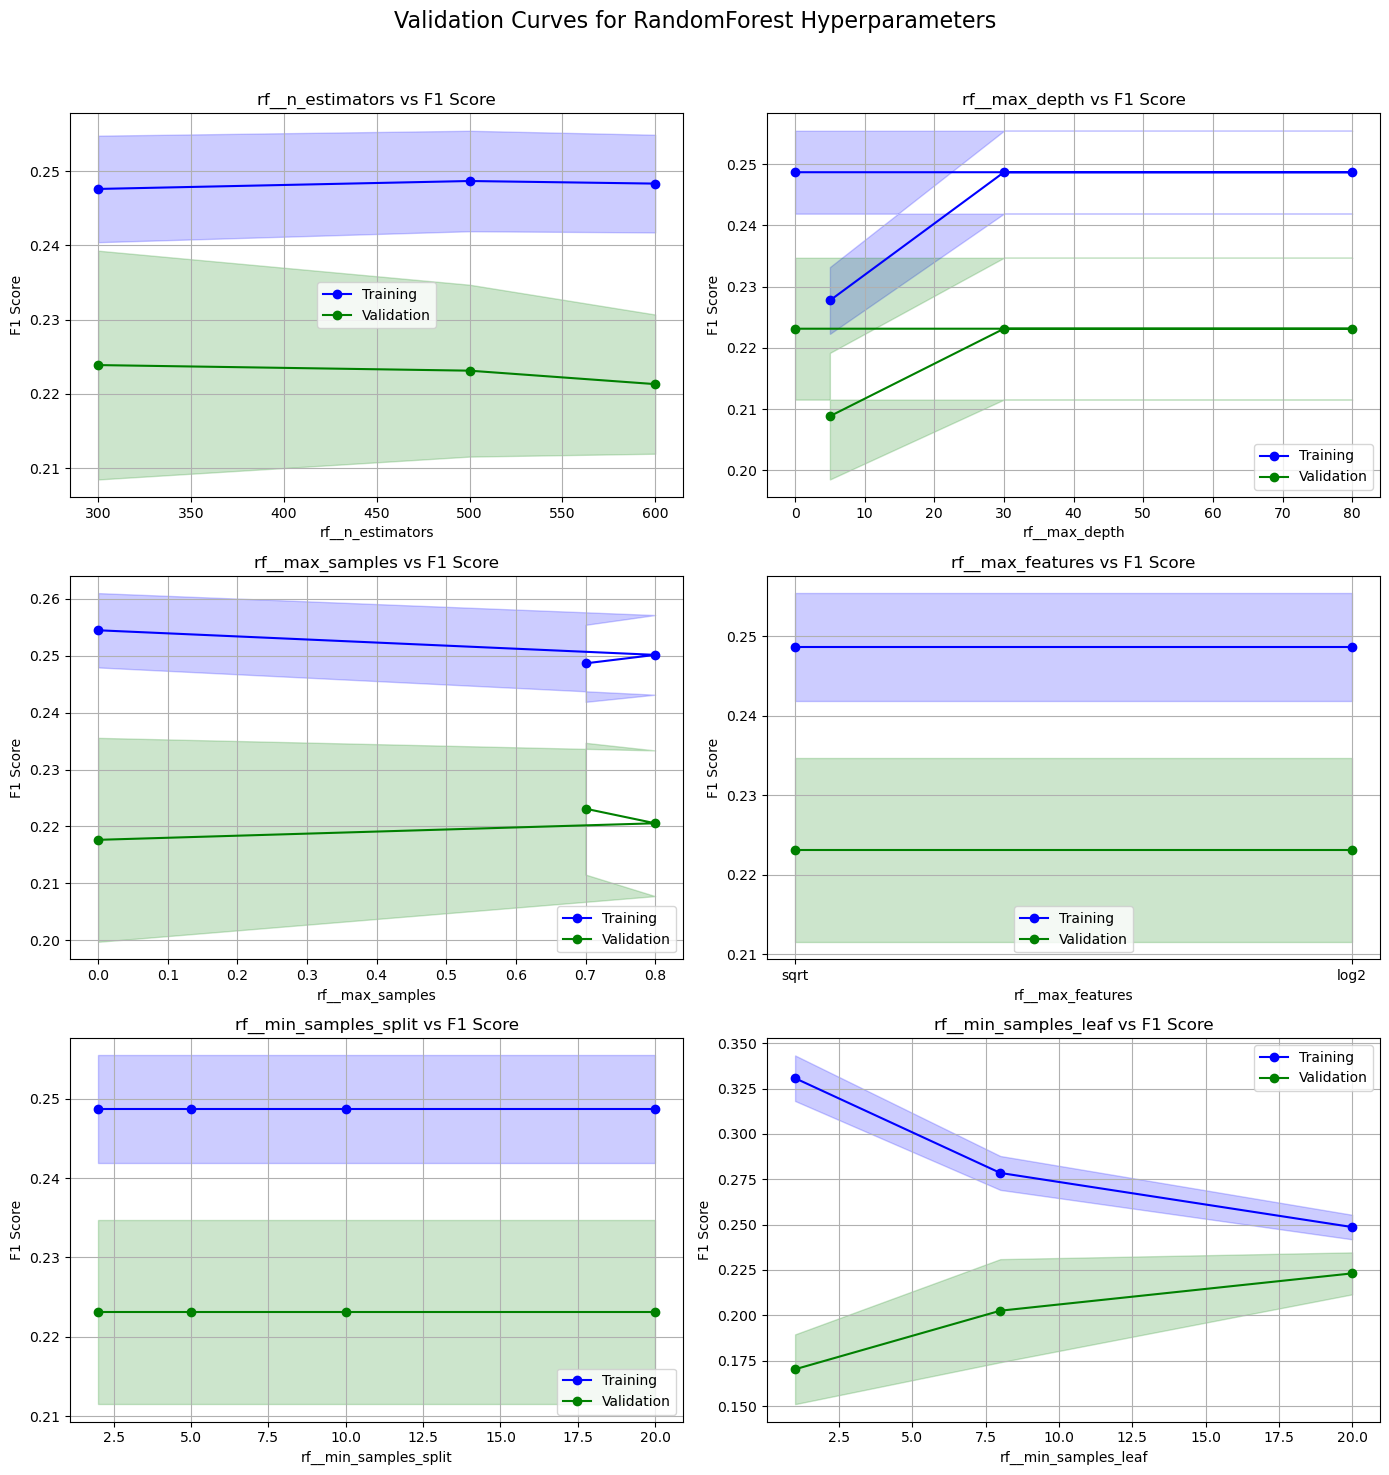

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, f1_score

def plot_validation_curves(model, X, y, params, cv, scoring=None):
    """
    Plots validation curves for multiple hyperparameters in a grid layout to help identify optimal parameter values.
    
    This function creates individual validation curves for each hyperparameter, showing how training and 
    validation scores change across different parameter values. This helps identify:
    - Optimal parameter values (peak validation performance)
    - Overfitting (large gap between training and validation scores)
    - Underfitting (both scores plateau at low values)
    
    Parameters:
    -----------
    model : sklearn estimator or pipeline
        The fitted model/pipeline to evaluate (e.g., RandomForest, pipeline with SMOTE)
    X : array-like, shape (n_samples, n_features)
        Training feature matrix
    y : array-like, shape (n_samples,)
        Training target vector
    params : dict
        Dictionary where keys are parameter names (e.g., 'rf__n_estimators') and 
        values are lists of parameter values to test
    cv : cross-validation generator or int
        Cross-validation splitting strategy (e.g., StratifiedKFold(5))
    scoring : str, callable, or None, default=None
        Scoring metric to evaluate model performance. If None, defaults to F1-score 
        for minority class (appropriate for imbalanced datasets like stroke prediction)
    
    Returns:
    --------
    None (displays plots)
    """
    
    # Set default scoring metric for imbalanced classification problems
    # F1-score balances precision and recall, crucial for minority class detection
    if scoring is None:
        scoring = make_scorer(f1_score, pos_label=1)  # pos_label=1 targets stroke cases
    
    # Calculate subplot layout dimensions
    n_params = len(params)  # Number of hyperparameters to plot
    n_cols = 2              # Fixed 2-column layout for better readability
    n_rows = int(np.ceil(n_params / n_cols))  # Calculate required rows
    
    # Create figure with subplots - dynamic height based on number of parameters
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()  # Convert 2D array to 1D for easier indexing
    
    # Set overall figure title
    fig.suptitle("Validation Curves for RandomForest Hyperparameters", fontsize=16)

    # Iterate through each hyperparameter and create its validation curve
    for ax, (param_name, param_range) in zip(axes, params.items()):
        
        # Handle None values in parameter ranges for plotting
        # Some parameters like max_depth can be None (unlimited), replace with 0 for visualization
        param_range_plot = [p if p is not None else 0 for p in param_range]
        
        # Generate validation curve data using cross-validation
        # This trains the model multiple times with different parameter values
        train_scores, val_scores = validation_curve(
            model,                    # Model to evaluate
            X, y,                    # Training data
            param_name=param_name,   # Parameter to vary (e.g., 'rf__n_estimators')
            param_range=param_range, # Values to test for this parameter
            scoring=scoring,         # Evaluation metric (F1-score)
            cv=cv,                   # Cross-validation strategy
            n_jobs=-1                # Use all CPU cores for parallel processing
        )
        
        # Calculate statistics across CV folds for each parameter value
        # train_scores/val_scores shape: (n_param_values, n_cv_folds)
        train_mean = np.mean(train_scores, axis=1)  # Mean training score per parameter value
        train_std = np.std(train_scores, axis=1)    # Standard deviation of training scores
        val_mean = np.mean(val_scores, axis=1)      # Mean validation score per parameter value
        val_std = np.std(val_scores, axis=1)        # Standard deviation of validation scores

        # Plot training curve (blue line with confidence interval)
        ax.plot(param_range_plot, train_mean, label="Training", color="blue", marker="o")
        ax.fill_between(param_range_plot, 
                       train_mean - train_std,   # Lower bound of confidence interval
                       train_mean + train_std,   # Upper bound of confidence interval
                       alpha=0.2, color="blue")  # Semi-transparent fill
        
        # Plot validation curve (green line with confidence interval)
        ax.plot(param_range_plot, val_mean, label="Validation", color="green", marker="o")
        ax.fill_between(param_range_plot, 
                       val_mean - val_std,       # Lower bound of confidence interval
                       val_mean + val_std,       # Upper bound of confidence interval
                       alpha=0.2, color="green") # Semi-transparent fill
        
        # Customize individual subplot
        ax.set_title(f"{param_name} vs F1 Score")  # Title shows parameter being tested
        ax.set_xlabel(param_name)                   # X-axis label
        ax.set_ylabel("F1 Score")                   # Y-axis label (0.0 to 1.0 range)
        ax.grid(True)                               # Add grid for easier reading
        ax.legend()                                 # Show legend distinguishing train/validation

    # Remove any unused subplots (when n_params < n_rows * n_cols)
    # This prevents empty subplots from appearing in the final layout
    for i in range(len(params), len(axes)):
        fig.delaxes(axes[i])
    
    # Adjust subplot spacing to prevent overlap
    # rect parameter leaves space at top for main title
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Display the complete validation curve plot
    plt.show()

# Example usage: Plot validation curves for the best Random Forest model
# This helps identify if hyperparameters are optimal or need further tuning
plot_validation_curves(best_model_rf, X_train, y_train, param_dist, cv)

In [84]:
# Fine-tuning the hyperparameters of the Random Forest model using validation curves
# Based on initial RandomizedSearchCV results, we narrow down the parameter space for precise tuning

# RCV contains the best parameters from initial random search validation curves analysis
RCV = {
    'rf__n_estimators': 500,        # Optimal number of trees found from validation curves
    'rf__min_samples_split': 2,     # Minimum samples to split a node (prevents underfitting)
    'rf__min_samples_leaf': 20,     # Minimum samples in leaf nodes (reduces overfitting)
    'rf__max_samples': None,        # Use all samples for each tree (bootstrap sampling)
    'rf__max_features': 'sqrt',     # Square root of features per split (good default for classification)
    'rf__max_depth': None           # No depth limit (let trees grow fully, controlled by other params)
}

from sklearn.model_selection import GridSearchCV

# Step 1: Set up cross-validation strategy
# StratifiedKFold ensures balanced class distribution across folds (critical for imbalanced stroke data)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 2: Create preprocessing + model pipeline
# Pipeline ensures SMOTE is applied correctly during cross-validation (no data leakage)
pipeline = Pipeline([
    # SMOTETomek combines oversampling (SMOTE) + undersampling (Tomek links)
    # Addresses class imbalance (95.1% non-stroke vs 4.9% stroke cases)
    ('smotetomek', SMOTETomek(random_state=42)),
    
    # RandomForest with balanced class weights to further handle imbalance
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Step 3: Define fine-tuned parameter grid based on validation curve insights
param_grid = {
    # n_estimators: Fixed at 600 based on validation curves showing plateau after 500
    # More trees = better performance but diminishing returns after 500-600
    'rf__n_estimators': [600],
    
    # max_depth: Keep unlimited depth since validation curves showed best performance with None
    # Overfitting controlled by min_samples_leaf and min_samples_split instead
    'rf__max_depth': [None],
    
    # max_samples: Test bootstrap sampling strategies
    # 0.7-0.8 = use 70-80% of samples per tree (reduces overfitting)
    # None = use all samples (traditional bootstrap)
    'rf__max_samples': [0.7, 0.8, None],
    
    # max_features: Feature subsampling for each split
    # 'sqrt' = √(total_features) - good for classification, reduces correlation between trees
    # 'log2' = log₂(total_features) - more aggressive feature selection, may improve generalization
    'rf__max_features': ['sqrt', 'log2'],
    
    # min_samples_split: Minimum samples required to split an internal node
    # 2 = aggressive splitting (more complex trees, higher variance)
    # 20 = conservative splitting (simpler trees, lower variance)
    'rf__min_samples_split': [2, 20],
    
    # min_samples_leaf: Minimum samples required in each leaf node
    # 20 = prevents overfitting by ensuring sufficient samples per prediction
    # 40 = even more conservative, smoother decision boundaries
    'rf__min_samples_leaf': [20, 40]
}

# Step 4: GridSearchCV configuration for exhaustive hyperparameter search
grid_search = GridSearchCV(
    estimator=pipeline,                                    # Pipeline to optimize
    param_grid=param_grid,                                # Parameter combinations to test
    scoring=make_scorer(f1_score, pos_label=1),          # F1-score for stroke class (pos_label=1)
                                                          # F1 balances precision/recall - crucial for imbalanced data
    cv=cv,                                                # 5-fold stratified cross-validation
    refit='f1',                                          # Refit best model using F1 score
    n_jobs=-1,                                           # Use all CPU cores for parallel processing
    verbose=1,                                           # Show progress during fitting
    error_score='raise'                                  # Stop execution if errors occur (debugging)
)

# Step 5: Execute grid search to find optimal hyperparameters
print("Starting GridSearchCV hyperparameter optimization...")
grid_search.fit(X_train, y_train)

# Step 6: Extract the best performing model configuration
best_model_rf_grid = grid_search.best_estimator_

# Step 7: Perform robust cross-validation evaluation of the best model
# This gives us unbiased performance estimates using the same CV strategy
cv_results_grid = cross_validate(
    best_model_rf_grid,                                  # Best model from grid search
    X_train, y_train,                                   # Training data
    cv=cv,                                              # Same CV strategy as grid search
    scoring=make_scorer(f1_score, pos_label=1),        # F1-score for stroke prediction
    n_jobs=-1,                                          # Parallel processing
    return_train_score=True                             # Return both train and validation scores
)

# Step 8: Report cross-validation performance
print("Grid Search Cross-Validation Results:")
print(f"Train F1 Score: {np.mean(cv_results_grid['train_score']):.4f} ± {np.std(cv_results_grid['train_score']):.4f}")
print(f"Test F1 Score: {np.mean(cv_results_grid['test_score']):.4f} ± {np.std(cv_results_grid['test_score']):.4f}")

# Step 9: Final evaluation on held-out test set
# This represents real-world performance on completely unseen data
y_pred_best_grid = best_model_rf_grid.predict(X_test)

# Step 10: Comprehensive performance analysis
print("Best Model (Grid Search) Classification Report:")
print(classification_report(y_test, y_pred_best_grid))

print("Best Model (Grid Search) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_grid))

# Step 11: Display optimal hyperparameter configuration
print("Best Hyperparameters (Grid Search):")
print(grid_search.best_params_)

# Expected insights from results:
# - max_samples: Lower values (0.7-0.8) may reduce overfitting
# - max_features: 'log2' might perform better for high-dimensional data
# - min_samples_leaf: Higher values (40) should improve generalization
# - Performance gap between train/test F1 indicates overfitting level

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Grid Search Cross-Validation Results:
Train F1 Score: 0.2483 ± 0.0066
Test F1 Score: 0.2213 ± 0.0094
Best Model (Grid Search) Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.90      0.26        50

    accuracy                           0.75      1022
   macro avg       0.57      0.82      0.56      1022
weighted avg       0.95      0.75      0.82      1022

Best Model (Grid Search) Confusion Matrix:
[[726 246]
 [  5  45]]
Best Hyperparameters (Grid Search):
{'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__max_samples': 0.7, 'rf__min_samples_leaf': 20, 'rf__min_samples_split': 2, 'rf__n_estimators': 600}


Classification Report (Threshold=0.5):
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.90      0.26        50

    accuracy                           0.75      1022
   macro avg       0.57      0.82      0.56      1022
weighted avg       0.95      0.75      0.82      1022

Confusion Matrix:
[[726 246]
 [  5  45]]


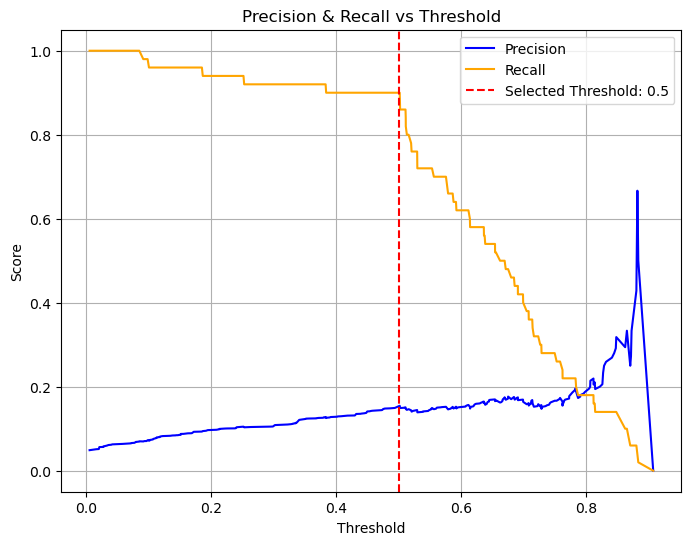

    Actual  Predicted  Confidence
0        0          1    0.906864
1        1          1    0.883003
2        1          1    0.881556
3        1          1    0.879946
4        0          1    0.879946
5        0          1    0.879946
6        0          1    0.879946
7        0          1    0.872239
8        0          1    0.872239
9        0          1    0.871315
10       0          1    0.871315
11       0          1    0.870143
12       1          1    0.864762
13       1          1    0.864762
14       0          1    0.864762
15       0          1    0.862026
16       0          1    0.862026
17       0          1    0.847785
18       0          1    0.847785
19       1          1    0.847785


In [132]:
# Import necessary libraries for evaluation and visualization
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_with_threshold(model, X, y, threshold=0.0):
    """
    Evaluates a model at a custom threshold and plots Precision-Recall vs Threshold curve.
    
    Parameters:
        model: Trained classifier with a predict_proba method.
        X: Test features.
        y: Test labels (ground truth).
        threshold: Probability cutoff for classifying as positive (default is 0.0).
    """
    # Predict probabilities for the positive class (stroke = 1)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Convert probabilities to binary predictions based on the specified threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Print the classification report to evaluate precision, recall, F1-score, etc.
    print(f"Classification Report (Threshold={threshold}):")
    print(classification_report(y, y_pred))
    
    # Print the confusion matrix to analyze true positives, false positives, etc.
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    
    # Generate the Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y, y_pred_proba)
    
    # Plot Precision and Recall as a function of the threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], label='Precision', color='blue')  # Precision curve
    plt.plot(thresholds, recall[:-1], label='Recall', color='orange')      # Recall curve
    plt.axvline(threshold, color='red', linestyle='--', label=f'Selected Threshold: {threshold}')  # Highlight the selected threshold
    plt.title('Precision & Recall vs Threshold')  # Title of the plot
    plt.xlabel('Threshold')  # X-axis label
    plt.ylabel('Score')      # Y-axis label
    plt.legend()             # Add legend to distinguish curves
    plt.grid()               # Add grid for better readability
    plt.show()               # Display the plot
    
    # Return the binary predictions and probabilities for further analysis
    return y_pred, y_pred_proba

# Evaluate the best Random Forest model at a threshold of 0.5 (default threshold)
y_pred, y_pred_proba = evaluate_with_threshold(best_model_rf, X_test, y_test, threshold=0.5)

# Import pandas for creating a DataFrame to inspect predictions
import pandas as pd

# Get predicted class (0/1) and predicted probabilities for the positive class
y_pred = best_model_rf.predict(X_test)  # Binary predictions
y_probs = best_model_rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (stroke)

# Build a DataFrame to inspect predictions and their confidence levels
results_df = pd.DataFrame({
    'Actual': y_test,       # Ground truth labels
    'Predicted': y_pred,    # Predicted labels
    'Confidence': y_probs   # Confidence scores (probabilities for class 1)
})

# Sort the DataFrame by confidence scores in descending order (optional)
# This helps in inspecting the predictions with the highest confidence
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)

# Display the top 20 predictions with the highest confidence scores
print(results_df.head(20))

ExtraTreesClassifier

In [86]:
# extra tree classifier basic model without SMOTE
from sklearn.ensemble import ExtraTreesClassifier
# Initialize the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42,class_weight='balanced')
# Fit the model on the resampled training data
et_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_et = et_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Extra Trees Classifier
print("Extra Trees Classifier Classification Report:")
print(classification_report(y_test, y_pred_et))
# Print the confusion matrix for Extra Trees Classifier
print("Extra Trees Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_et))


    

Extra Trees Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.14      0.44      0.21        50

    accuracy                           0.84      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.93      0.84      0.88      1022

Extra Trees Classifier Confusion Matrix:
[[837 135]
 [ 28  22]]


In [87]:
# Importing ExtraTreesClassifier for building the model
from sklearn.ensemble import ExtraTreesClassifier

# Step 2: Set up cross-validation and pipeline
# Using StratifiedKFold ensures that each fold maintains the same proportion of the target classes (stroke vs. no stroke).
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creating a pipeline with SMOTETomek and ExtraTreesClassifier
# SMOTETomek is used to handle class imbalance by oversampling the minority class (stroke) and removing Tomek links (overlapping samples).
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),  # Balances the dataset
    ('et', ExtraTreesClassifier(random_state=42))  # Extra Trees Classifier for feature importance and classification
])

# Step 3: Parameter distribution for RandomizedSearchCV
# The parameter grid is designed to explore a wide range of hyperparameters for tuning the Extra Trees model:
param_dist = {
    'et__n_estimators': [100, 300, 500, 1000],  # Number of trees in the forest. Higher values improve performance but increase training time.
    'et__max_depth': [5, 30, 80, None],  # Maximum depth of the trees. Limits tree growth to prevent overfitting.
    'et__max_samples': [0.7, 0.8, None],  # Fraction of samples used for training each tree. Reduces overfitting by subsampling.
    'et__max_features': ['sqrt', 'log2'],  # Number of features considered for splitting. 'sqrt' and 'log2' are common for classification tasks.
    'et__min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node. Higher values reduce overfitting.
    'et__min_samples_leaf': [1, 8, 20],  # Minimum samples required in a leaf node. Higher values create simpler trees.
    'et__bootstrap': [True],  # Whether to use bootstrap sampling. Helps reduce overfitting by training on different subsets of data.
}

# Step 4: RandomizedSearchCV for hyperparameter tuning
# RandomizedSearchCV is used to efficiently search the hyperparameter space:
random_search_et = RandomizedSearchCV(
    pipeline,  # Pipeline with SMOTETomek and ExtraTreesClassifier
    param_distributions=param_dist,  # Hyperparameter grid
    n_iter=25,  # Number of parameter combinations to try. Balances exploration and computation time.
    scoring=make_scorer(f1_score, pos_label=1),  # Optimizing for F1-score of the minority class (stroke).
    cv=cv,  # Stratified cross-validation to maintain class balance in folds.
    random_state=42,  # Ensures reproducibility of results.
    n_jobs=-1,  # Utilizes all available CPU cores for faster computation.
    verbose=1,  # Displays progress during the search.
    error_score='raise'  # Raises an error if any issue occurs during fitting.
)

# Fit the random search model
# The pipeline applies SMOTETomek to balance the data before training the Extra Trees model.
random_search_et.fit(X_train, y_train)

# Get the best model from random search
best_model_et = random_search_et.best_estimator_

# Evaluate the best model on the test set
y_pred_best_et = best_model_et.predict(X_test)

# Print the classification report for the best Extra Trees model
# Provides precision, recall, F1-score, and support for each class.
print("Best Extra Trees Model Classification Report:")
print(classification_report(y_test, y_pred_best_et))

# Print the confusion matrix for the best Extra Trees model
# Shows the number of true positives, true negatives, false positives, and false negatives.
print("Best Extra Trees Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_et))

# Print the best hyperparameters found by RandomizedSearchCV for Extra Trees
# Displays the optimal hyperparameter values for the Extra Trees model.
print("Best Hyperparameters for Extra Trees:")
print(random_search_et.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Extra Trees Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.86      0.26        50

    accuracy                           0.76      1022
   macro avg       0.57      0.80      0.55      1022
weighted avg       0.95      0.76      0.82      1022

Best Extra Trees Model Confusion Matrix:
[[729 243]
 [  7  43]]
Best Hyperparameters for Extra Trees:
{'et__n_estimators': 100, 'et__min_samples_split': 10, 'et__min_samples_leaf': 20, 'et__max_samples': 0.7, 'et__max_features': 'sqrt', 'et__max_depth': 30, 'et__bootstrap': True}


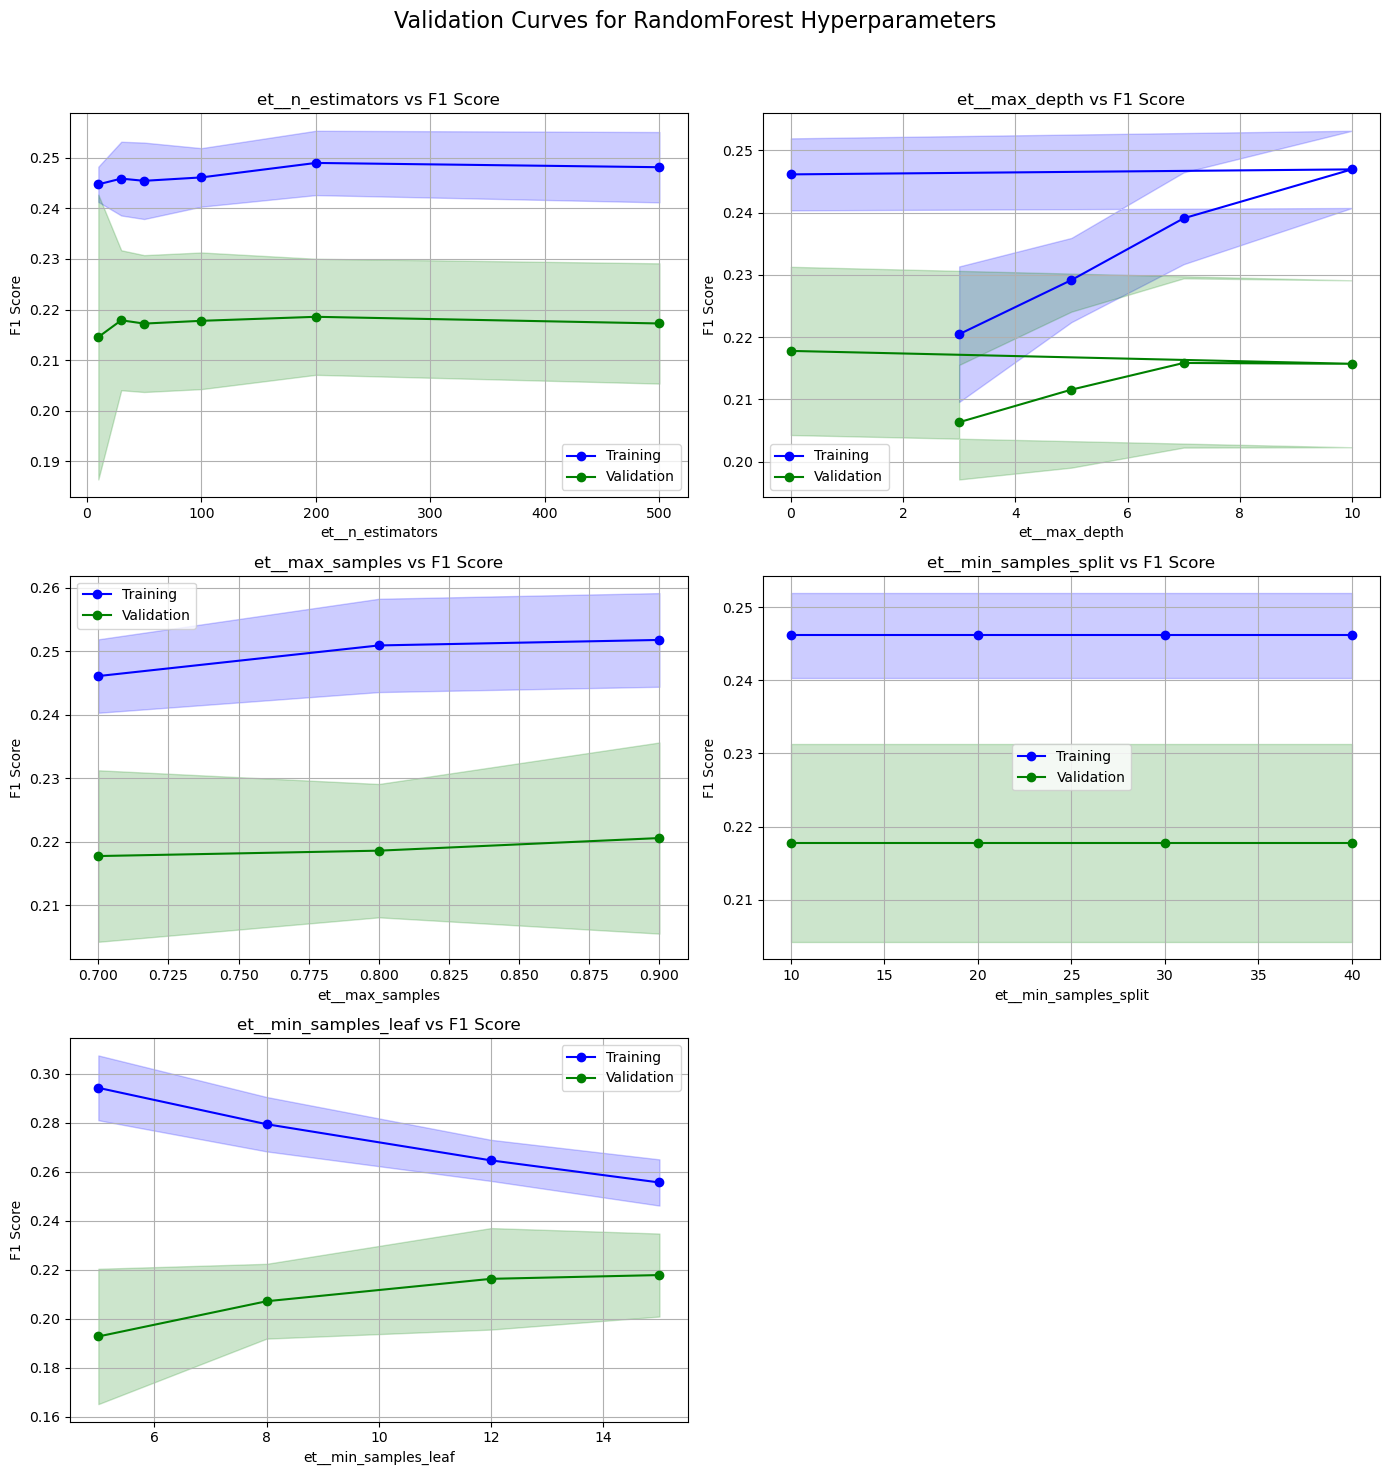

In [ ]:


# Explore validation curves for Extra Trees model:
# This helps visualize how different hyperparameters affect model performance.
# allows us to identify optimal parameter values and detect overfitting or underfitting.
param_dist = {
    'et__n_estimators': [10,30, 50, 100, 200,500],
    'et__max_depth': [3,5, 7,10, None],
    'et__max_samples': [0.7, 0.8, 0.9],
    'et__min_samples_split': [10, 20, 30, 40],
    'et__min_samples_leaf': [5,8,12,15],

}

plot_validation_curves(best_model_et, X_train, y_train, param_dist, cv)



Classification Report (Threshold=0.37):
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.13      0.92      0.22        50

    accuracy                           0.69      1022
   macro avg       0.56      0.80      0.51      1022
weighted avg       0.95      0.69      0.78      1022

Confusion Matrix:
[[656 316]
 [  4  46]]


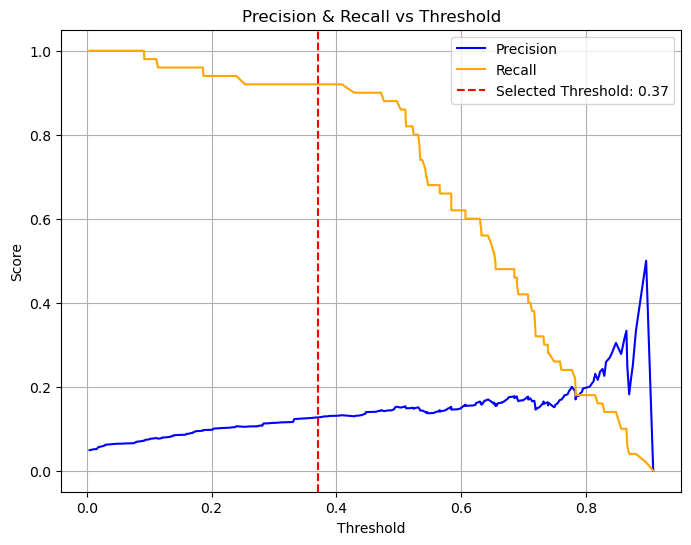

    Actual  Predicted  Confidence
0        0          1    0.907987
1        1          1    0.896641
2        0          1    0.880278
3        0          1    0.880278
4        0          1    0.880278
5        1          1    0.880278
6        0          1    0.875241
7        0          1    0.875241
8        0          1    0.872682
9        0          1    0.869433
10       0          1    0.869433
11       1          1    0.866406
12       1          1    0.865049
13       1          1    0.865049
14       0          1    0.865049
15       0          1    0.861502
16       0          1    0.856611
17       0          1    0.856611
18       1          1    0.848305
19       1          1    0.848305


In [89]:
# check of threshold will improve the model performance

y_pred, y_pred_proba = evaluate_with_threshold(best_model_et, X_test, y_test, threshold=0.37)




import pandas as pd

# Get predicted class (0/1) and predicted probability
y_pred = best_model_et.predict(X_test)
y_probs = best_model_et.predict_proba(X_test)[:, 1]  # probability for class 1 (stroke)

# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Confidence': y_probs
})

# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)

print(results_df.head(20))  # show top 20




DecisionTreeClassifier

In [90]:
# Decision Tree Classifier basic model without SMOTE
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Fit the model on the resampled training data
dt_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_dt = dt_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Decision Tree Classifier
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dt))
# Print the confusion matrix for Decision Tree Classifier
print("Decision Tree Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.06      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.51      0.50      0.50      1022
weighted avg       0.91      0.94      0.92      1022

Decision Tree Classifier Confusion Matrix:
[[957  15]
 [ 49   1]]


In [91]:
# decision tree classifier with random search and SMOTE
from sklearn.tree import DecisionTreeClassifier
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + DecisionTree
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'dt__max_depth': [5, 30, 80, None], # Maximum depth of the tree
    'dt__min_samples_split': [2, 5, 10, 20], # Minimum samples required to split an internal node
    'dt__min_samples_leaf': [1, 8, 20], # Minimum samples required to be at a leaf node
    'dt__max_features': ['sqrt', 'log2'] # Number of features to consider when looking for the best split
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_dt = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_dt.fit(X_train, y_train)
# Get the best model from random search
best_model_dt = random_search_dt.best_estimator_
# Evaluate the best model on the test set
y_pred_best_dt = best_model_dt.predict(X_test)
# Print the classification report for the best Decision Tree model
print("Best Decision Tree Model Classification Report:")
print(classification_report(y_test, y_pred_best_dt))
# Print the confusion matrix for the best Decision Tree model
print("Best Decision Tree Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_dt))
# Print the best hyperparameters found by RandomizedSearchCV for Decision Tree
print("Best Hyperparameters for Decision Tree:")
print(random_search_dt.best_params_)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.78      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.74      0.81      1022

Best Decision Tree Model Confusion Matrix:
[[717 255]
 [ 11  39]]
Best Hyperparameters for Decision Tree:
{'dt__min_samples_split': 2, 'dt__min_samples_leaf': 20, 'dt__max_features': 'sqrt', 'dt__max_depth': None}


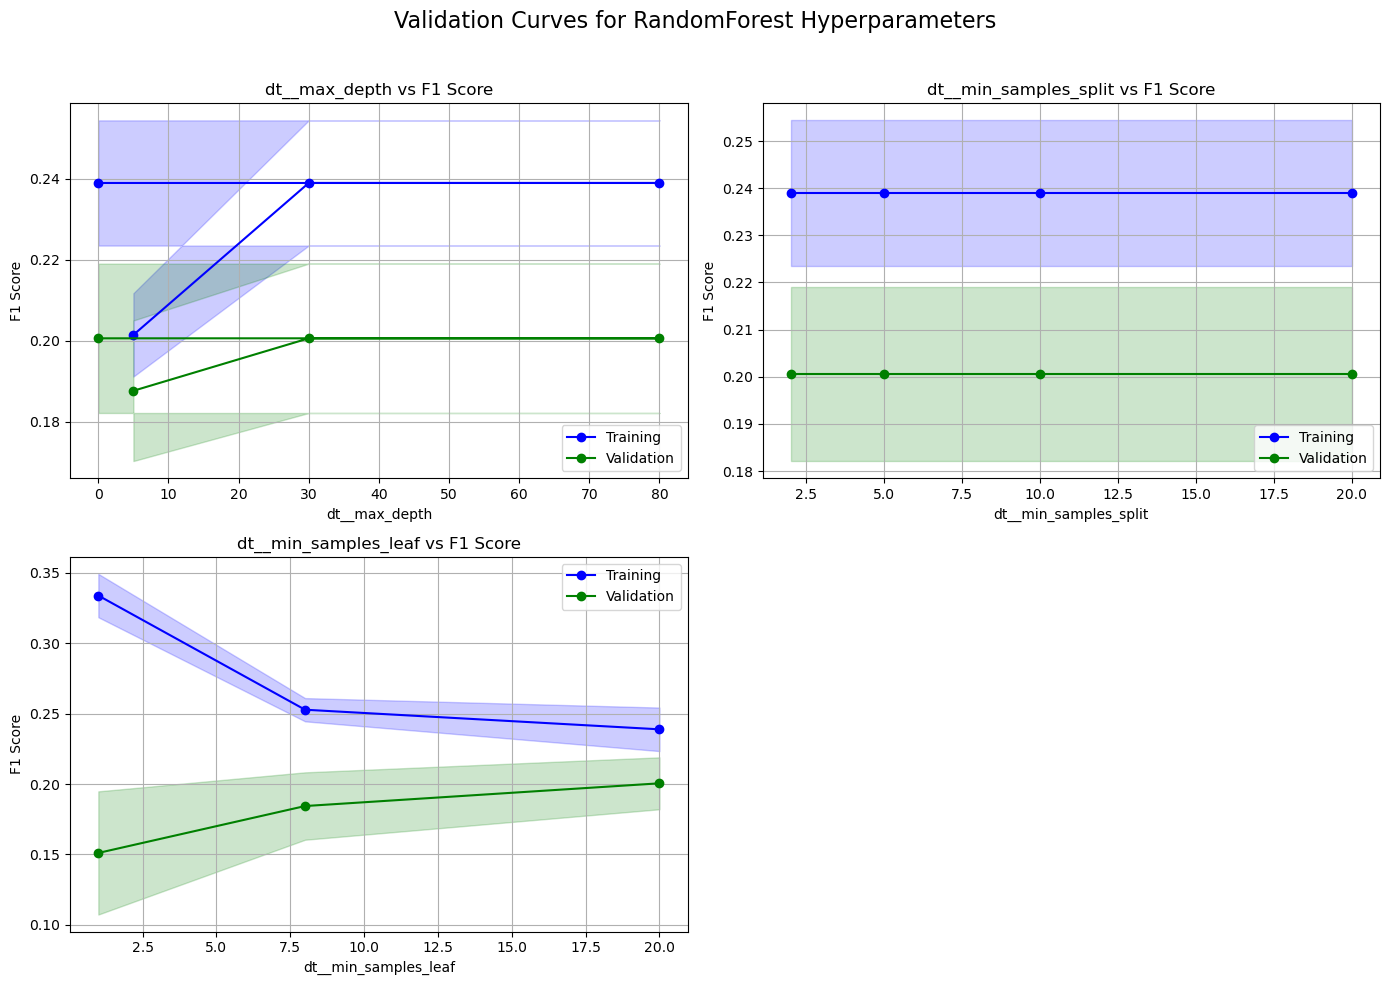

In [92]:
# Explore validation curves for Extra Trees model:
param_dist = {
    'dt__max_depth': [5, 30, 80, None],
    'dt__min_samples_split': [2, 5, 10, 20],
    'dt__min_samples_leaf': [1, 8, 20],
}

plot_validation_curves(best_model_dt, X_train, y_train, param_dist, cv)

Classification Report (Threshold=0.3):
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       972
           1       0.11      0.88      0.20        50

    accuracy                           0.66      1022
   macro avg       0.55      0.76      0.49      1022
weighted avg       0.95      0.66      0.75      1022

Confusion Matrix:
[[628 344]
 [  6  44]]


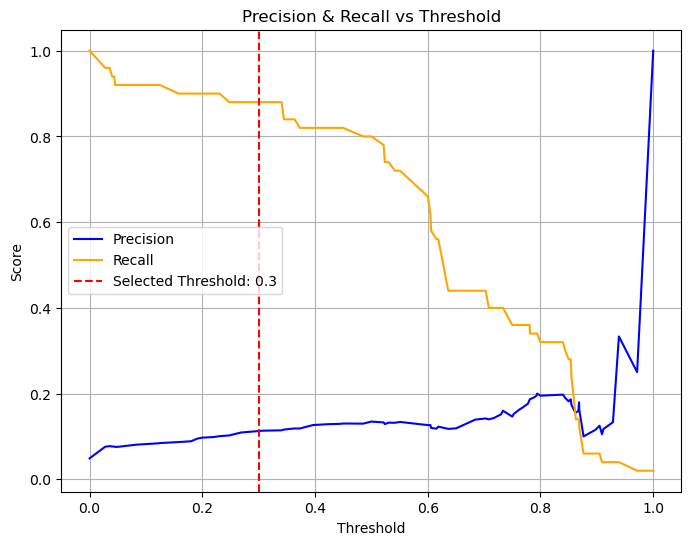

    Actual  Predicted  Confidence
0        1          1    1.000000
1        0          1    0.971429
2        0          1    0.971429
3        0          1    0.971429
4        1          1    0.939130
5        0          1    0.939130
6        0          1    0.928571
7        0          1    0.928571
8        0          1    0.928571
9        0          1    0.928571
10       0          1    0.928571
11       0          1    0.928571
12       0          1    0.928571
13       0          1    0.928571
14       0          1    0.928571
15       0          1    0.920000
16       0          1    0.911765
17       0          1    0.909091
18       0          1    0.909091
19       0          1    0.904762


In [93]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(best_model_dt, X_test, y_test, threshold=0.3)

import pandas as pd
# Get predicted class (0/1) and predicted probability
y_pred = best_model_dt.predict(X_test)
y_probs = best_model_dt.predict_proba(X_test)[:, 1]  # probability for class 1 (stroke)
# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Confidence': y_probs
})
# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # show top 20






#### Gradient Boosting

GradientBoostingClassifier

In [94]:
# Gradient Boosting Classifier basic model without SMOTE
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
# Fit the model on the resampled training data
gb_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_gb = gb_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Gradient Boosting Classifier
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))
# Print the confusion matrix for Gradient Boosting Classifier
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.25      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022

Gradient Boosting Classifier Confusion Matrix:
[[969   3]
 [ 49   1]]


In [95]:
# gradient boosting classifier with random search and SMOTE
from sklearn.ensemble import GradientBoostingClassifier
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + GradientBoosting
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'gb__n_estimators': [100, 300, 500, 1000], # Number of boosting stages to be run
    'gb__max_depth': [5, 30, 80, None], # Maximum depth of the individual regression estimators
    'gb__learning_rate': [0.01, 0.1, 0.2], # Learning rate shrinks the contribution of each tree
    'gb__min_samples_split': [2, 5, 10, 20], # Minimum number of samples required to split an internal node
    'gb__min_samples_leaf': [1, 8, 20] # Minimum number of samples required to be at a leaf node
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_gb = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_gb.fit(X_train, y_train)
# Get the best model from random search
best_model_gb = random_search_gb.best_estimator_
# Evaluate the best model on the test set
y_pred_best_gb = best_model_gb.predict(X_test)
# Print the classification report for the best Gradient Boosting model
print("Best Gradient Boosting Model Classification Report:")
print(classification_report(y_test, y_pred_best_gb))
# Print the confusion matrix for the best Gradient Boosting model
print("Best Gradient Boosting Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gb))
# Print the best hyperparameters found by RandomizedSearchCV for Gradient Boosting
print("Best Hyperparameters for Gradient Boosting:")
print(random_search_gb.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Gradient Boosting Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.13      0.72      0.22        50

    accuracy                           0.76      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.76      0.82      1022

Best Gradient Boosting Model Confusion Matrix:
[[736 236]
 [ 14  36]]
Best Hyperparameters for Gradient Boosting:
{'gb__n_estimators': 300, 'gb__min_samples_split': 20, 'gb__min_samples_leaf': 8, 'gb__max_depth': 5, 'gb__learning_rate': 0.01}


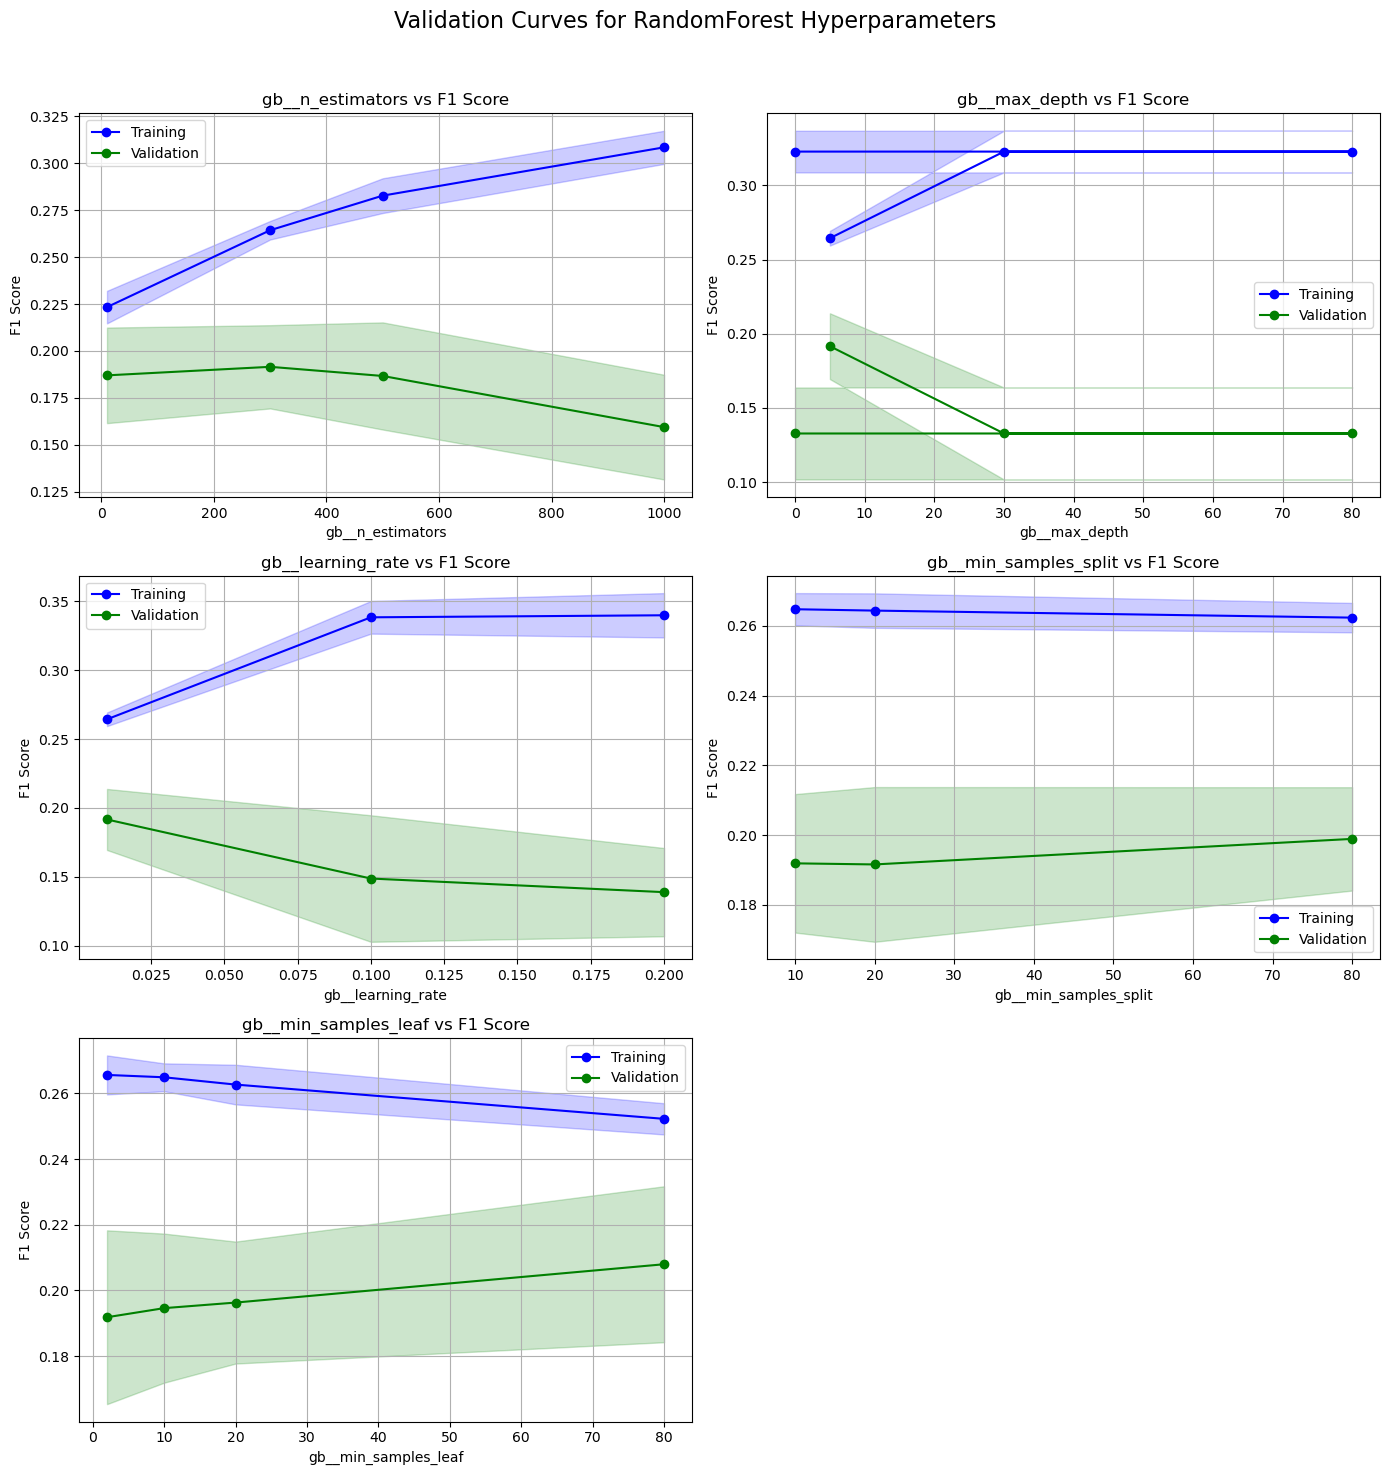

In [96]:
# Explore validation curves for  model:
param_dist = {
    'gb__n_estimators': [10, 300, 500, 1000],
    'gb__max_depth': [5, 30, 80, None],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__min_samples_split': [ 10, 20, 80],
    'gb__min_samples_leaf': [2,10,20,80],

}

plot_validation_curves(best_model_gb, X_train, y_train, param_dist, cv)




Classification Report (Threshold=0.4):
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.73      0.81      1022

Confusion Matrix:
[[705 267]
 [ 10  40]]


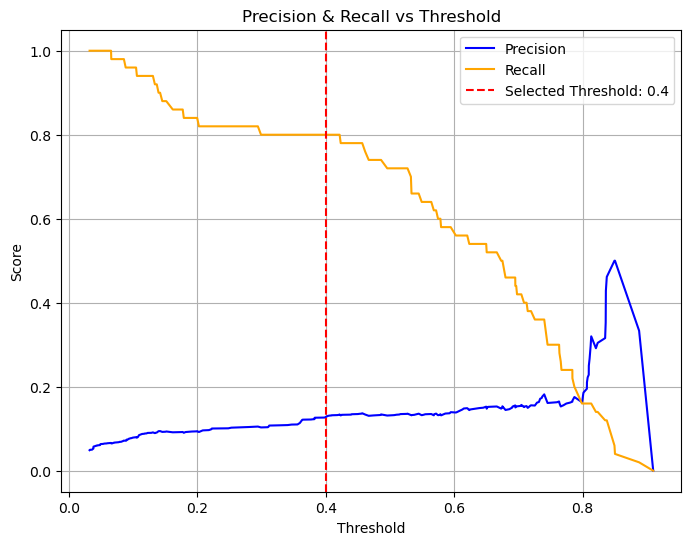

    Actual  Predicted  Confidence
0        0          1    0.909944
1        0          1    0.887964
2        1          1    0.887964
3        1          1    0.850394
4        0          1    0.849588
5        1          1    0.849588
6        1          1    0.837623
7        0          1    0.837623
8        0          1    0.837623
9        0          1    0.837623
10       1          1    0.837623
11       0          1    0.837623
12       1          1    0.837623
13       0          1    0.836209
14       0          1    0.835919
15       0          1    0.835919
16       0          1    0.835919
17       0          1    0.835050
18       0          1    0.835050
19       1          1    0.823437


In [97]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(best_model_gb, X_test, y_test, threshold=0.4)
import pandas as pd
# Get predicted class (0/1) and predicted probability
y_pred = best_model_gb.predict(X_test)
y_probs = best_model_gb.predict_proba(X_test)[:, 1]  #
# probability for class 1 (stroke)
# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Confidence': y_probs
})
# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # show top 20



HistGradientBoostingClassifier

In [98]:
# HisGradient Boosting Classifier basic model without SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
# Initialize the HistGradient Boosting Classifier
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
# Fit the model on the resampled training data
hgb_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_hgb = hgb_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for HistGradient Boosting Classifier
print("HistGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_hgb))
# Print the confusion matrix for HistGradient Boosting Classifier
print("HistGradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_hgb))



HistGradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

HistGradient Boosting Classifier Confusion Matrix:
[[969   3]
 [ 50   0]]


In [99]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline  # Use imblearn.pipeline instead of sklearn.pipeline
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline with SMOTE + HistGradientBoosting
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('hgb', HistGradientBoostingClassifier(random_state=42))
])

# Correct parameter distribution
param_dist = {
    'hgb__max_iter': [100, 300, 500, 1000], # Number of boosting iterations
    'hgb__max_depth': [3, 5, 10, None],  # Reduced to realistic depths
    'hgb__learning_rate': [0.01, 0.05, 0.1, 0.2], # Learning rate for boosting
    'hgb__min_samples_leaf': [1, 5, 10, 20], # Minimum samples in leaf nodes
    'hgb__max_leaf_nodes': [15, 31, 63, None],  # Optional: control leaf growth
    'hgb__l2_regularization': [0.0, 0.1, 1.0]   # Regularization to prevent overfitting
}

# RandomizedSearchCV for tuning
random_search_hgb = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Optimize for minority class F1
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'
)

# Fit
random_search_hgb.fit(X_train, y_train)

# Best model
best_model_hgb = random_search_hgb.best_estimator_

# Evaluate
y_pred_best_hgb = best_model_hgb.predict(X_test)
print("Best HistGradientBoosting Model Classification Report:")
print(classification_report(y_test, y_pred_best_hgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_hgb))
print("Best Hyperparameters:")
print(random_search_hgb.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best HistGradientBoosting Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.84       972
           1       0.14      0.84      0.23        50

    accuracy                           0.73      1022
   macro avg       0.56      0.78      0.53      1022
weighted avg       0.95      0.73      0.81      1022

Confusion Matrix:
[[703 269]
 [  8  42]]
Best Hyperparameters:
{'hgb__min_samples_leaf': 5, 'hgb__max_leaf_nodes': 31, 'hgb__max_iter': 300, 'hgb__max_depth': 3, 'hgb__learning_rate': 0.01, 'hgb__l2_regularization': 0.0}


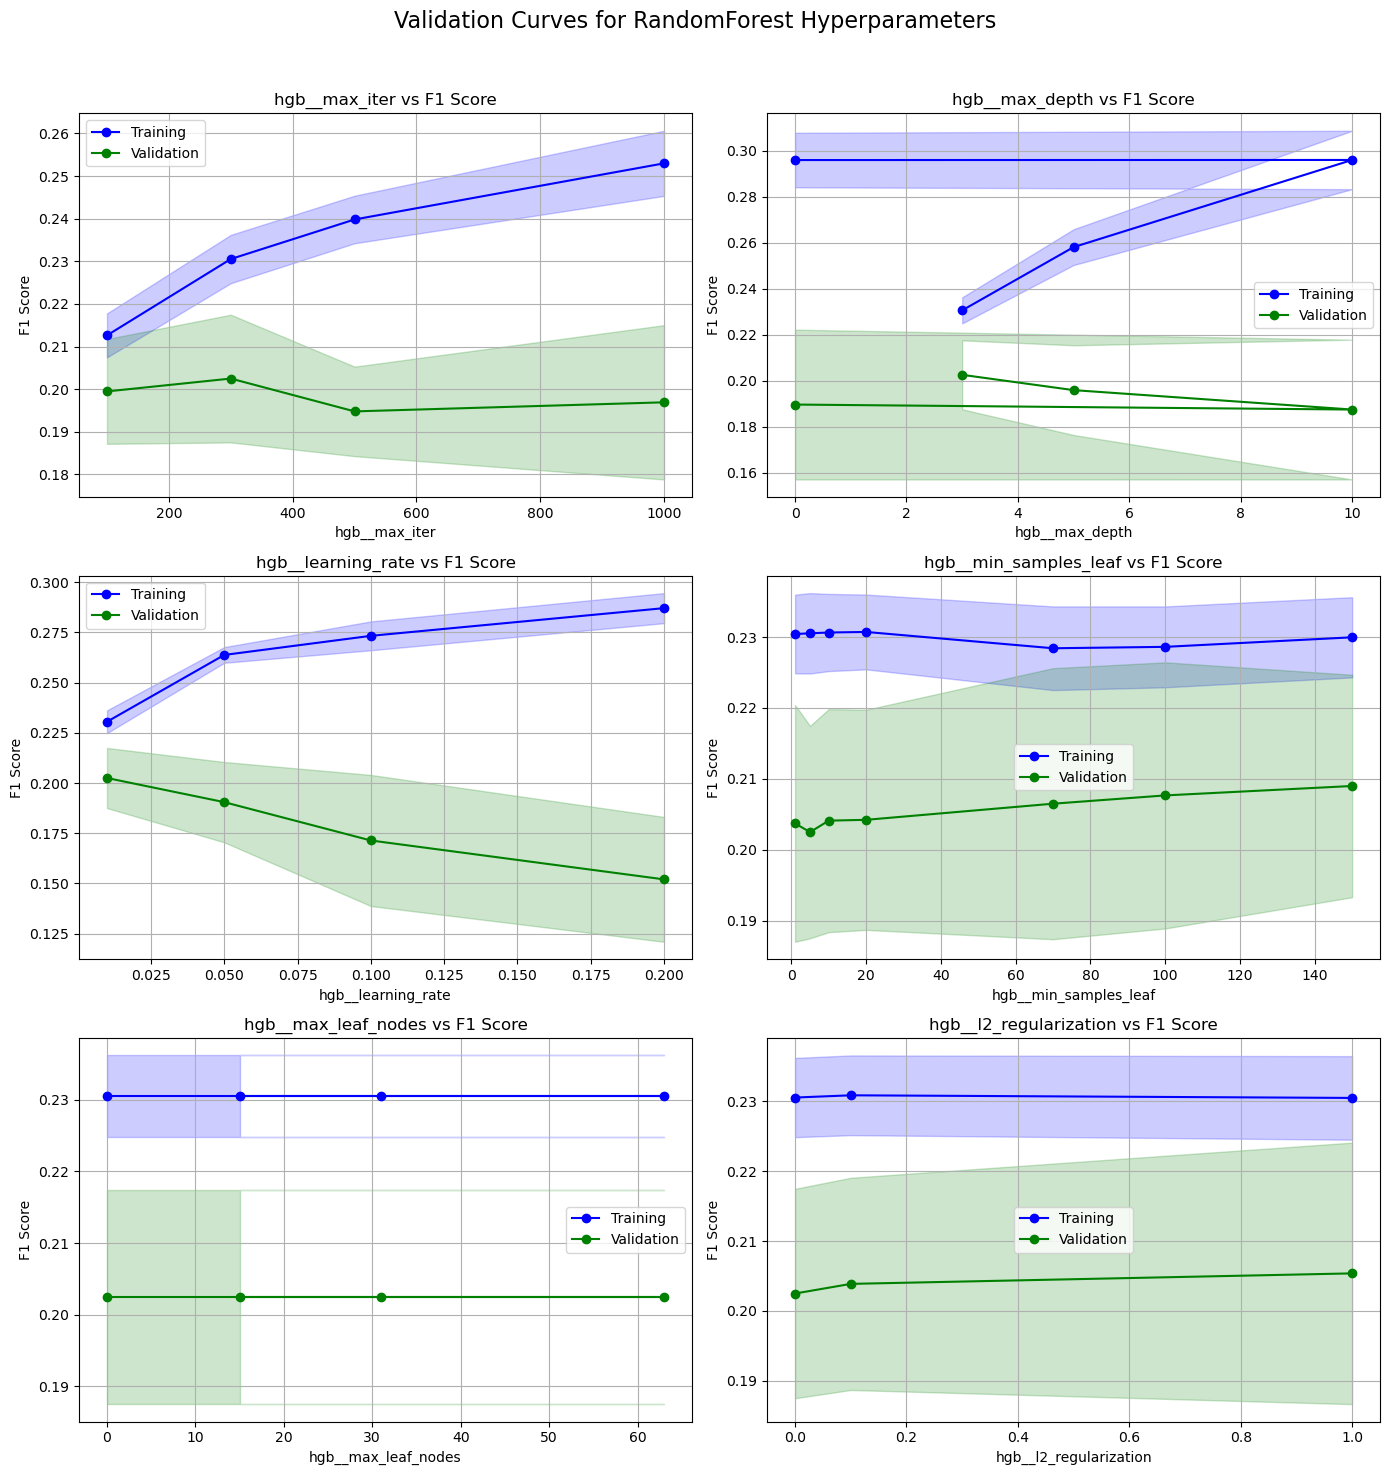

In [100]:
# Explore validation curves for HistGradient Boosting model:
param_dist_hgb = {
    'hgb__max_iter': [100, 300, 500, 1000],
    'hgb__max_depth': [3, 5, 10, None],  # Reduced to realistic depths
    'hgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'hgb__min_samples_leaf': [1, 5, 10, 20,70, 100, 150],
    'hgb__max_leaf_nodes': [15, 31, 63, None],  # Optional: control leaf growth
    'hgb__l2_regularization': [0.0, 0.1, 1.0]   # Regularization to prevent overfitting
}
plot_validation_curves(best_model_hgb, X_train, y_train, param_dist_hgb, cv)


Classification Report (Threshold=0.45):
              precision    recall  f1-score   support

           0       0.99      0.71      0.82       972
           1       0.13      0.84      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.71      0.80      1022

Confusion Matrix:
[[688 284]
 [  8  42]]


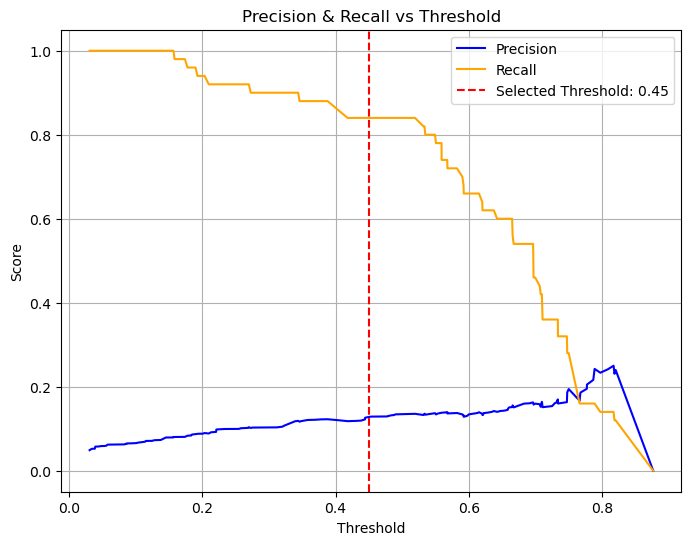

    Actual  Predicted  Confidence
0        0          1    0.876552
1        1          1    0.820163
2        1          1    0.820163
3        0          1    0.820163
4        0          1    0.820163
5        0          1    0.820163
6        1          1    0.820163
7        0          1    0.820163
8        0          1    0.820163
9        1          1    0.820163
10       0          1    0.820163
11       0          1    0.820163
12       0          1    0.820163
13       0          1    0.820163
14       0          1    0.820163
15       1          1    0.820163
16       1          1    0.820163
17       0          1    0.820163
18       0          1    0.820163
19       0          1    0.820163


In [101]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(best_model_hgb, X_test, y_test, threshold=0.45)
import pandas as pd
# Get predicted class (0/1) and predicted probability
y_pred = best_model_hgb.predict(X_test)
y_probs = best_model_hgb.predict_proba(X_test)[:, 1]  # probability for class 1 (stroke)
# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Confidence': y_probs
})
# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # show top 20



#### Linear Models

LogisticRegression

In [102]:
# Logistic Regression basic model without SMOTE
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
# Fit the model on the resampled training data
logistic_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_logistic = logistic_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
# Print the confusion matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

# the model give up the prediction of stroke, so we will not use it in the future
# duce to the high class imbalance and the model's inability to learn from the minority class effectively.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Logistic Regression Confusion Matrix:
[[972   0]
 [ 50   0]]


c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [103]:
# lr with random search and SMOTE
from sklearn.linear_model import LogisticRegression
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + Logistic Regression
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lr__penalty': ['l2'],  # Use 'l2' for solvers like 'lbfgs'
    'lr__solver': ['lbfgs', 'saga']  # Solvers that support 'l2'
}

# If you want to include 'elasticnet', restrict it to 'saga' solver
param_dist_with_elasticnet = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lr__penalty': ['l2', 'elasticnet'],  # Include 'elasticnet'
    'lr__solver': ['saga'],  # Only 'saga' supports 'elasticnet'
    'lr__l1_ratio': [0.1, 0.5, 0.9]  # Add l1_ratio for 'elasticnet'
}

# Choose the appropriate parameter distribution based on your needs
param_dist = param_dist_with_elasticnet  # Use this if you want 'elasticnet'

# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_lr = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_lr.fit(X_train, y_train)
# Get the best model from random search
best_model_lr = random_search_lr.best_estimator_
# Evaluate the best model on the test set
y_pred_best_lr = best_model_lr.predict(X_test)
# Print the classification report for the best Logistic Regression model
print("Best Logistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_best_lr))
# Print the confusion matrix for the best Logistic Regression model
print("Best Logistic Regression Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lr))
# Print the best hyperparameters found by RandomizedSearchCV for Logistic Regression
print("Best Hyperparameters for Logistic Regression:")
print(random_search_lr.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.86      0.23        50

    accuracy                           0.72      1022
   macro avg       0.56      0.79      0.53      1022
weighted avg       0.95      0.72      0.80      1022

Best Logistic Regression Model Confusion Matrix:
[[694 278]
 [  7  43]]
Best Hyperparameters for Logistic Regression:
{'lr__solver': 'saga', 'lr__penalty': 'elasticnet', 'lr__l1_ratio': 0.5, 'lr__C': 0.01}


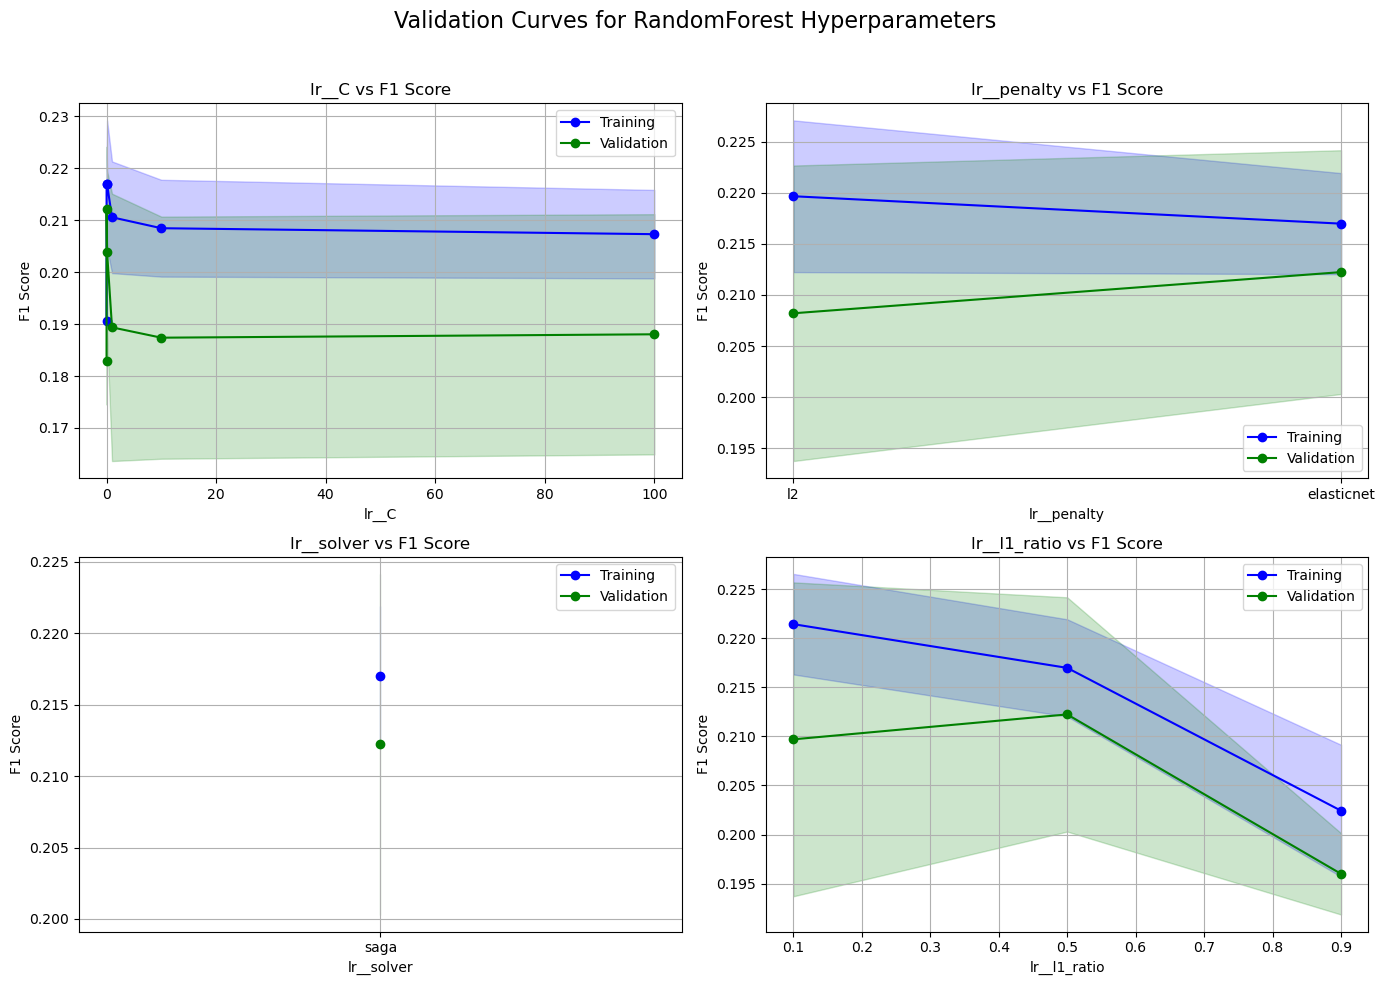

In [104]:
# Explore validation curves for Logistic Regression model:


plot_validation_curves(best_model_lr, X_train, y_train, param_dist, cv)



RidgeClassifier

In [105]:
# ridge regression basic model without SMOTE
from sklearn.linear_model import RidgeClassifier
# Initialize the Ridge Classifier
ridge_classifier = RidgeClassifier(random_state=42, max_iter=1000)
# Fit the model on the resampled training data
ridge_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_ridge = ridge_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Ridge Regression
print("Ridge Regression Classification Report:")
print(classification_report(y_test, y_pred_ridge))
# Print the confusion matrix for Ridge Regression
print("Ridge Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ridge))



Ridge Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Ridge Regression Confusion Matrix:
[[972   0]
 [ 50   0]]


c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [106]:
# ridge regression using random search and SMOTE
from sklearn.linear_model import RidgeClassifier   
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + RidgeClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('ridge', RidgeClassifier(random_state=42, max_iter=1000))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200,300,500,800,10000,100000],  # Regularization strength, is ued to prevent overfitting


    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr']  
    # Solvers available for RidgeClassifier, it is used to optimize the model and prevent overfitting
    
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_ridge = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=20, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_ridge.fit(X_train, y_train)
# Get the best model from random search
best_model_ridge = random_search_ridge.best_estimator_
# Evaluate the best model on the test set
y_pred_best_ridge = best_model_ridge.predict(X_test)
# Print the classification report for the best Ridge Regression model
print("Best Ridge Regression Model Classification Report:")
print(classification_report(y_test, y_pred_best_ridge))
# Print the confusion matrix for the best Ridge Regression model
print("Best Ridge Regression Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_ridge))
# Print the best hyperparameters found by RandomizedSearchCV for Ridge Regression
print("Best Hyperparameters for Ridge Regression:")
print(random_search_ridge.best_params_)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Ridge Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.15      0.90      0.26        50

    accuracy                           0.74      1022
   macro avg       0.57      0.82      0.55      1022
weighted avg       0.95      0.74      0.82      1022

Best Ridge Regression Model Confusion Matrix:
[[715 257]
 [  5  45]]
Best Hyperparameters for Ridge Regression:
{'ridge__solver': 'svd', 'ridge__alpha': 100000}


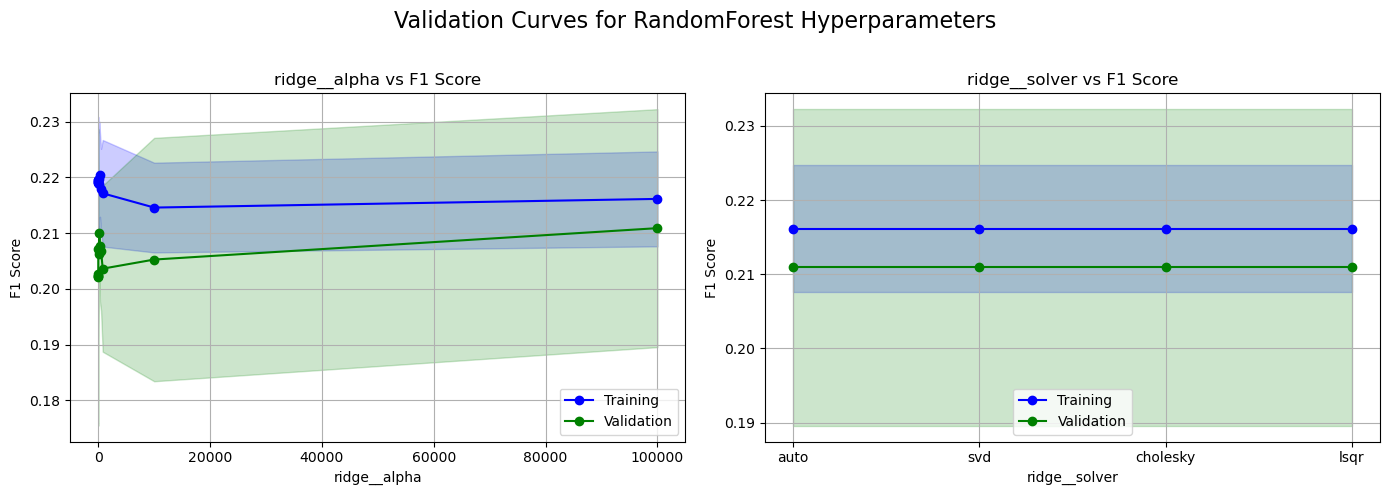

In [107]:
# Explore validation curves for  ridge regression
plot_validation_curves(best_model_ridge, X_train, y_train, param_dist, cv)

#### Discriminant Analysis

LinearDiscriminantAnalysis (LDA)

In [108]:
#LDA basic model without SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Initialize the Linear Discriminant Analysis model
lda_classifier = LinearDiscriminantAnalysis()
# Fit the model on the resampled training data
lda_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_lda = lda_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for LDA
print("Linear Discriminant Analysis Classification Report:")
print(classification_report(y_test, y_pred_lda))
# Print the confusion matrix for LDA
print("Linear Discriminant Analysis Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lda))


Linear Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.17      0.10      0.13        50

    accuracy                           0.93      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.92      0.93      0.92      1022

Linear Discriminant Analysis Confusion Matrix:
[[948  24]
 [ 45   5]]


In [109]:
# LDA using random search and SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + LinearDiscriminantAnalysis
pipeline = Pipeline([
    ('smote', SMOTETomek(random_state=42)),
    ('lda', LinearDiscriminantAnalysis())
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'lda__solver': ['lsqr'],  # Only solvers that support shrinkage, to avoid issues with 'eigen' solver, is used to optimize the model
    'lda__shrinkage': [None, 'auto']  # Shrinkage option to prevent overfitting, 'auto' uses a heuristic to determine shrinkage
}

# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_lda = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=2, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)

# Fit the random search model
random_search_lda.fit(X_train, y_train)
# Get the best model from random search
best_model_lda = random_search_lda.best_estimator_
# Evaluate the best model on the test set
y_pred_best_lda = best_model_lda.predict(X_test)
# Print the classification report for the best LDA model
print("Best Linear Discriminant Analysis Model Classification Report:")
print(classification_report(y_test, y_pred_best_lda))
# Print the confusion matrix for the best LDA model
print("Best Linear Discriminant Analysis Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lda))
# Print the best hyperparameters found by RandomizedSearchCV for LDA
print("Best Hyperparameters for Linear Discriminant Analysis:")
print(random_search_lda.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Linear Discriminant Analysis Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       972
           1       0.14      0.66      0.23        50

    accuracy                           0.78      1022
   macro avg       0.56      0.72      0.55      1022
weighted avg       0.94      0.78      0.84      1022

Best Linear Discriminant Analysis Model Confusion Matrix:
[[766 206]
 [ 17  33]]
Best Hyperparameters for Linear Discriminant Analysis:
{'lda__solver': 'lsqr', 'lda__shrinkage': 'auto'}


Classification Report (Threshold=0.5):
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.13      0.72      0.22        50

    accuracy                           0.76      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.76      0.82      1022

Confusion Matrix:
[[736 236]
 [ 14  36]]


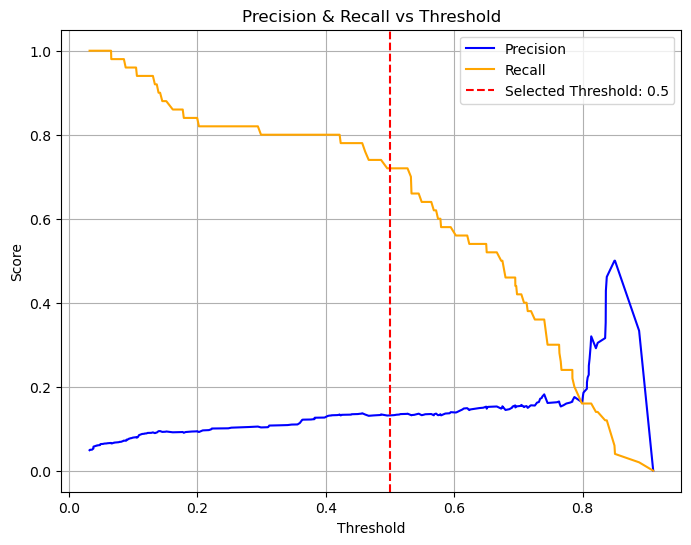

    Actual  Predicted  Confidence
0        0          1    0.909944
1        0          1    0.887964
2        1          1    0.887964
3        1          1    0.850394
4        0          1    0.849588
5        1          1    0.849588
6        1          1    0.837623
7        0          1    0.837623
8        0          1    0.837623
9        0          1    0.837623
10       1          1    0.837623
11       0          1    0.837623
12       1          1    0.837623
13       0          1    0.836209
14       0          1    0.835919
15       0          1    0.835919
16       0          1    0.835919
17       0          1    0.835050
18       0          1    0.835050
19       1          1    0.823437


In [110]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(best_model_gb, X_test, y_test, threshold=0.5)
import pandas as pd
# Get predicted class (0/1) and predicted probability
y_pred = best_model_gb.predict(X_test)
y_probs = best_model_gb.predict_proba(X_test)[:, 1]  # probability for class 1 (stroke)
# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Confidence': y_probs
})
# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # show top 20


QuadraticDiscriminantAnalysis (QDA)

In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the QDA model with regularization
qda_classifier = QuadraticDiscriminantAnalysis(reg_param=0.1)  # Adjust reg_param as needed

# Fit the model on the resampled training data
qda_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_qda = qda_classifier.predict(X_test)

# Print the classification report for QDA
print("Quadratic Discriminant Analysis Classification Report:")
print(classification_report(y_test, y_pred_qda))

# Print the confusion matrix for QDA
print("Quadratic Discriminant Analysis Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_qda))


Quadratic Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.15      0.24      0.18        50

    accuracy                           0.90      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.92      0.90      0.91      1022

Quadratic Discriminant Analysis Confusion Matrix:
[[903  69]
 [ 38  12]]


In [138]:
# QDA using random search and SMOTE
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + QuadraticDiscriminantAnalysis
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('qda', QuadraticDiscriminantAnalysis())
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'qda__reg_param': [0.1, 0.4, 0.5, 1.0],  # Regularization parameter, used to prevent overfitting and improve model stability
    'qda__priors': [None, [0.5, 0.5]],  
    # Class priors is used to specify the prior probabilities of each class, None means it will be estimated from the data 
    # and it prevents overfitting
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_qda = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=2, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    refit = 'recall',
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_qda.fit(X_train, y_train)
# Get the best model from random search
best_model_qda = random_search_qda.best_estimator_
# Evaluate the best model on the test set
y_pred_best_qda = best_model_qda.predict(X_test)
# Print the classification report for the best QDA model
print("Best Quadratic Discriminant Analysis Model Classification Report:")
print(classification_report(y_test, y_pred_best_qda))
# Print the confusion matrix for the best QDA model
print("Best Quadratic Discriminant Analysis Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_qda))
# Print the best hyperparameters found by RandomizedSearchCV for QDA
print("Best Hyperparameters for Quadratic Discriminant Analysis:")
print(random_search_qda.best_params_)


# best model 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Quadratic Discriminant Analysis Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.15      0.92      0.25        50

    accuracy                           0.74      1022
   macro avg       0.57      0.82      0.55      1022
weighted avg       0.95      0.74      0.81      1022

Best Quadratic Discriminant Analysis Model Confusion Matrix:
[[707 265]
 [  4  46]]
Best Hyperparameters for Quadratic Discriminant Analysis:
{'qda__reg_param': 0.4, 'qda__priors': None}


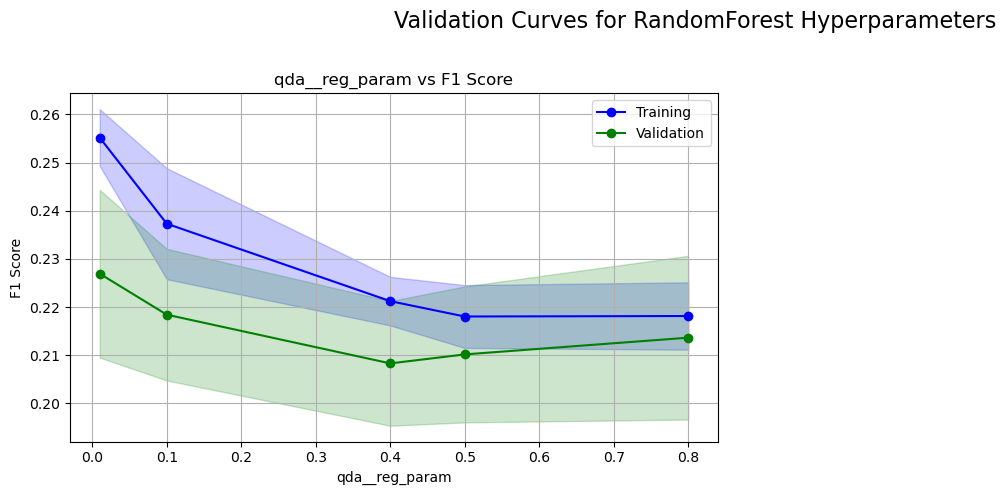

In [ ]:
# Explore validation curves for QDA model:

param_dist = {
    'qda__reg_param': [ 0.01, 0.1, 0.4, 0.5, 0.8],  # Regularization parameter

}


plot_validation_curves(best_model_qda, X_train, y_train, param_dist, cv)

Classification Report (Threshold=0.56):
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       972
           1       0.16      0.90      0.27        50

    accuracy                           0.77      1022
   macro avg       0.58      0.83      0.57      1022
weighted avg       0.95      0.77      0.83      1022

Confusion Matrix:
[[737 235]
 [  5  45]]


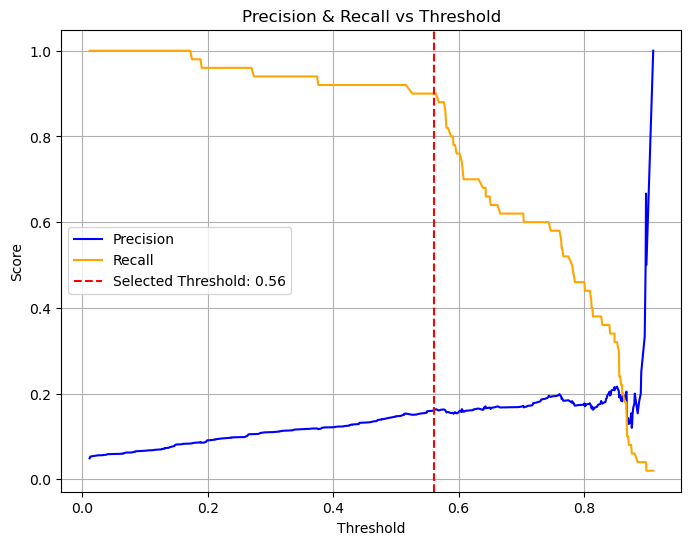

In [131]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(best_model_qda, X_test, y_test, threshold=0.56)


#### Naive Bayes

ComplementNB

In [115]:
# complemntNB basic model without SMOTE
from sklearn.naive_bayes import ComplementNB
# Initialize the Complement Naive Bayes model
complement_nb_classifier = ComplementNB()

# Fit the model on the resampled training data
complement_nb_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_complement_nb = complement_nb_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Complement Naive Bayes
print("Complement Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_complement_nb))
# Print the confusion matrix for Complement Naive Bayes
print("Complement Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_complement_nb))


Complement Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.15      0.88      0.25        50

    accuracy                           0.74      1022
   macro avg       0.57      0.81      0.55      1022
weighted avg       0.95      0.74      0.82      1022

Complement Naive Bayes Confusion Matrix:
[[715 257]
 [  6  44]]


In [116]:
# complementnb using random search and SMOTE
from sklearn.naive_bayes import ComplementNB
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + ComplementNB
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('complement_nb', ComplementNB())
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'complement_nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Smoothing parameter, used to prevent zero probabilities in the model
    'complement_nb__fit_prior': [True, False]  # Whether to learn class prior probabilities, used to improve model performance
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_complement_nb = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=2, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)

# Fit the random search model
random_search_complement_nb.fit(X_train, y_train)
# Get the best model from random search
best_model_complement_nb = random_search_complement_nb.best_estimator_
# Evaluate the best model on the test set
y_pred_best_complement_nb = best_model_complement_nb.predict(X_test)
# Print the classification report for the best Complement Naive Bayes model
print("Best Complement Naive Bayes Model Classification Report:")
print(classification_report(y_test, y_pred_best_complement_nb))
# Print the confusion matrix for the best Complement Naive Bayes model
print("Best Complement Naive Bayes Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_complement_nb))
# Print the best hyperparameters found by RandomizedSearchCV for Complement Naive Bayes
print("Best Hyperparameters for Complement Naive Bayes:")
print(random_search_complement_nb.best_params_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Complement Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.15      0.90      0.25        50

    accuracy                           0.74      1022
   macro avg       0.57      0.82      0.55      1022
weighted avg       0.95      0.74      0.81      1022

Best Complement Naive Bayes Model Confusion Matrix:
[[713 259]
 [  5  45]]
Best Hyperparameters for Complement Naive Bayes:
{'complement_nb__fit_prior': False, 'complement_nb__alpha': 10}


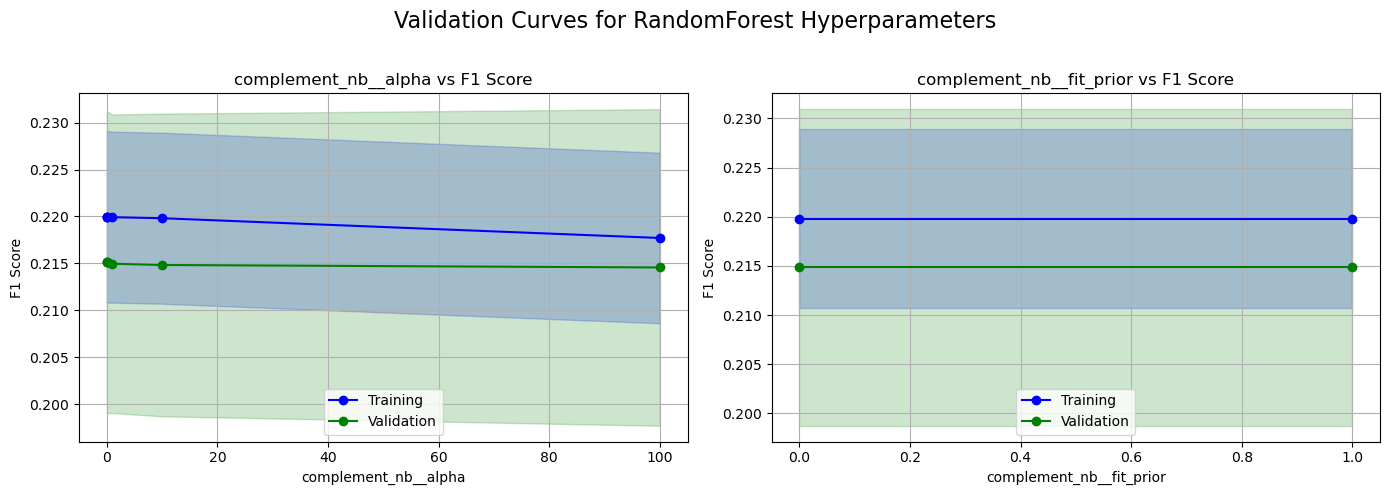

In [117]:

# Explore validation curves for complemntNB:

plot_validation_curves(best_model_complement_nb, X_train, y_train, param_dist, cv)

Classification Report (Threshold=0.4):
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.73      0.81      1022

Confusion Matrix:
[[705 267]
 [ 10  40]]


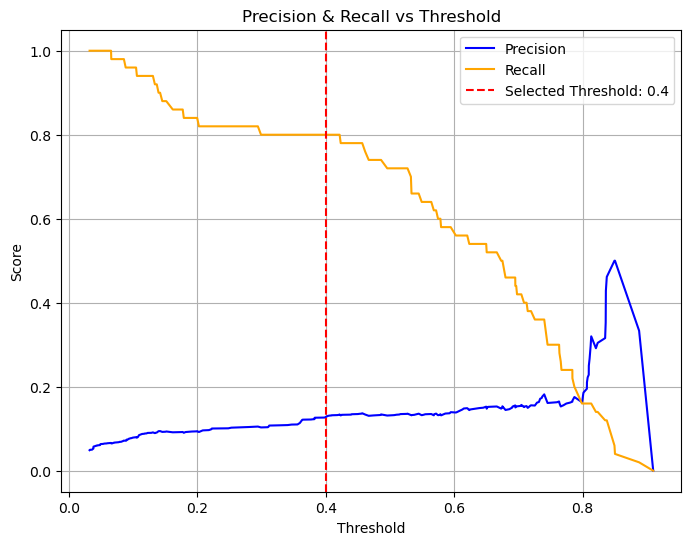

    Actual  Predicted  Confidence
0        0          1    0.909944
1        0          1    0.887964
2        1          1    0.887964
3        1          1    0.850394
4        0          1    0.849588
5        1          1    0.849588
6        1          1    0.837623
7        0          1    0.837623
8        0          1    0.837623
9        0          1    0.837623
10       1          1    0.837623
11       0          1    0.837623
12       1          1    0.837623
13       0          1    0.836209
14       0          1    0.835919
15       0          1    0.835919
16       0          1    0.835919
17       0          1    0.835050
18       0          1    0.835050
19       1          1    0.823437


In [118]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(best_model_gb, X_test, y_test, threshold=0.4)
import pandas as pd
# Get predicted class (0/1) and predicted probability
y_pred = best_model_gb.predict(X_test)
y_probs = best_model_gb.predict_proba(X_test)[:, 1]  # probability for class 1 (stroke)
# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Confidence': y_probs
})
# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # show top 20





####  Support Vector Machines

LinearSVC

In [119]:
# linearSVC basic model without SMOTE
from sklearn.svm import LinearSVC
# Initialize the Linear SVC model
linear_svc_classifier = LinearSVC(random_state=42, max_iter=1000)
# Fit the model on the resampled training data
linear_svc_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_linear_svc = linear_svc_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for Linear SVC
print("Linear SVC Classification Report:")
print(classification_report(y_test, y_pred_linear_svc))
# Print the confusion matrix for Linear SVC
print("Linear SVC Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear_svc))


Linear SVC Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Linear SVC Confusion Matrix:
[[972   0]
 [ 50   0]]


c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [120]:
# linearSVC using random search and SMOTE
from sklearn.svm import LinearSVC
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + LinearSVC
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('linear_svc', LinearSVC(random_state=42, max_iter=1000))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'linear_svc__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength, # used to prevent overfitting
    'linear_svc__loss': ['hinge', 'squared_hinge'],  # Loss function and it is used to optimize the model
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_linear_svc = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=6, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_linear_svc.fit(X_train, y_train)
# Get the best model from random search
best_model_linear_svc = random_search_linear_svc.best_estimator_
# Evaluate the best model on the test set
y_pred_best_linear_svc = best_model_linear_svc.predict(X_test)
# Print the classification report for the best Linear SVC model
print("Best Linear SVC Model Classification Report:")
print(classification_report(y_test, y_pred_best_linear_svc))
# Print the confusion matrix for the best Linear SVC model
print("Best Linear SVC Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_linear_svc))
# Print the best hyperparameters found by RandomizedSearchCV for Linear SVC
print("Best Hyperparameters for Linear SVC:")
print(random_search_linear_svc.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Linear SVC Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.73      1022
   macro avg       0.55      0.74      0.53      1022
weighted avg       0.94      0.73      0.81      1022

Best Linear SVC Model Confusion Matrix:
[[709 263]
 [ 12  38]]
Best Hyperparameters for Linear SVC:
{'linear_svc__loss': 'hinge', 'linear_svc__C': 0.01}


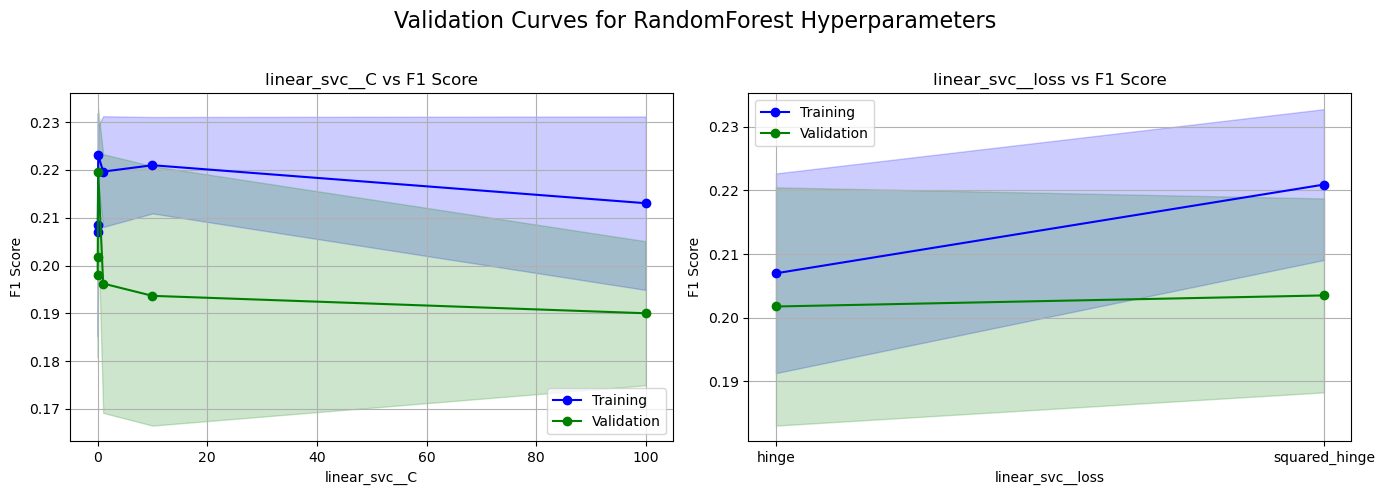

In [121]:
# explore validation curves for Linear SVC model:


plot_validation_curves(best_model_linear_svc, X_train, y_train, param_dist, cv)

SVC (Support Vector Classifier)

In [122]:
# svc basic model 
from sklearn.svm import SVC
# Initialize the SVC model
svc_classifier = SVC(random_state=42, probability=True)
# Fit the model on the resampled training data
svc_classifier.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_svc = svc_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report for SVC
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
# Print the confusion matrix for SVC
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))





SVC Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

SVC Confusion Matrix:
[[972   0]
 [ 50   0]]


c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luo Yuxuan\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [123]:
# svc using random search and SMOTE
from sklearn.svm import SVC
# Step 2: Set up cross-validation and pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline with SMOTE + SVC
pipeline = Pipeline([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('svc', SVC(random_state=42, probability=True))
])
# Step 3: Parameter distribution for RandomizedSearchCV
param_dist = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'svc__degree': [2, 3, 4],  # Degree for polynomial kernel
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}
# Step 4: RandomizedSearchCV for hyperparameter tuning
random_search_svc = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=25, 
    scoring=make_scorer(f1_score, pos_label=1),  # Focus on recall for imbalanced data
    cv=cv, 
    random_state=42, 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise an error if any issue occurs during fitting
)
# Fit the random search model
random_search_svc.fit(X_train, y_train)
# Get the best model from random search
best_model_svc = random_search_svc.best_estimator_
# Evaluate the best model on the test set
y_pred_best_svc = best_model_svc.predict(X_test)
# Print the classification report for the best SVC model
print("Best SVC Model Classification Report:")
print(classification_report(y_test, y_pred_best_svc))
# Print the confusion matrix for the best SVC model
print("Best SVC Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_svc))
# Print the best hyperparameters found by RandomizedSearchCV for SVC
print("Best Hyperparameters for SVC:")
print(random_search_svc.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best SVC Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.76      0.82      1022

Best SVC Model Confusion Matrix:
[[736 236]
 [ 13  37]]
Best Hyperparameters for SVC:
{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__degree': 3, 'svc__C': 0.1}


#### Ensemble Methods

to combine the the models and might give a better reasult

In [139]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# using this is to combine the best models from different algorithms into an ensemble model, to improve overall performance

# Create an ensemble model using VotingClassifier
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_model_rf_grid),  # Random Forest model (best from grid search)
        ('et', best_model_et),       # Extra Trees model (best from random search)
        ('qda', best_model_qda)      # Quadratic Discriminant Analysis model (best from random search)
    ],
    voting='soft',  # Use soft voting (average predicted probabilities for final prediction)
    weights=[2, 2, 3]  # Assign weights to models (QDA has higher weight due to better performance)
)

# Create a pipeline to handle class imbalance and combine the ensemble
votepipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to oversample the minority class (stroke cases)
    ('ensemble', ensemble)             # Use the ensemble model for classification
])

# Fit the pipeline on the training data
votepipeline.fit(X_train, y_train)

# Predict on the test set using the trained ensemble model
y_pred_ensemble = votepipeline.predict(X_test)

# Print the classification report for the ensemble model
print("Ensemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))  # Includes precision, recall, F1-score, and support

# Print the confusion matrix for the ensemble model
print("Ensemble Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))  # Shows true positives, true negatives, false positives, and false negatives

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.14      0.90      0.25        50

    accuracy                           0.73      1022
   macro avg       0.57      0.81      0.54      1022
weighted avg       0.95      0.73      0.81      1022

Ensemble Model Confusion Matrix:
[[705 267]
 [  5  45]]


Classification Report (Threshold=0.5):
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.14      0.90      0.25        50

    accuracy                           0.73      1022
   macro avg       0.57      0.81      0.54      1022
weighted avg       0.95      0.73      0.81      1022

Confusion Matrix:
[[705 267]
 [  5  45]]


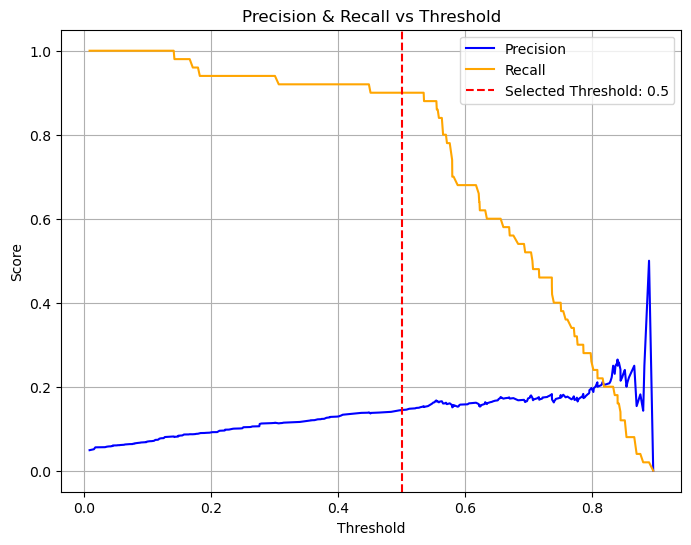

In [126]:
# checking if threshold will improve the model performance
y_pred, y_pred_proba = evaluate_with_threshold(votepipeline, X_test, y_test, threshold=0.5)

Stacked Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.14      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022

Stacked Model Confusion Matrix:
[[806 166]
 [ 24  26]]
Classification Report (Threshold=0.25):
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       972
           1       0.12      0.78      0.22        50

    accuracy                           0.72      1022
   macro avg       0.55      0.75      0.52      1022
weighted avg       0.94      0.72      0.80      1022

Confusion Matrix:
[[699 273]
 [ 11  39]]


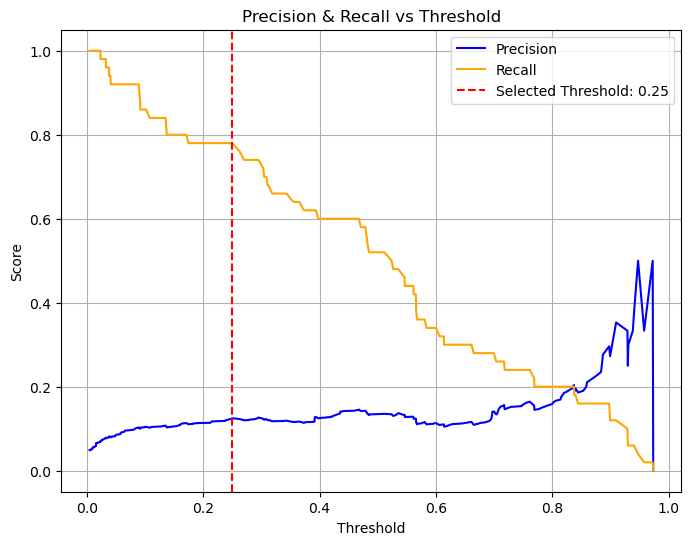

In [127]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create a stacking classifier
stacked = StackingClassifier(
    estimators=[
        ('rf', best_model_rf_grid),  # Random Forest model (best from grid search)
        ('et', best_model_et),       # Extra Trees model (best from random search)
        ('qda', best_model_qda)      # Quadratic Discriminant Analysis model (best from random search)
    ],
    final_estimator=LogisticRegression(),  # Logistic Regression as the meta-model
    passthrough=True  # Pass original features along with predictions to the meta-model
)

# Create a pipeline to handle class imbalance and combine the stacking classifier
stacked_pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to oversample the minority class (stroke cases)
    ('stacked', stacked)               # Use the stacking classifier for classification
])

# Fit the pipeline on the training data
stacked_pipeline.fit(X_train, y_train)

# Predict on the test set using the trained stacking classifier
y_pred_stacked = stacked_pipeline.predict(X_test)

# Print the classification report for the stacking classifier
print("Stacked Model Classification Report:")
print(classification_report(y_test, y_pred_stacked))  # Includes precision, recall, F1-score, and support

# Print the confusion matrix for the stacking classifier
print("Stacked Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacked))  # Shows true positives, true negatives, false positives, and false negatives

# Evaluate the model with a custom threshold
y_pred, y_pred_proba = evaluate_with_threshold(stacked_pipeline, X_test, y_test, threshold=0.25)

| Model                                     | Threshold | Precision (1) | Recall (1) | F1 (1) | Accuracy | Notes                                       |
| ----------------------------------------- | --------- | ------------- | ---------- | ------ | -------- | ------------------------------------------- |
| **RF (Random Forest)**                    | 0.37      | 0.15          | 0.90       | 0.26   | 0.75     | High recall for stroke cases, low precision |
| **ET (Extra Trees)**                      | 0.37      | 0.13          | 0.92       | 0.22   | 0.69     | Highest  recall                        |
| **QDA (Quadratic Discriminant Analysis)** | 0.56      | **0.16**          | 0.90       | 0.26   | **0.76** | Better accuracy & F1                        |

Base on the Classification Report

- Precision (1): QDA has the highest precision (0.16), which is crucial for reducing false positives in stroke prediction.
- Recall (1): QDA maintains a high recall (0.90), ensuring most stroke cases are correctly identified.
- F1 Score (1): QDA achieves the highest F1 score (0.26), balancing precision and recall effectively.

since the model is use to predict the stroke cases, we need a high recall so that we can catch as many stroke cases as possible, even if it means having some false positives.
QDA have high about the same recall as the other 2 good models, but what makes it better is that it has a high precision, which means that the model is able to predict the stroke cases with high accuracy, and it is not predicting too many false positives.
This is important in medical applications where false positives can lead to unnecessary stress and treatment for patients.
hence, i will use QDA as the best model for this problem.

In [140]:
# save the best models
import joblib
# Save the best models to files
joblib.dump(best_model_qda, 'best_model.pkl')

#save the feature columns
joblib.dump(X_train.columns, 'feature_columns.pkl')

# show the feature columns
feature_columns = joblib.load('feature_columns.pkl')
print("Feature Columns:")
for col in feature_columns:
    print(col)
# Save the best models to files



Feature Columns:
hypertension
heart_disease
ever_married
smoking_status
diabetes
age_group_Middle (50-64)
age_group_Older (65+)
age_group_Young (<49)
health_risk_Low Risk
health_risk_Moderate Risk
work_type_Employed
work_type_Private
work_type_Self-employed
work_type_Unemployed
bmi_category_Normal weight
bmi_category_Obese
age_gender_risk_High Risk
age_gender_risk_Low Risk
age_gender_risk_Moderate Risk
age_gender_risk_Very High Risk
stress_level_Low Stress
stress_level_Moderate Stress


In [135]:
model = joblib.load('best_model.pkl')
# Show the model type

#predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (stroke)
# Build a DataFrame for inspection
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model.predict(X_test),
    'Confidence': y_probs
})  
# Sort by confidence (optional, to see strongest predictions first)
results_df = results_df.sort_values(by='Confidence', ascending=False).reset_index(drop=True)
print(results_df.head(20))  # Show top 20 predictions with confidence scores



    Actual  Predicted  Confidence
0        1          1    0.910434
1        0          1    0.899600
2        1          1    0.898940
3        0          1    0.898305
4        0          1    0.896873
5        0          1    0.896873
6        0          1    0.893680
7        0          1    0.891345
8        0          1    0.890601
9        0          1    0.890601
10       0          1    0.888014
11       0          1    0.885634
12       0          1    0.885634
13       0          1    0.881018
14       1          1    0.881018
15       0          1    0.880713
16       0          1    0.880310
17       0          1    0.878519
18       0          1    0.877932
19       0          1    0.877450


# References

 dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

 ADA Diabetes :  https://diabetes.org/about-diabetes/diagnosis 

 BMI : https://www.who.int/data/nutrition/nlis/info/malnutrition-in-women#:~:text=BMI%2018.5%2D24.9%3A%20normal%20weight,BMI%20%E2%89%A530.0%3A%20obesity. 

 Create new columns : https://www.singhealth.com.sg/symptoms-treatments/stroke  and https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113 

 Stress : https://www.world-stroke.org/world-stroke-day-campaign/prevent-stroke/stress-depression-and-stroke 
 
 work type stress: https://www.businessnewsdaily.com/1875-stressful-careers.html 